<a href="https://colab.research.google.com/github/rafaravazio/systematic-review-analysis/blob/main/Systematic_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Functions

## Importing

In [ ]:
# Loading Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Setting working directory (change as needed)
import os

# Daniel working directory
os.chdir("/content/drive/MyDrive/[PATH TO YOUR FOLDER]")

# Installing and downloading useful modules
!pip install xlsxwriter # Module to write and organize output tables
import xlsxwriter # Module to write and organize output tables
import pandas as pd # Data analysis and manipulation tool - https://pandas.pydata.org/
import seaborn as sns # Graphical representations - https://seaborn.pydata.org/
import matplotlib.pyplot as plt # Graphical representations - https://matplotlib.org/
import numpy as np # Scientific computing - https://numpy.org/
import scipy.stats as stats # Probability distributions and statistical functions- https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy as sp # Probability distributions and statistical functions- https://docs.scipy.org/doc/scipy/reference/stats.html
import statsmodels # Statistical models and tests - https://www.statsmodels.org/stable/index.html
import statsmodels.stats.api as smsapi # Statistical models and tests - https://www.statsmodels.org/stable/index.html
import statsmodels.stats.weightstats as sms # Statistical models and tests - https://www.statsmodels.org/stable/index.html
import statsmodels.formula.api as smf # Statistical models and tests - https://www.statsmodels.org/stable/index.html
import statsmodels.api as sm # Statistical models and tests - https://www.statsmodels.org/stable/index.html
import math # Math!

# Some warning are persistent
import warnings
warnings.simplefilter("ignore", UserWarning)

# More data displayed in pandas columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 80)
pd.set_option('display.max_colwidth', 25) # Maximum width of each column
pd.options.display.float_format = "{:,.3f}".format # Show to at most 2 decimals values

# Print what is in the loaded directory
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.7 MB/s eta 0:00:00


['Systematic Review Analysis.ipynb',
 'Data Driven Clustering of PD - A Systematic Review (respostas) 2.0 - análise.xlsx',
 'Plots',
 'Tables',
 'Artigo e Drafts',
 'New Data (Oct - Mai) - Data Driven Clustering of PD - A Systematic Review (respostas) - análise.xlsx']

## General Functions

In [ ]:
# Somando colunas e inserindo as novas ao lado da última
def somarcolunas(df,somar,excluir=False):
  # Criando o nome da nova coluna
  for contagem, coluna in enumerate(somar):
    name = []
    if contagem == 0:
      nome = coluna
    else:
      nome = nome + '_' + coluna

  # Calculando e inserindo a nova coluna
  for contagem, coluna in enumerate(somar):
    if contagem == 0: # Primeiro valor
      soma = df[coluna] # Deixando a soma igual ao primeiro elemento
    else:
      soma = soma + df[coluna] # Somar elementos
      if coluna == somar[-1]: # Identificando se estamos no último elemento da lista
        if nome not in df.columns: # Vendo se já não existe coluna com esse nome
          df.insert(loc = (df.columns.get_loc(somar[-1])+1), column = nome, value = soma)
          name.append(nome)
          if excluir == True:
            df.drop(coluna, axis=1, inplace=True)

  truedf = df.copy()
  return truedf, name

def quantis(df, dividir, divisoes = 3):
  name = []
  quantilvar = True
  for variavel in dividir: # Variáveis que serão divididas
    quantis = []
    for tamanho in range(divisoes):
      quantis.append((tamanho+1)/(divisoes+1))
    quartis_bons = []
    lista = list(df[variavel].quantile(quantis))
    for contagem in range(divisoes):
      if (quantilvar == True) and (divisoes == 3):
        quantilvar = False
        nome = variavel + ' Quartile Division'
        temp = ['1' if x <= lista[0] else '2' if x <= lista[1] else '3' if x <= lista[2] else '4' for x in df[variavel]]
        if nome not in df.columns: # Vendo se já não existe coluna com esse nome
          df.insert(loc = (df.columns.get_loc(variavel)+1), column = nome, value = temp)
      nome = variavel + ' More Than ' + str(int((contagem+1)/(divisoes+1)*(100))) + '% (' + str(lista[contagem]) +')'
      temp = ['Não' if x <= lista[contagem] else 'Sim' for x in df[variavel]]
      if nome not in df.columns: # Vendo se já não existe coluna com esse nome
        df.insert(loc = (df.columns.get_loc(variavel)+1), column = nome, value = temp)
      quartis_bons.append(nome)
      name.append(nome)

  return df, name

def quantis_single_column(df, dividir, divisoes=3, show_ranges=False):
    name = []
    for variavel in dividir:  # Variables to be divided
        # Calculate the quantile values
        quantis = [(i + 1) / (divisoes + 1) for i in range(divisoes)]
        lista = list(df[variavel].quantile(quantis))

        # Determine the label for the new column
        nome = variavel + ' Quantile Division'

        # Depending on the show_ranges flag, format the output differently
        if show_ranges:
            # Create labels that show the range of each quantile
            edges = [df[variavel].min()] + lista + [df[variavel].max()]
            labels = [f"{int(edges[i])} - {int(edges[i+1])}" for i in range(len(edges)-1)]
            temp = [labels[sum(x > y for y in lista)] for x in df[variavel]]
        else:
            # Create a single column showing the quantile division as numbers
            temp = [sum(x > y for y in lista) + 1 for x in df[variavel]]

        # Check if the column already exists and add it if it doesn't
        if nome not in df.columns:
            df[nome] = temp

        name.append(nome)

    return df, name

def somarduplas(df,duplas):
  names = []
  for x in duplas:
    for y in duplas:
      if x != y:
        name1 = x + ' + ' + y
        name2 = y + ' + ' + x
        print(name1,name2)
        if (name1 not in names) and (name2 not in names):
          print('both names not in names')
          temp = df[x] + df[y]
          if name1 not in df.columns: # Vendo se já não existe coluna com esse nome
            df.insert(loc = (df.columns.get_loc(x)+1), column = name1, value = temp)
            df[name1].replace(1,0,inplace=True)
            df[name1].replace(2,1,inplace=True)
            names.append(name1)
            names.append(name2)

  truedf = df.copy()
  return truedf

def somartrios(df,trios):
  names = []
  for x in trios:
    for y in trios:
      for z in trios:
        if (x != y) and (x != z) and (y != z):
          name1 = x + ' + ' + y + ' + ' + z
          name2 = x + ' + ' + z + ' + ' + y
          name3 = y + ' + ' + z + ' + ' + x
          name4 = y + ' + ' + x + ' + ' + z
          name5 = z + ' + ' + x + ' + ' + y
          name6 = z + ' + ' + y + ' + ' + x
          if (name1 not in names) and (name2 not in names) and (name3 not in names) and (name4 not in names) and (name5 not in names) and (name6 not in names):
            temp = df[x] + df[y] + df[z]
            if name1 not in df.columns: # Vendo se já não existe coluna com esse nome
              df.insert(loc = (df.columns.get_loc(x)+1), column = name1, value = temp)
              df[name1].replace(1,0,inplace=True)
              df[name1].replace(2,1,inplace=True)
              names.append(name1)
              names.append(name2)
              names.append(name3)
              names.append(name4)
              names.append(name5)
              names.append(name6)

  truedf = df.copy()
  return truedf

Unicos e Faltantes

In [ ]:
# Criar tabela que mostra informações importantes de cada variável
# Criando a tabela com valores falfantes e quantidade de cada valor

def unicosefaltantes(df, organizar = 'Valores Faltantes'):

  '''Produza tabelas com tipos de variáveis, quantidade de valores faltantes e únicos para suas tabelas
  Diga nos argumentos qual é o banco de dados (primeiro argumento)
  Se quiser sortear a tabela por tipo, faltantes ou únicos em ordem descendente,
  No segundo argumento, coloque um dos três como string: Tipo de Variável, Valores Faltantes e Valores Únicos
  O padrão é sortear por Valores Faltantes'''

  variaveis = []
  for contagem, col in enumerate(df.columns):
    variaveis.append([col,df.dtypes[contagem],df[col].isnull().sum(),len(df[col].value_counts())])

  # Organizando a tabela - criar e sortear
  variaveis = pd.DataFrame(variaveis,columns=['Variável','Tipo de Variável','Valores Faltantes','Valores Únicos'])
  variaveis.sort_values(by=[organizar],ascending=False,inplace=True) # Sorteia por valores faltantes e únicos

  return variaveis

## Divisor Function

In [ ]:
'''Criador de novas colunas baseado em resultados de uma única coluna
Tens uma coluna onde, dentro de uma pergunta, você quer discriminar se alguém respondeu uma determinada coisa ou não?
Exemplo: qual droga você usa? Álcool, Cigarro ou Cocaína? Quer saber se uma pessoa usa álcool sim/não, cigarro sim/não etc?
Este código faz isso. Após, será criado um código para "corrigir" o que já foi inserido com o código inicial baseado em outras colunas
Exemplo: a coluna 1 faz essas perguntas mas também existe as colunas 2 e 3, que também as fazem. É possível alguém marcar umma opção em cada uma delas
Agora bastaria só mudar o Sim / Não das colunas já criadas para estar resolvido'''

from itertools import chain
import pandas as pd

def extract_unique_values(dataframe, column_name, separator = ','):
    """
    Extracts unique values from a specified column in a DataFrame where values are comma-separated.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column to process.

    Returns:
        list: A list of unique values found in the column.
    """
    # Ensure the column exists in the DataFrame
    if column_name not in dataframe.columns:
        raise ValueError(f"The column '{column_name}' does not exist in the DataFrame.")

    # Split the values in the column and flatten them
    split_values = dataframe[column_name].str.split(separator)
    flattened_values = list(chain.from_iterable(split_values))

    # Use set to find unique values and convert it back to a list
    unique_values = list(set(flattened_values))

    return unique_values

def divisor(df, colunaprincipal, siglas, significado, colunasextras=None, apagar=False, numerical=True):
    """
    Create new columns in a DataFrame based on the responses in a specific column.

    Parameters:
        df (pd.DataFrame): The DataFrame to process.
        colunaprincipal (str): The main column containing comma-separated values.
        siglas (list): Abbreviations or keywords to look for within the column.
        significado (list): Corresponding meaningful names for new columns to create.
        colunasextras (list, optional): Additional columns to consider for adjusting responses. Defaults to None.
        apagar (bool, optional): Whether to delete the original columns after processing. Defaults to False.
        numerical (bool, optional): Whether to represent responses as numerical ('1', '0') or textual ('Yes', 'No'). Defaults to True.

    Returns:
        pd.DataFrame: The modified DataFrame with new columns added.
    """
    if colunasextras is None:
        colunasextras = []

    # Part 1: Creating new columns based on the main column
    for contagem, valor in enumerate(siglas):
        df[significado[contagem]] = df[colunaprincipal].apply(lambda x: 1 if valor in str(x) else 0 if numerical else 'Yes' if valor in str(x) else 'No')

    # Part 2: Refining these new columns using additional columns
    for coluna in colunasextras:
        for idx, val in df[coluna].iteritems():
            if val in siglas:
                col_idx = siglas.index(val)
                df.at[idx, significado[col_idx]] = 1 if numerical else 'Yes'

    # Part 3: Optionally removing the original columns
    if apagar:
        df.drop(columns=[colunaprincipal] + colunasextras, inplace=True)

    tempdf = df.copy() # For fragmentation

    return tempdf

Characterize Samples

In [ ]:
def calculate_percentage_distribution(df, columns, max_unique_values=10, use_counts=False):
    """
    Calculates and returns a DataFrame containing the distribution (either counts or percentages)
    of each value, including NaN, for specified columns in the input DataFrame, excluding columns
    with more than 'max_unique_values' unique values.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - columns (list of str): List of column names to analyze in the DataFrame.
    - max_unique_values (int): Maximum number of unique values a column can have to be analyzed.
    - use_counts (bool): If True, returns counts instead of percentages. Defaults to False.

    Returns:
    - pandas.DataFrame: A DataFrame where each column corresponds to one of the specified columns
      in the input DataFrame and each row corresponds to the distribution of a particular value,
      formatted as strings with percentage signs if use_counts is False.
    """
    distribution = {}
    skipped_columns = []

    for col in columns:
        if pd.unique(df[col]).size > max_unique_values:
            skipped_columns.append(col)
        else:
            # Calculate the distribution of each value (including NaN) in the column
            if use_counts:
                distribution[col] = df[col].value_counts(dropna=False)
            else:
                distribution[col] = df[col].value_counts(dropna=False, normalize=True) * 100

    # Create a DataFrame from the dictionary
    distribution_df = pd.DataFrame(distribution)

    # Optionally, format the DataFrame for better readability
    if not use_counts:
        distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")

    # Print columns that were skipped
    if skipped_columns:
        print("Skipped columns (more than", max_unique_values, "unique values):", skipped_columns)

    return distribution_df


Parse description

In [ ]:
# Function to count if all elements are there
def parse_description(desc, all=True):
  if all == True:
    print('Mode of execution: all need to be present')
  else:
    print('Mode of execution: at least one needs to be present')
  countlist = []
  for row in df[colpos]:
    count = 0
    for element in templist:
      if element in row:
        count += 1
    if all == True:
      if count == len(templist):
        countlist.append(1)
      else:
        countlist.append(0)
    else:
      if count > 0:
        countlist.append(1)
      else:
        countlist.append(0)

  return countlist

## Multiple Cat Comparison

In [ ]:
# @title
from scipy.stats import chi2_contingency, f_oneway, kruskal, shapiro, ttest_ind, mannwhitneyu

def analyze_data_corrected_v8(df, qualitative_variable, numerical_threshold=5,
                              p_significance=4, decimal_places=1,
                              descending=True, exclude_vars=None, printsteps=False,
                              hidetotal=False):
    """
    Adjusted function to include statistical test type and effect size at the end,
    format categorical variable output as n (%), and allow configuration for p significance
    and decimal places for rounding.

    :param df: DataFrame with the data.
    :param qualitative_variable: Name of the qualitative variable for analysis.
    :param numerical_threshold: Threshold for considering a variable as numerical based on the number of distinct values.
    :param p_significance: Number of decimal places for the p-value (default 4).
    :param decimal_places: Number of decimal places for rounding results (default 1).
    :return: DataFrame formatted with the analysis results.
    """

    if exclude_vars is None:
        exclude_vars = []

    # Ensure that numerical columns are correctly interpreted
    for col in df.columns:
        if col not in exclude_vars and col != qualitative_variable:
            df.loc[:, col] = pd.to_numeric(df[col].replace('<NA>', np.nan), errors='ignore')

    # Get counts of each category and sort them if needed
    if descending:
        category_counts = df[qualitative_variable].astype(str).value_counts().sort_index()
        categories = category_counts.index.tolist()
        output_columns = ['Variables'] + [f'{cat} (n = {category_counts[cat]})' for cat in categories]
    else:
        categories = df[qualitative_variable].unique()
        output_columns = ['Variables'] + [f'{cat} (n = {len(df[df[qualitative_variable] == cat])})' for cat in categories]

    total_observations = len(df)
    results = []

    # Statistics for the entire dataset for categorical variables
    total_dataset_stats = []
    for column in df.columns:
        if column in exclude_vars or column == qualitative_variable:
            continue
        if printsteps:
            print('Producing output for variable:', column)
        try:
            if pd.api.types.is_numeric_dtype(df[column]) and df[column].nunique() >= numerical_threshold:
                numeric_data = df[column].dropna().astype(float)  # Ensure conversion to float
                mean = round(numeric_data.mean(), decimal_places)
                std_dev = round(numeric_data.std(), decimal_places)
                median = round(numeric_data.median(), decimal_places)
                iqr = round(numeric_data.quantile(0.75) - numeric_data.quantile(0.25), decimal_places)
                stats_str = f"mean: {mean} ± {std_dev}, median: {median} (IQR: {iqr})"
            else:
                category_percent = df[column].dropna().value_counts(normalize=True) * 100
                percent_str = ""
                for sub_cat, percent in category_percent.items():
                    n_sub_cat = df[column].dropna().value_counts()[sub_cat]
                    percent = round(percent, decimal_places)
                    percent_str += f"{sub_cat}: {n_sub_cat} ({percent}%), "
                stats_str = percent_str.strip(', ')
            total_dataset_stats.append(stats_str)
            if printsteps:
                print('Stats:', stats_str)
        except Exception as e:
            print(e, 'during data organization in:', column)
            pass

    for column in df.columns:
        if column in exclude_vars or column == qualitative_variable:
            continue

        # Initialize new_row with all possible category keys using the full dataset counts
        new_row = {'Variables': column}
        for cat in categories:
            new_row[f'{cat} (n = {category_counts[cat]})'] = "No data"
        p_value = None
        test_type = ''

        # Drop NaNs from the non-missing data for this column
        non_missing_data = df[column].dropna()
        percent_non_missing = len(non_missing_data) / total_observations * 100

        if pd.api.types.is_numeric_dtype(df[column]) and df[column].nunique() >= numerical_threshold:
            if printsteps:
                print('Statistical analysis for numerical variable:', column)
            # Numeric variable
            try:
                # Drop NaNs from each group
                groups = [group_data[column].dropna().astype(float) for _, group_data in df.groupby(qualitative_variable)]
                if len(categories) == 2:  # Binary outcome
                    if all(len(group) >= 3 for group in groups):
                        if all(shapiro(group.dropna())[1] > 0.05 for group in groups):
                            p_value = ttest_ind(groups[0], groups[1], nan_policy='omit')[1]
                            test_type = 't-test'
                        else:
                            p_value = mannwhitneyu(groups[0], groups[1], nan_policy='omit')[1]
                            test_type = 'Mann-Whitney'
                else:  # 3 or more outcomes
                    if all(len(group) >= 3 for group in groups):
                        if all(shapiro(group.dropna())[1] > 0.05 for group in groups):
                            p_value = f_oneway(*groups)[1]
                            test_type = 'ANOVA'
                        else:
                            p_value = kruskal(*groups)[1]
                            test_type = 'Kruskal-Wallis'

                for cat in categories:
                    group = df[df[qualitative_variable] == cat][column].dropna().astype(float)
                    if not group.empty:  # Check if the group is not empty
                        mean = round(group.mean(), decimal_places)
                        std_dev = round(group.std(), decimal_places)
                        median = round(group.median(), decimal_places)
                        iqr = round(group.quantile(0.75) - group.quantile(0.25), decimal_places)
                        new_row[f'{cat} (n = {len(df[df[qualitative_variable] == cat])})'] = f"mean: {mean} ± {std_dev}, median: {median} (IQR: {iqr})"
            except Exception as e:
                print(e, 'during numerical statistical analysis in:', column)
                pass

        else:
            if printsteps:
                print('Statistical analysis for categorical variable:', column)

            # Categorical variable
            try:
                contingency_table = pd.crosstab(df[column].dropna(), df[qualitative_variable].dropna())
                if not contingency_table.empty:
                    chi2, p_value, _, _ = chi2_contingency(contingency_table)
                    test_type = 'Chi-square'
                    for cat in categories:
                        total_group = df[df[qualitative_variable] == cat].shape[0]
                        category_percent = contingency_table[cat] / total_group
                        percent_str = ""
                        for sub_cat, val in category_percent.items():
                            n_sub_cat = round(val * total_group)
                            percent = round(val * 100, decimal_places)
                            percent_str += f"{sub_cat}: {n_sub_cat} ({percent}%), "
                        new_row[f'{cat} (n = {total_group})'] = percent_str.strip(', ')
            except Exception as e:
                print(e, column)
                pass

        new_row['p-value'] = round(p_value, p_significance) if p_value is not None else 99
        new_row['Test Type'] = test_type
        new_row['% Complete Data'] = f"{round(percent_non_missing, decimal_places)}%"
        results.append(new_row)
        if printsteps:
            print(new_row)

    results_df = pd.DataFrame(results, columns=output_columns + ['p-value', 'Test Type', '% Complete Data'])
    if not hidetotal:
        results_df.insert(1, f'Total (n = {len(df)})', total_dataset_stats)

    return results_df


Organizing the output

In [ ]:
def detailed_output_analysis_condensed(df_output):
    """
    Function to process the output of the analysis function and detail each subcategory of categorical variables
    in a single line, condensing the data of each column.

    :param df_output: DataFrame resulting from the analysis function.
    :return: Detailed DataFrame with subcategories in condensed lines.
    """
    detailed_results = []

    for index, row in df_output.iterrows():
        variable = row['Variables']
        new_base_line = row.to_dict()

        # Agora começando da coluna 'Total Dataset'
        if any(':' in str(new_base_line[col]) for col in df_output.columns[1:-3]):
            subcat_dict = {}
            for col in df_output.columns[1:-3]:  # Ajuste aqui também
                subcategories = str(new_base_line[col]).split(', ')
                for subcat in subcategories:
                    if ':' in subcat:
                        parts = subcat.split(': ')
                        subcat_name = parts[0].strip()
                        values = ': '.join(parts[1:])
                        subcat_dict.setdefault(subcat_name, new_base_line.copy())
                        subcat_dict[subcat_name]['Variables'] = f"{variable}, {subcat_name}"
                        subcat_dict[subcat_name][col] = values.strip()

            detailed_results.extend(subcat_dict.values())
        else:
            detailed_results.append(new_base_line)

    return pd.DataFrame(detailed_results)

# This is needed because the above function creates unnecessary lines
def condense_rows(df):
    """
    Function to condense information from lines with the same variable name into a single line.

    :param df: DataFrame with potentially repeated lines for each variable.
    :return: Condensed DataFrame.
    """
    condensed_df = pd.DataFrame()
    unique_variables = df['Variables'].unique()

    for var in unique_variables:
        var_lines = df[df['Variables'] == var]
        condensed_line = var_lines.iloc[0].copy()  # Copy the first line as a base

        # Iterate through columns to condense information
        for col in df.columns[:-3]:  # Include "Total Dataset" and other columns, ignore the last 3 columns
            column_data = var_lines[col].dropna().unique()
            condensed_line[col] = ', '.join(map(str, column_data))

        # Append using concat instead of the deprecated append method
        condensed_df = pd.concat([condensed_df, pd.DataFrame([condensed_line])], ignore_index=True)

    return condensed_df


# Initial variable creation

In [ ]:
# Reading the base dataset for analysis
df = pd.read_csv('Review_Dataset.csv')
df.head()

## Good variables

In [ ]:
df.head(2)

Article Title  \
0            A Data-Driven Approach to the Study of Heterogeneity in Idiopathic Parkinson's Disease: Identification of Three Distinct Subtypes   
1  A Hybrid Machine Learning and Network Analysis Approach Reveals Two Parkinson's Disease Subtypes from 115 RNA-Seq Post-Mortem Brain Samples   

  Author (only the last name)  Year of publication   Reviewer  \
0                      Graham                 1999  Consensus   
1                     Termine                 2022  Consensus   

                                                                                                              Inclusion Criteria  \
0  1. Identifies Parkinson subtypes, 2. Uses unsupervised learning or a data driven approach to generate the clusters (subtypes)   
1  1. Identifies Parkinson subtypes, 2. Uses unsupervised learning or a data driven approach to generate the clusters (subtypes)   

              Exclusion Criteria  \
0  No Exclusion criteria checked   
1  No Exclusion criteria checked   

  Which type of PD patients were included in the clustering analyses?  \
0                                                  Not clearly stated   
1                                                  Not clearly stated   

  Were subtyped patients roughly at the same disease stage or duration?  \
0                                            Not sure or clearly stated   
1                                            Not sure or clearly stated   

  From how many different centers came the patients to be subtyped?  \
0                                                     Single center   
1                                              More than one center   

       How were patients recruited?  \
0  Clinics or research institutions   
1        Not sure or clearly stated   

  Which diagnostic criteria was utilized to diagnose PD?  \
0                                 UK Brain Bank Criteria   
1    Postmortem pathological diagnosis (complete sample)   

  Which was the sampling method?  \
0                    Convenience   
1     Not sure or clearly stated   

  Was there a longitudinal follow-up in any way?  \
0          The study only utilized baseline data   
1          The study only utilized baseline data   

  If longitudinal follow-up was provided, how much years were patients followed for?  \
0                                                 The study did no provide follow-up   
1                                                 The study did no provide follow-up   

                                              Completeness of follow-up  \
0  The study was cross-sectional or did not inform the follow-up period   
1  The study was cross-sectional or did not inform the follow-up period   

                                                 Which type of descriptive data regarding the PD population was presented?  \
0  Age, Gender, Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales), Medication Doses   
1                                                                                                                      Age   

  Were the included patients for clustering purposes drug-naive?  \
0                                                             No   
1                                     Not sure or clearly stated   

  Number of PD patients utilized for clustering purposes  \
0                                                    176   
1                                                    115   

  Number of PD patients utilized for validation purposes  \
0                            No validation was performed   
1                            No validation was performed   

  Did the study include healthy controls in the clustering analyses alongside PD patients?  \
0                                                                                       No   
1                                                                                      Yes   

  Number of healthy controls utilized for v

In [ ]:
relevantvars = ['Article Title', 'Author (only the last name)', 'Year of publication',
                'Number of PD patients utilized for clustering purposes',
                'Number of healthy controls utilized for validation or technique elaboration purposes',
                'How many subtypes did the evaluated study identified?']

## Number of groups

In [ ]:
# Putting in numeric
df['Number of PD patients utilized for clustering purposes for bubble'] = df['Number of PD patients utilized for clustering purposes']
df['Number of PD patients utilized for clustering purposes'] = pd.to_numeric(df['Number of PD patients utilized for clustering purposes'], errors='coerce').astype('Int64')
df['Number of healthy controls utilized for validation or technique elaboration purposes'] = pd.to_numeric(df['Number of healthy controls utilized for validation or technique elaboration purposes'], errors='coerce').astype('Int64')
df['How many subtypes did the evaluated study identified?'] = pd.to_numeric(df['How many subtypes did the evaluated study identified?'], errors='coerce').astype('Int64')

## Monogenic x sporadic

It is important to know exactly the genetic background of the population you are studying. Have the reviewed studies done so? This information is presented in two columns, with the second one needing to be divided for its subvalues

First: 'Which type of PD patients were included in the clustering analyses?'

Second: 'Which type of descriptive data regarding the PD population was presented?'

In [ ]:
# Defining the different options for answers
siglas = ['None of the mentioned data on the PD population was informed by the study',
           'Age', 'Gender', 'Ethnicity', 'Education', 'Income', 'Family History',
           'Age at disease onset', 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
           'Vital Signs (blood pressure, cardiac frequency)', 'Physical Attributes (weight, height etc)',
           'Medication Doses', 'Genetic Status (monogenic PD, polygenic risk score)',
           'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
           'Summarised data from neuroimaging studies (such as cortical thickness)',
           "Biomarker's profile (results from biomarker tests)"]

# Preparing to run the function
main_column = 'Which type of descriptive data regarding the PD population was presented?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

df['Genetic Status (monogenic PD, polygenic risk score)'].value_counts()

Genetic Status (monogenic PD, polygenic risk score)
0    76
1     6
Name: count, dtype: int64

In [ ]:
# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

<ipython-input-21-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


None of the mentioned data on the PD population was informed by the study  \
0                                                                    82.93%   
1                                                                    17.07%   

      Age  Gender Ethnicity Education  Income Family History  \
0  18.29%  28.05%    91.46%    62.20%  97.56%         92.68%   
1  81.71%  71.95%     8.54%    37.80%   2.44%          7.32%   

  Age at disease onset  \
0               67.07%   
1               32.93%   

  Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                                                                                   31.71%   
1                                                                                   68.29%   

  Vital Signs (blood pressure, cardiac frequency)  \
0                                          97.56%   
1                                           2.44%   

  Physical Attributes (weight, height etc) Medication Doses  \
0                                   95.12%           59.76%   
1                                    4.88%           40.24%   

  Genetic Status (monogenic PD, polygenic risk score)  \
0                                              92.68%   
1                                               7.32%   

  Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                                                                                             32.93%   
1                                                                                             67.07%   

  Summarised data from neuroimaging studies (such as cortical thickness)  \
0                                                                 92.68%   
1                                                                  7.32%   

  Biomarker's profile (results from biomarker tests)  
0                                             93.90%  
1                                              6.10%

Creating the definition of not possessing genetic information

If study reported either genetic information or makes some distinction between study types in their definition

In [ ]:
# New column to be created
newcol = np.where(
    (df['Genetic Status (monogenic PD, polygenic risk score)'] == 1) |
    (df['Which type of PD patients were included in the clustering analyses?'] == 'Monogenic and Sporadic / Idiopathic'),
    1, 0)

colpos = 'Which type of PD patients were included in the clustering analyses?' # Name of the column position to be inserted
newcolname = 'Genetic_Status_Informed' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))
df[['Article Title',colpos,newcolname,'Genetic Status (monogenic PD, polygenic risk score)']].head(20)

Genetic_Status_Informed
0    76
1     6
Name: count, dtype: int64


Article Title  \
0                                                                      A Data-Driven Approach to the Study of Heterogeneity in Idiopathic Parkinson's Disease: Identification of Three Distinct Subtypes   
1                                                            A Hybrid Machine Learning and Network Analysis Approach Reveals Two Parkinson's Disease Subtypes from 115 RNA-Seq Post-Mortem Brain Samples   
2                                                                    ADCoC: Adaptive Distribution Modeling Based Collaborative Clustering for Disentangling Disease Heterogeneity from Neuroimaging Data   
3                                                                                                                                            Agglomerative and divisive hierarchical Bayesian clustering   
4                                                                                                                   Anxiety Has Specific Syndromal Profiles in Parkinson Disease: A Data-Driven Approach   
5                                                                                                      Artificial intelligence-based clustering and characterization of Parkinson's disease trajectories   
6                                                                                                Assessing Parkinson's disease speech signal generalization of clustering results across three countries   
7                                                                                                     Association between Cognitive Impairment and Freezing of Gait in Patients with Parkinson's Disease   
8                                                                                                                 Bayesian Longitudinal Modeling of Early Stage Parkinson's Disease Using DaTscan Images   
9                                                                                                                                   Biomarker characterization of clinical subtypes of Parkinson Disease   
10                                                                                                         Blood Biomarkers With Parkinson's Disease Clusters and Prognosis: The Oxford Discovery Cohort   
11                                                                                              Can We Predict the Motor Performance of Patients With Parkinson's Disease Based on Their Symptomatology?   
12  Characterization of idiopathic Parkinson's disease subgroups using quantitative gait analysis and corresponding subregional striatal uptake visualized using 18F-FP-CIT positron emission tomography   
13                                                                                                                               Characterization of Parkinson's Disease Subtypes and Related Attributes   
14                                                                                                                      Classification of l-DOPA pharmacokinetics shapes and creating a predictive model   
15                                                                                                                                         Clinical heterogeneity in newly diagnosed Parkinson's disease   
16                                                                                                           Clinical heterogeneity in patients with early-stage Parkinson's disease: a cluster analysis   
17                                                                                                                                                              Clinical Subtypes of Parkinson's Disease   
18                                                                                                       Clinically relevant connectivity features define three subtypes of Parkinson's disease patients   
19                                                                                                         

## Diagnostic criteria

More on PDBP Dx Criteria (highly variable): https://movementdisorders.onlinelibrary.wiley.com/doi/full/10.1002/mds.26438?casa_token=0Kk48i-Na7sAAAAA%3A80sx8jSKQVLwmT8ixQfiqqxSBT9PeFOedBg-nXQ_v24Bm3DzTtt8BeHgW0fQwk4pNzfnTxCaaCOs6L7f

In [ ]:
# Checking
df['Which diagnostic criteria was utilized to diagnose PD?'].value_counts()

Which diagnostic criteria was utilized to diagnose PD?
UK Brain Bank Criteria                                                                                                               38
Clinical Diagnosis + Positive Dopamine Transporter (DAT) SPECT (PPMI)                                                                18
Not sure or clearly stated                                                                                                            8
MDS Clinical Criteria                                                                                                                 7
Other criteria                                                                                                                        3
Douglas Criteria                                                                                                                      2
Postmortem pathological diagnosis (complete sample)                                                                                   1
Self Report                                                                                                                           1
UK Brain Bank Criteria, MDS Clinical Criteria                                                                                         1
UK Brain Bank Criteria, Clinical Diagnosis (no specific criteria mentioned - PDBP)                                                    1
Clinical Diagnosis + Positive Dopamine Transporter (DAT) SPECT (PPMI), Clinical Diagnosis (no specific criteria mentioned - PDBP)     1
UK Brain Bank Criteria, Clinical Diagnosis + Positive Dopamine Transporter (DAT) SPECT (PPMI)                                         1
Name: count, dtype: int64

In [ ]:
# Defining the different options for answers
siglas = ['UK Brain Bank Criteria', 'MDS Clinical Criteria',
          'Clinical Diagnosis + Positive Dopamine Transporter (DAT) SPECT (PPMI)',
          'Clinical Diagnosis (no specific criteria mentioned - PDBP)',
          'Douglas Criteria',
          'World Health Organization Criteria',
          'ICD-10 Criteria',
          'Postmortem pathological diagnosis (part of the sample)',
          'Postmortem pathological diagnosis (complete sample)',
          'Self Report',
          'Other criteria',
          'Not sure or clearly stated']

# Preparing to run the function
main_column = 'Which diagnostic criteria was utilized to diagnose PD?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

<ipython-input-21-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


UK Brain Bank Criteria MDS Clinical Criteria  \
0                 50.00%                90.24%   
1                 50.00%                 9.76%   

  Clinical Diagnosis + Positive Dopamine Transporter (DAT) SPECT (PPMI)  \
0                                                                75.61%   
1                                                                24.39%   

  Clinical Diagnosis (no specific criteria mentioned - PDBP) Douglas Criteria  \
0                                                     97.56%           97.56%   
1                                                      2.44%            2.44%   

  World Health Organization Criteria ICD-10 Criteria  \
0                            100.00%         100.00%   
1                                                      

  Postmortem pathological diagnosis (part of the sample)  \
0                                                100.00%   
1                                                          

  Postmortem pathological diagnosis (complete sample) Self Report  \
0                                              98.78%      98.78%   
1                                               1.22%       1.22%   

  Other criteria Not sure or clearly stated  
0         96.34%                     90.24%  
1          3.66%                      9.76%

Dividing into having a formal criteria or having an unkown or self report criteria

In [ ]:
# Formal criteria list
criteria = ['Self Report', 'Not sure or clearly stated', 'Clinical Diagnosis (no specific criteria mentioned - PDBP)']

# Preparatory settings
colpos = 'Which diagnostic criteria was utilized to diagnose PD?' # Analysis column and position
newcolname = 'Formal_Criteria_Utilized_or_Informed' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    df[colpos].isin(criteria),
    0, 1) # Inverted here

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Formal_Criteria_Utilized_or_Informed
1    73
0     9
Name: count, dtype: int64


According to Mestre classification

In [ ]:
# Formal criteria list
criteria = ['Self Report', 'Not sure or clearly stated', 'Clinical Diagnosis (no specific criteria mentioned - PDBP)']
criteria2 = ['Postmortem pathological diagnosis (part of the sample)', 'Postmortem pathological diagnosis (complete sample)']

# Preparatory settings
colpos = 'Which diagnostic criteria was utilized to diagnose PD?' # Analysis column and position
newcolname = 'Formal_Criteria_From_Mestre' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    df[colpos].isin(criteria),  # First criterion
    0,  # No formal criteria - 0
    np.where(
        df[colpos].isin(criteria2),  # Second criterion
        2, # Highest standadrd - pathological diagnosis
        1  # Formal criteria, but not pathological diagnosis
    )
)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Formal_Criteria_From_Mestre
1    72
0     9
2     1
Name: count, dtype: int64


## Recruitment strategy

In [ ]:
# Checking
df['How were patients recruited?'].value_counts()

How were patients recruited?
Clinics or research institutions    48
Community or population based       26
Not sure or clearly stated           8
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Community or population based']

# Preparatory settings
colpos = 'How were patients recruited?' # Analysis column and position
newcolname = 'Recruitment_Community_or_Population' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    df[colpos].isin(criteria),
    1, 0)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Recruitment_Community_or_Population
0    56
1    26
Name: count, dtype: int64


## Cohorts used

The values here is already in different and individual columns, but it has "Creation and "Validation" options. We should create new columns to update them only if this cohort was utilized or not

**Individual datasets**

In [ ]:
# List of columns
templist = ['Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]',
       "Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)]",
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]']

In [ ]:
# Create new columns based on whether the original columns are NaN or not
newlist = []
for col in templist:
    df['Dataset_Used ' + col] = np.where(df[col].isna(), 0, 1)
    newlist.append('Dataset_Used ' + col)

# Adding this list of variables to the relevantvars
if newlist[0] not in relevantvars:
  relevantvars = relevantvars + newlist
else:
  print('Already added')

# Viewing
df[[newlist[5],'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]']].head()

Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]  \
0                                                                                                                                                         0   
1                                                                                                                                                         0   
2                                                                                                                                                         1   
3                                                                                                                                                         1   
4                                                                                                                                                         0   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]  
0                                                                                                                                         NaN  
1                                                                                                                                         NaN  
2                                                                                                                                    Creation  
3                                                                                                                        Creation, Validation  
4                                                                                                                                         NaN

**Sum of elements**

Sum of columns that have creation and columns that have validation

In [ ]:
# Create new columns based on whether the original columns are NaN or not
creationlist = []
validationlist = []

for row in range(len(df)):
  tempnumber = 0
  tempnumber2 = 0
  for col in templist:
    if 'Creation' in str(df.at[row, col]):
      tempnumber = tempnumber + 1
    else:
      pass

    if 'Validation' in str(df.at[row, col]):
      tempnumber2 = tempnumber2 + 1
    else:
      pass
  creationlist.append(tempnumber)
  validationlist.append(tempnumber2)

# Preparatory settings
colpos = 'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]' # Analysis column and position
newcolname = 'Creation_Datasets_Sum' # Name of the new column
newcolname2 = 'Validation_Datasets_Sum' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Inserting the column
try:
  df.insert(insert_position, newcolname, creationlist) # Inserting the column
  df.insert(insert_position, newcolname2, validationlist) # Inserting the column
except ValueError:
  df[newcolname] = creationlist # Updating columns
  df[newcolname2] = validationlist # Updating columns

# Adding this list of variables to the relevantvars
if newlist[0] not in relevantvars:
  relevantvars = relevantvars + newcolname + newcolname2
else:
  print('Already added')

# Viewing
print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))
df[[newcolname,newcolname2]+templist].head()

Already added
Creation_Datasets_Sum
1    80
2     2
Name: count, dtype: int64
Validation_Datasets_Sum
0    62
1    18
2     2
Name: count, dtype: int64


Creation_Datasets_Sum  Validation_Datasets_Sum  \
0                      1                        0   
1                      1                        0   
2                      1                        0   
3                      1                        1   
4                      1                        0   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]  \
0                                                                                                 NaN   
1                                                                                                 NaN   
2                                                                                                 NaN   
3                                                                                                 NaN   
4                                                                                                 NaN   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]  \
0                                                                                                  NaN   
1                                                                                                  NaN   
2                                                                                                  NaN   
3                                                                                                  NaN   
4                                                                                                  NaN   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]  \
0                                                                                                      NaN   
1                                                                                                      NaN   
2                                                                                                      NaN   
3                                                                                                      NaN   
4                                                                                                      NaN   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]  \
0                                                                                                      NaN   
1                                                                                                      NaN   
2                                                                                                      NaN   
3                                                                                                      NaN   
4                                                                                                      NaN   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]  \
0                                                                                                                  NaN   
1                                                                                                                  NaN   
2                                                                                                                  NaN   
3                                                                                                                  NaN   
4                                                                                                                  NaN   

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]  \
0                                                                                                                                         NaN   
1                                                                      

In [ ]:
# What are those values 0 in creation? All datasets needs to have creation to be in this analysis
pd.set_option('display.max_colwidth', 25) # Maximum width of each column
df[df[newcolname] == 0]

Empty DataFrame
Columns: [Article Title, Author (only the last name), Year of publication, Reviewer, Inclusion Criteria, Exclusion Criteria, Which type of PD patients were included in the clustering analyses?, Genetic_Status_Informed, Were subtyped patients roughly at the same disease stage or duration?, From how many different centers came the patients to be subtyped?, How were patients recruited?, Recruitment_Community_or_Population, Which diagnostic criteria was utilized to diagnose PD?, Formal_Criteria_From_Mestre, Formal_Criteria_Utilized_or_Informed, Which was the sampling method?, Was there a longitudinal follow-up in any way?, If longitudinal follow-up was provided, how much years were patients followed for?, Completeness of follow-up, Which type of descriptive data regarding the PD population was presented?, Were the included patients for clustering purposes drug-naive?, Number of PD patients utilized for clustering purposes, Number of PD patients utilized for validation purposes, Did the study include healthy controls in the clustering analyses alongside PD patients?, Number of healthy controls utilized for validation or technique elaboration purposes, Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets], Validation_Datasets_Sum, Creation_Datasets_Sum, If a different publicly available dataset than the ones mentioned above was utlized for any means, please specify its full name, From which countries or world region came the patients whose data was used in the clustering?, Which type data was utilized for the clustering algorithm?, Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?, If the paper contains multiple exploration of clusters (creates different subgroups multiple times) shortly describe the differences in the cluster strategy for each exploration:, If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?, If neuroimaging data was utilized for clustering, did the article perform any sort of quality control measure?, If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI cortical thickness], If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI subcortical volume], If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI white matter lesions / hyperintensities], If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [Functional MRI], If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI Others], If neuroimagin

In [ ]:
# What are those studies with 0 in validation?
pd.set_option('display.max_colwidth', 25) # Maximum width of each column
df[df[newcolname2] == 0].head()

Article Title Author (only the last name)  Year of publication  \
0  A Data-Driven Approac...                    Graham                   1999   
1  A Hybrid Machine Lear...                   Termine                   2022   
2  ADCoC: Adaptive Distr...                       Liu                   2023   
4  Anxiety Has Specific ...                Starkstein                   2014   
5  Artificial intelligen...                Birkenbihl                   2023   

    Reviewer        Inclusion Criteria        Exclusion Criteria  \
0  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
1  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
2  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
4  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
5  Consensus  1. Identifies Parkins...  No Exclusion criteria...   

  Which type of PD patients were included in the clustering analyses?  \
0        Not clearly stated                                             
1        Not clearly stated                                             
2        Not clearly stated                                             
4        Not clearly stated                                             
5        Not clearly stated                                             

   Genetic_Status_Informed  \
0                        0   
1                        0   
2                        0   
4                        0   
5                        0   

  Were subtyped patients roughly at the same disease stage or duration?  \
0  Not sure or clearly s...                                               
1  Not sure or clearly s...                                               
2  Not sure or clearly s...                                               
4                        No                                               
5                       Yes                                               

  From how many different centers came the patients to be subtyped?  \
0             Single center                                           
1      More than one center                                           
2      More than one center                                           
4      More than one center                                           
5      More than one center                                           

  How were patients recruited?  Recruitment_Community_or_Population  \
0  Clinics or research i...                            0              
1  Not sure or clearly s...                            0              
2  Community or populati...                            1              
4  Clinics or research i...                            0              
5  Community or populati...                            1              

  Which diagnostic criteria was utilized to diagnose PD?  \
0    UK Brain Bank Criteria                                
1  Postmortem pathologic...                                
2  Clinical Diagnosis + ...                                
4    UK Brain Bank Criteria                                
5  Clinical Diagnosis + ...                                

   Formal_Criteria_From_Mestre  Formal_Criteria_Utilized_or_Informed  \
0                         1                            1               
1                         2                            1               
2                         1                            1               
4                         1                            1               
5                         1                            1               

  Which was the sampling method?  \
0               Convenience        
1  Not sure or clearly s...        
2               Convenience        
4               Convenience        
5     Consecutive or random        

  Was there a longitudinal follow-up in any way?  \
0  The study only utiliz...                        
1  The study only utiliz...                        
2  The study only utiliz...     

In [ ]:
# Checking if performed validation in a different cohort
validation_cols = df[templist].apply(lambda x: x == 'Validation').any(axis=1)
validationint = validation_cols.astype(int)

# Preparatory settings
colpos = 'Validation_Datasets_Sum' # Analysis column and position
newcolname = 'Validation_in_a_Different_Cohort' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Inserting the column
try:
  df.insert(insert_position, newcolname, validationint) # Inserting the column
except ValueError:
  df[newcolname] = validationint # Updating columns

# Adding this list of variables to the relevantvars
if newlist[0] not in relevantvars:
  relevantvars = relevantvars + newcolname
else:
  print('Already added')

# Checking how it goes
print(df[newcolname].value_counts(dropna=False))
df[[newcolname] + templist].head()

Already added
Validation_in_a_Different_Cohort
0    79
1     3
Name: count, dtype: int64


Validation_in_a_Different_Cohort  \
0                         0           
1                         0           
2                         0           
3                         0           
4                         0           

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]  \
0                       NaN                                                                             
1                       NaN                                                                             
2                       NaN                                                                             
3                       NaN                                                                             
4                       NaN                                                                             

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]  \
0                       NaN                                                                              
1                       NaN                                                                              
2                       NaN                                                                              
3                       NaN                                                                              
4                       NaN                                                                              

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]  \
0                       NaN                                                                                  
1                       NaN                                                                                  
2                       NaN                                                                                  
3                       NaN                                                                                  
4                       NaN                                                                                  

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]  \
0                       NaN                                                                                  
1                       NaN                                                                                  
2                       NaN                                                                                  
3                       NaN                                                                                  
4                       NaN                                                                                  

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]  \
0                       NaN                                                                                              
1                       NaN                                                                                              
2                       NaN                                                                                              
3                       NaN                                                                                              
4                       NaN                                                                                              

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]  \
0                       NaN                                                                                                                     
1                       NaN                                                                                                                     
2         

**Open access datasets**

In [ ]:
# Remove local datasets from the list
try:
  newlist.remove('Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]')
except:
  print('Already removed the local or specific dataset column')

# Sum all values and, if it 1 or gre# Checking if additional and relevant data was lost
df['Open_Datasets_Used_Sum'] = df[newlist].sum(axis=1)
df['Open_Datasets_Used_Yes_or_No'] = df['Open_Datasets_Used_Sum'].apply(lambda x: 1 if x >= 1 else 0)

# Adding this list of variables to the relevantvars
if 'Open_Datasets_Used_Sum' not in relevantvars:
  relevantvars.append('Open_Datasets_Used_Sum')
  relevantvars.append('Open_Datasets_Used_Yes_or_No')
else:
  print('Already added')

# Filter rows where 'Cluster_Sum' is 0, indicating no siglas were found in these rows
print(df['Open_Datasets_Used_Sum'].value_counts(dropna=False))
print(df['Open_Datasets_Used_Yes_or_No'].value_counts(dropna=False))

Open_Datasets_Used_Sum
0    57
1    24
2     1
Name: count, dtype: int64
Open_Datasets_Used_Yes_or_No
0    57
1    25
Name: count, dtype: int64


## Countries represented

In [ ]:
# Defining the different options for answers
siglas = ["Sub-Saharan Africa", "Middle East & North Africa", "East Asia & Pacific (China, Japan, Australia)",
          "South Asia (India, Pakistan, Bangladesh)", "Europe & Central Asia", "Latin America & the Caribbean",
          "North America"]

# Preparing to run the function
main_column = 'From which countries or world region came the patients whose data was used in the clustering?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

df[main_column].value_counts(dropna=False)

From which countries or world region came the patients whose data was used in the clustering?
Europe & Central Asia                                                                   26
Sub-Saharan Africa, Middle East & North Africa, Europe & Central Asia, North America    20
East Asia & Pacific (China, Japan, Australia)                                           20
North America                                                                           10
Europe & Central Asia, North America                                                     5
Latin America & the Caribbean                                                            1
Name: count, dtype: int64

## Similar PD staging

Ideally, subtyped patents should be in the same disease stage of duration, for factors such as a different progression not to interfere

In [ ]:
# Defining column of interest
colpos = 'Were subtyped patients roughly at the same disease stage or duration?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Were subtyped patients roughly at the same disease stage or duration?
Yes                           38
Not sure or clearly stated    26
No                            18
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Yes']

# Preparatory settings
newcolname = 'Similar_PD_Staging' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Similar_PD_Staging
0.000    44
1.000    38
Name: count, dtype: int64


## Longitudinal follow-up

**Follow-up status**

In [ ]:
# Defining column of interest
colpos = 'Was there a longitudinal follow-up in any way?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Was there a longitudinal follow-up in any way?
The study only utilized baseline data                                                                      57
The study utilized longitudinal clinical data for clustering and/or association or interaction analyses    25
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['The study utilized longitudinal clinical data for clustering and/or association or interaction analyses']

# Preparatory settings
newcolname = 'Longitudinal_Followup_Status' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Longitudinal_Followup_Status
0.000    57
1.000    25
Name: count, dtype: int64


**Time and completeness**

If longitudinal follow-up was provided, how much years were patients followed for?	Completeness of follow-up

In [ ]:
print(df['If longitudinal follow-up was provided, how much years were patients followed for?'].value_counts(dropna=False))
print(df['Completeness of follow-up'].value_counts(dropna=False))

# Formal criteria list
criteria = ['The study utilized longitudinal clinical data for clustering and/or association or interaction analyses']

# Preparatory settings
newcolname = 'Longitudinal_Followup_Time' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

If longitudinal follow-up was provided, how much years were patients followed for?
 The study did no provide follow-up                                 54
 5                                                                   6
 The study did provide a follow-up, but did not report this data     5
 3                                                                   3
 1                                                                   2
 4                                                                   2
3.200                                                                1
 6                                                                   1
 4.87                                                                1
7.840                                                                1
4.500                                                                1
 2                                                                   1
 2.75                                                            

In [ ]:
# Just creating new column only with numbers and forcing strings to become NaN for both exames

# Creating colnames
newcolname = 'Longitudinal_Followup_Years'
newcolname2 = 'Completeness_of_Followup'
colpos = 'Completeness of follow-up'
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Creating new Series with forced conversion and NaN for non-numeric values
newcol = pd.to_numeric(df['If longitudinal follow-up was provided, how much years were patients followed for?'], errors='coerce')
newcol2 = pd.to_numeric(df['Completeness of follow-up'], errors='coerce')

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print(newcolname, 'Already added')


print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))
df[[newcolname,newcolname2]].describe(include='all')

Longitudinal_Followup_Years
NaN       59
5.000      6
3.000      3
1.000      2
4.000      2
3.200      1
6.000      1
4.870      1
7.840      1
4.500      1
2.000      1
2.750      1
7.000      1
5.900      1
32.800     1
Name: count, dtype: int64
Completeness_of_Followup
NaN       68
1.000      6
0.880      1
0.958      1
0.860      1
0.830      1
0.341      1
0.629      1
0.920      1
76.600     1
Name: count, dtype: int64


Longitudinal_Followup_Years  Completeness_of_Followup
count                    23.000                       14.000
mean                      5.472                        6.287
std                       6.198                       20.238
min                       1.000                        0.341
25%                       3.000                        0.865
50%                       4.870                        0.979
75%                       5.000                        1.000
max                      32.800                       76.600

**Mestre definitions**

In [ ]:
# Checking columns
df[['Longitudinal_Followup_Status','Longitudinal_Followup_Years','Completeness_of_Followup']].head(20)

Longitudinal_Followup_Status  Longitudinal_Followup_Years  \
0                      0.000                           NaN      
1                      0.000                           NaN      
2                      0.000                           NaN      
3                      1.000                         3.000      
4                      0.000                           NaN      
5                      1.000                         5.000      
6                      0.000                           NaN      
7                      0.000                           NaN      
8                      1.000                         5.000      
9                      0.000                           NaN      
10                     1.000                         3.200      
11                     0.000                           NaN      
12                     0.000                           NaN      
13                     1.000                         3.000      
14                     0.000                           NaN      
15                     0.000                           NaN      
16                     0.000                           NaN      
17                     0.000                         1.000      
18                     0.000                           NaN      
19                     0.000                           NaN      

    Completeness_of_Followup  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
5                        NaN  
6                        NaN  
7                        NaN  
8                        NaN  
9                        NaN  
10                     0.880  
11                       NaN  
12                       NaN  
13                     0.958  
14                       NaN  
15                       NaN  
16                       NaN  
17                       NaN  
18                       NaN  
19                       NaN

In [ ]:
# Longitudinal follow-up definition
# Define the conditions
condition1 = (df['Longitudinal_Followup_Status'] == 1) & (df['Longitudinal_Followup_Years'] >= 1) & (df['Longitudinal_Followup_Years'] < 3)
condition2 = (df['Longitudinal_Followup_Status'] == 1) & (df['Longitudinal_Followup_Years'] >= 3)

# Creating new Series with forced conversion and NaN for non-numeric values
newcolname = 'Longitudinal_Folloup_Years_Mestre_Definition'
newcol = np.where(condition1, 1, np.where(condition2, 2, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

# Checking
print(df[newcolname].value_counts(dropna=False))

Longitudinal_Folloup_Years_Mestre_Definition
0    60
2    19
1     3
Name: count, dtype: int64


In [ ]:
# Longitudinal follow-up completion
# Define the conditions based on corrected criteria
condition0 = (df['Longitudinal_Followup_Status'] == 0) | (df['Completeness_of_Followup'].isna()) | (df['Completeness_of_Followup'] <= 0.5)
condition1 = (df['Longitudinal_Followup_Status'] == 1) & (df['Completeness_of_Followup'] > 0.5) & (df['Completeness_of_Followup'] <= 0.75)
condition2 = (df['Longitudinal_Followup_Status'] == 1) & (df['Completeness_of_Followup'] > 0.75)

# Create new column with the corrected conditions
newcolname = 'Longitudinal_Folloup_Completion_Mestre_Definition'
newcol = np.where(condition0, 0, np.where(condition1, 1, np.where(condition2, 2, 0)))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

# Checking
print(df[newcolname].value_counts(dropna=False))

Longitudinal_Folloup_Completion_Mestre_Definition
0    69
2    12
1     1
Name: count, dtype: int64


## Drug-naive status

In [ ]:
# Defining column of interest
colpos = 'Were the included patients for clustering purposes drug-naive?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Were the included patients for clustering purposes drug-naive?
No                            48
Yes                           23
Not sure or clearly stated    11
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Yes']

# Preparatory settings
newcolname = 'Drug_Naive_Status' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Drug_Naive_Status
0.000    59
1.000    23
Name: count, dtype: int64


## Number of centers

In [ ]:
# Defining column of interest
colpos = 'From how many different centers came the patients to be subtyped?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

From how many different centers came the patients to be subtyped?
More than one center          45
Single center                 34
Not sure or clearly stated     3
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['More than one center']

# Preparatory settings
newcolname = 'Multicentric_X_Others' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Multicentric_X_Others
1.000    45
0.000    37
Name: count, dtype: int64


## Sampling method

In [ ]:
# Defining column of interest
colpos = 'Which was the sampling method?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Which was the sampling method?
Convenience                   41
Consecutive or random         24
Not sure or clearly stated    17
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Consecutive or random']

# Preparatory settings
newcolname = 'Consecutive_or_Random_Sampling' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Consecutive_or_Random_Sampling
0.000    58
1.000    24
Name: count, dtype: int64


## Treatment response (cluster or post hoc)

In [ ]:
# Definindo colunas de interesse
colpos = 'Which type data was utilized for the clustering algorithm?'  # Análise de coluna e posição
colpos2 = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'  # Análise de coluna e posição

# Critério formal
criteria = 'Clinical - Medication Response'

# Configurações preparatórias
newcolname = 'Treatment_Response_Evaluated'  # Nome da nova coluna
insert_position = df.columns.get_loc(colpos) + 1  # Calculando posição

# Função para verificar se o critério está presente
def contains_criteria(value, criteria):
    if isinstance(value, str):
        return criteria in value.split(', ')
    return False

# Nova coluna a ser criada
newcol = np.where(
    pd.isna(df[colpos]) & pd.isna(df[colpos2]), np.nan,  # Mantém NaN como NaN
    np.where(df[colpos].apply(lambda x: contains_criteria(x, criteria)) |
             df[colpos2].apply(lambda x: contains_criteria(x, criteria)), 1, 0))

# Inserindo a coluna
try:
    df.insert(insert_position, newcolname, newcol)  # Inserindo a coluna
except ValueError:
    df[newcolname] = newcol  # Atualizando colunas

# Adicionando esta lista de variáveis a relevantvars
if newcolname not in relevantvars:
    relevantvars.append(newcolname)
else:
    print(newcolname, 'Já adicionada')

print(df[newcolname].value_counts(dropna=False))

Treatment_Response_Evaluated
0.000    79
1.000     3
Name: count, dtype: int64


## Performed validation

**Either cross-validation or in another cohort**

In [ ]:
# Defining column of interest
colpos = 'Number of PD patients utilized for validation purposes' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Number of PD patients utilized for validation purposes
No validation was performed    66
Not sure or clearly stated      3
365                             1
357                             1
98                              1
303                             1
97                              1
944                             1
885                             1
56                              1
263                             1
58                              1
173                             1
175                             1
220                             1
Name: count, dtype: int64

**Validation in the same dataset**

In [ ]:
# List of columns
templist = ['Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]',
       "Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)]",
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]']

In [ ]:
# Checking if performed validation in a different cohort
tempcols = df[templist].apply(lambda x: x == 'Creation, Validation').any(axis=1)
tempint = tempcols.astype(int)

# Preparatory settings
colpos = 'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]' # Analysis column and position
newcolname = 'Validation_in_the_Same_Datasets_Sum' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Inserting the column
try:
  df.insert(insert_position, newcolname, tempint) # Inserting the column
except ValueError:
  df[newcolname] = tempint # Updating columns

# Adding this list of variables to the relevantvars
if newlist[0] not in relevantvars:
  relevantvars = relevantvars + newcolname
else:
  print('Already added')

# Checking how it goes
print(df[newcolname].value_counts(dropna=False))
df[[newcolname] + templist].head()

Already added
Validation_in_the_Same_Datasets_Sum
0    65
1    17
Name: count, dtype: int64


Validation_in_the_Same_Datasets_Sum  \
0                         0              
1                         0              
2                         0              
3                         1              
4                         0              

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]  \
0                       NaN                                                                             
1                       NaN                                                                             
2                       NaN                                                                             
3                       NaN                                                                             
4                       NaN                                                                             

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]  \
0                       NaN                                                                              
1                       NaN                                                                              
2                       NaN                                                                              
3                       NaN                                                                              
4                       NaN                                                                              

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]  \
0                       NaN                                                                                  
1                       NaN                                                                                  
2                       NaN                                                                                  
3                       NaN                                                                                  
4                       NaN                                                                                  

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]  \
0                       NaN                                                                                  
1                       NaN                                                                                  
2                       NaN                                                                                  
3                       NaN                                                                                  
4                       NaN                                                                                  

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]  \
0                       NaN                                                                                              
1                       NaN                                                                                              
2                       NaN                                                                                              
3                       NaN                                                                                              
4                       NaN                                                                                              

  Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]  \
0                       NaN                                                                                                                     
1                       NaN                                                                                                              

In [ ]:
# Longitudinal follow-up definition
# Define the conditions
condition1 = (df['Validation_in_the_Same_Datasets_Sum'] == 1)
condition2 = (df['Validation_in_a_Different_Cohort'] == 1)

# Creating new Series with forced conversion and NaN for non-numeric values
newcolname = 'Validation_not_Perfored_X_same_Cohort_X_Different_Cohort'
newcolname2 = 'Performed_Validation' # Either manner of validation
newcol = np.where(condition1, 1, np.where(condition2, 2, 0))
newcol2 = np.where(condition1 | condition2, 1, 0)  # Use the OR operator to combine conditions

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print(newcolname, 'Already added')

# Checking
print(df[newcolname].value_counts(dropna=False))

Validation_not_Perfored_X_same_Cohort_X_Different_Cohort
0    62
1    17
2     3
Name: count, dtype: int64


In [ ]:
df[['Validation_in_the_Same_Datasets_Sum','Validation_in_a_Different_Cohort','Validation_not_Perfored_X_same_Cohort_X_Different_Cohort']].head()

Validation_in_the_Same_Datasets_Sum  Validation_in_a_Different_Cohort  \
0                         0                                    0           
1                         0                                    0           
2                         0                                    0           
3                         1                                    0           
4                         0                                    0           

   Validation_not_Perfored_X_same_Cohort_X_Different_Cohort  
0                         0                                  
1                         0                                  
2                         0                                  
3                         1                                  
4                         0

## Used controls for comparison

Either cross-validation or in another cohort

In [ ]:
# Defining column of interest
colpos = 'Number of healthy controls utilized for validation or technique elaboration purposes' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Number of healthy controls utilized for validation or technique elaboration purposes
<NA>    56
62       2
50       2
77       2
87       1
38       1
39       1
119      1
65       1
163      1
31       1
117      1
45       1
95       1
44       1
33       1
24       1
51       1
217      1
40       1
57       1
198      1
69       1
154      1
Name: count, dtype: Int64

In [ ]:
# Formal criteria list
criteria = ['No data from controls was utilized for any of these purporses']

# Preparatory settings
newcolname = 'Used_Controls_For_Comparisons' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    df[colpos].isin(criteria),
    0, 1)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Used_Controls_For_Comparisons
1    82
Name: count, dtype: int64


## Countries of patients

Those 17 from 'Sub-Saharan Africa, Middle East & North Africa, Europe & Central Asia, North America' are PPMI patients

https://www.ppmi-info.org/about-ppmi/ppmi-clinical-sites

In [ ]:
# Defining column of interest
colpos = 'From which countries or world region came the patients whose data was used in the clustering?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

From which countries or world region came the patients whose data was used in the clustering?
Europe & Central Asia                                                                   26
Sub-Saharan Africa, Middle East & North Africa, Europe & Central Asia, North America    20
East Asia & Pacific (China, Japan, Australia)                                           20
North America                                                                           10
Europe & Central Asia, North America                                                     5
Latin America & the Caribbean                                                            1
Name: count, dtype: int64

### Option 1

Option 1 - not considering that PPMI recruits from Nigeria and Israel

In [ ]:
df['Original country without Sub-Saharan Africa and Middle East & North Africa'] = df[colpos].copy()
df['Original country without Sub-Saharan Africa and Middle East & North Africa'] = df['Original country without Sub-Saharan Africa and Middle East & North Africa'].str.replace('Sub-Saharan Africa, Middle East & North Africa, Europe & Central Asia, North America',
                                                                                         'Europe & Central Asia, North America', regex=False)

df['Original country without Sub-Saharan Africa and Middle East & North Africa'].value_counts(dropna=False)

Original country without Sub-Saharan Africa and Middle East & North Africa
Europe & Central Asia                            26
Europe & Central Asia, North America             25
East Asia & Pacific (China, Japan, Australia)    20
North America                                    10
Latin America & the Caribbean                     1
Name: count, dtype: int64

In [ ]:
# Defining the different options for answers
siglas = ['Sub-Saharan Africa', 'Middle East & North Africa', 'East Asia & Pacific (China, Japan, Australia)',
          'South Asia (India, Pakistan, Bangladesh)', 'Europe & Central Asia', 'Latin America & the Caribbean',
          'North America']

# Preparing to run the function
main_column = 'Original country without Sub-Saharan Africa and Middle East & North Africa'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

# Modifying the names to remember that this was modified
tempnames = []

for name in siglas:
  tempname = name + str('_Adjusted_PPMI')
  tempnames.append(tempname)

# Create a dictionary mapping old names to new names
column_mapping = dict(zip(siglas, tempnames))

# Rename columns in the DataFrame using the column_mapping dictionary
df.rename(columns=column_mapping, inplace=True)

# Viewing the distribution of responses
calculate_percentage_distribution(df, tempnames)

Already added


<ipython-input-21-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Sub-Saharan Africa_Adjusted_PPMI Middle East & North Africa_Adjusted_PPMI  \
0                   100.00%                          100.00%                  
1                                                                             

  East Asia & Pacific (China, Japan, Australia)_Adjusted_PPMI  \
0                    75.61%                                     
1                    24.39%                                     

  South Asia (India, Pakistan, Bangladesh)_Adjusted_PPMI  \
0                   100.00%                                
1                                                          

  Europe & Central Asia_Adjusted_PPMI  \
0                    37.80%             
1                    62.20%             

  Latin America & the Caribbean_Adjusted_PPMI North America_Adjusted_PPMI  
0                    98.78%                                      57.32%    
1                     1.22%                                      42.68%

### Option 2

Option 2 - considering that PPMI recruits from Nigeria and Israel

In [ ]:
# Defining the different options for answers
siglas = ['Sub-Saharan Africa', 'Middle East & North Africa', 'East Asia & Pacific (China, Japan, Australia)',
          'South Asia (India, Pakistan, Bangladesh)', 'Europe & Central Asia', 'Latin America & the Caribbean',
          'North America']

# Preparing to run the function
main_column = 'From which countries or world region came the patients whose data was used in the clustering?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

Already added


<ipython-input-21-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Sub-Saharan Africa Middle East & North Africa  \
0             75.61%                    75.61%    
1             24.39%                    24.39%    

  East Asia & Pacific (China, Japan, Australia)  \
0                    75.61%                       
1                    24.39%                       

  South Asia (India, Pakistan, Bangladesh) Europe & Central Asia  \
0                   100.00%                               37.80%   
1                                                         62.20%   

  Latin America & the Caribbean North America  
0                    98.78%            57.32%  
1                     1.22%            42.68%

## Minimum descriptive data

In [ ]:
siglas = ['None of the mentioned data on the PD population was informed by the study',
           'Age', 'Gender', 'Ethnicity', 'Education', 'Income', 'Family History',
           'Age at disease onset', 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
           'Vital Signs (blood pressure, cardiac frequency)', 'Physical Attributes (weight, height etc)',
           'Medication Doses', 'Genetic Status (monogenic PD, polygenic risk score)',
           'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
           'Summarised data from neuroimaging studies (such as cortical thickness)',
           "Biomarker's profile (results from biomarker tests)"]

In [ ]:
# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

<ipython-input-21-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


None of the mentioned data on the PD population was informed by the study  \
0                    82.93%                                                   
1                    17.07%                                                   

      Age  Gender Ethnicity Education  Income Family History  \
0  18.29%  28.05%    91.46%    62.20%  97.56%         92.68%   
1  81.71%  71.95%     8.54%    37.80%   2.44%          7.32%   

  Age at disease onset  \
0               67.07%   
1               32.93%   

  Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                    31.71%                                                                  
1                    68.29%                                                                  

  Vital Signs (blood pressure, cardiac frequency)  \
0                    97.56%                         
1                     2.44%                         

  Physical Attributes (weight, height etc) Medication Doses  \
0                    95.12%                          59.76%   
1                     4.88%                          40.24%   

  Genetic Status (monogenic PD, polygenic risk score)  \
0                    92.68%                             
1                     7.32%                             

  Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                    32.93%                                                                            
1                    67.07%                                                                            

  Summarised data from neuroimaging studies (such as cortical thickness)  \
0                    92.68%                                                
1                     7.32%                                                

  Biomarker's profile (results from biomarker tests)  
0                    93.90%                           
1                     6.10%

### C1 - Age and Sex

In [ ]:
# Formal criteria list
templist = ['Age', 'Gender']

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Age_Sex' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Looping through columns
# New column to be created
newcol = parse_description(templist, all=True)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
df[siglas].head(5)

Mode of execution: all need to be present
Minimum_Info_Age_Sex
1    58
0    24
Name: count, dtype: int64


None of the mentioned data on the PD population was informed by the study  \
0                         0                                                    
1                         0                                                    
2                         1                                                    
3                         0                                                    
4                         0                                                    

   Age  Gender  Ethnicity  Education  Income  Family History  \
0    1       1          0          0       0               0   
1    1       0          0          0       0               0   
2    0       0          0          0       0               0   
3    1       0          0          0       0               0   
4    1       1          0          1       1               0   

   Age at disease onset  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     1   

   Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                         1                                                                   
1                         0                                                                   
2                         0                                                                   
3                         1                                                                   
4                         1                                                                   

   Vital Signs (blood pressure, cardiac frequency)  \
0                         0                          
1                         0                          
2                         0                          
3                         0                          
4                         0                          

   Physical Attributes (weight, height etc)  Medication Doses  \
0                         0                                 1   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Genetic Status (monogenic PD, polygenic risk score)  \
0                         0                              
1                         0                              
2                         0                              
3                         0                              
4                         0                              

   Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                         0                                                                             
1                         0                                                                             
2                         0                                                                             
3                         1                                                                             
4                         1                                                                             

   Summarised data from neuroimaging studies (such as cortical thickness)  \
0                         0                                                 
1                         0                                                 
2                         0                                                 
3                         0                                                 
4                         0                                                 

   Biomarker's profile (results from biomarker tests)  
0                         0                            
1                         0                            
2                         0                            
3                   

In [ ]:
# Formal criteria list
templist = ['Age', 'Gender', 'Age at disease onset']

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Age_Sex_OnsetAge' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Looping through columns
# New column to be created
newcol = parse_description(templist, all=True)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))
df[siglas].head(5)

Mode of execution: all need to be present
Minimum_Info_Age_Sex_OnsetAge
0    57
1    25
Name: count, dtype: int64


None of the mentioned data on the PD population was informed by the study  \
0                         0                                                    
1                         0                                                    
2                         1                                                    
3                         0                                                    
4                         0                                                    

   Age  Gender  Ethnicity  Education  Income  Family History  \
0    1       1          0          0       0               0   
1    1       0          0          0       0               0   
2    0       0          0          0       0               0   
3    1       0          0          0       0               0   
4    1       1          0          1       1               0   

   Age at disease onset  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     1   

   Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                         1                                                                   
1                         0                                                                   
2                         0                                                                   
3                         1                                                                   
4                         1                                                                   

   Vital Signs (blood pressure, cardiac frequency)  \
0                         0                          
1                         0                          
2                         0                          
3                         0                          
4                         0                          

   Physical Attributes (weight, height etc)  Medication Doses  \
0                         0                                 1   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Genetic Status (monogenic PD, polygenic risk score)  \
0                         0                              
1                         0                              
2                         0                              
3                         0                              
4                         0                              

   Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                         0                                                                             
1                         0                                                                             
2                         0                                                                             
3                         1                                                                             
4                         1                                                                             

   Summarised data from neuroimaging studies (such as cortical thickness)  \
0                         0                                                 
1                         0                                                 
2                         0                                                 
3                         0                                                 
4                         0                                                 

   Biomarker's profile (results from biomarker tests)  
0                         0                            
1                         0                            
2                         0                            
3                   

### C2 - Age, Sex and Staging

In [ ]:
# Formal criteria list
templist = ['Age', 'Gender', 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)']

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Age_Sex_Staging' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Looping through columns
# New column to be created
newcol = parse_description(templist, all=True)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
df[siglas].head(5)

Mode of execution: all need to be present
Minimum_Info_Age_Sex_Staging
1    49
0    33
Name: count, dtype: int64


None of the mentioned data on the PD population was informed by the study  \
0                         0                                                    
1                         0                                                    
2                         1                                                    
3                         0                                                    
4                         0                                                    

   Age  Gender  Ethnicity  Education  Income  Family History  \
0    1       1          0          0       0               0   
1    1       0          0          0       0               0   
2    0       0          0          0       0               0   
3    1       0          0          0       0               0   
4    1       1          0          1       1               0   

   Age at disease onset  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     1   

   Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                         1                                                                   
1                         0                                                                   
2                         0                                                                   
3                         1                                                                   
4                         1                                                                   

   Vital Signs (blood pressure, cardiac frequency)  \
0                         0                          
1                         0                          
2                         0                          
3                         0                          
4                         0                          

   Physical Attributes (weight, height etc)  Medication Doses  \
0                         0                                 1   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Genetic Status (monogenic PD, polygenic risk score)  \
0                         0                              
1                         0                              
2                         0                              
3                         0                              
4                         0                              

   Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                         0                                                                             
1                         0                                                                             
2                         0                                                                             
3                         1                                                                             
4                         1                                                                             

   Summarised data from neuroimaging studies (such as cortical thickness)  \
0                         0                                                 
1                         0                                                 
2                         0                                                 
3                         0                                                 
4                         0                                                 

   Biomarker's profile (results from biomarker tests)  
0                         0                            
1                         0                            
2                         0                            
3                   

### C3 - Age, Sex, Staging and Scales

In [ ]:
# Formal criteria list as a set
templist = ['Age', 'Gender',
            'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
            'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)']

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Age_Sex_Staging_Scales' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Create new column by applying the parsing function and checking for subset
newcol = parse_description(templist, all=True)

# Inserting the new column
try:
    df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
    df[newcolname] = newcol # Updating column if already exists

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

# Output the new column's value counts and a preview of the DataFrame
print(df[newcolname].value_counts(dropna=False))
df.head(5)  # Assuming siglas was a placeholder for demonstration

Mode of execution: all need to be present
Minimum_Info_Age_Sex_Staging_Scales
1    44
0    38
Name: count, dtype: int64


Article Title Author (only the last name)  Year of publication  \
0  A Data-Driven Approac...                    Graham                   1999   
1  A Hybrid Machine Lear...                   Termine                   2022   
2  ADCoC: Adaptive Distr...                       Liu                   2023   
3  Agglomerative and div...                 Burghardt                   2022   
4  Anxiety Has Specific ...                Starkstein                   2014   

    Reviewer        Inclusion Criteria        Exclusion Criteria  \
0  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
1  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
2  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
3  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
4  Consensus  1. Identifies Parkins...  No Exclusion criteria...   

  Which type of PD patients were included in the clustering analyses?  \
0        Not clearly stated                                             
1        Not clearly stated                                             
2        Not clearly stated                                             
3        Not clearly stated                                             
4        Not clearly stated                                             

   Genetic_Status_Informed  \
0                        0   
1                        0   
2                        0   
3                        0   
4                        0   

  Were subtyped patients roughly at the same disease stage or duration?  \
0  Not sure or clearly s...                                               
1  Not sure or clearly s...                                               
2  Not sure or clearly s...                                               
3                       Yes                                               
4                        No                                               

   Similar_PD_Staging  \
0               0.000   
1               0.000   
2               0.000   
3               1.000   
4               0.000   

  From how many different centers came the patients to be subtyped?  \
0             Single center                                           
1      More than one center                                           
2      More than one center                                           
3      More than one center                                           
4      More than one center                                           

   Multicentric_X_Others How were patients recruited?  \
0                  0.000  Clinics or research i...      
1                  1.000  Not sure or clearly s...      
2                  1.000  Community or populati...      
3                  1.000  Community or populati...      
4                  1.000  Clinics or research i...      

   Recruitment_Community_or_Population  \
0                         0              
1                         0              
2                         1              
3                         1              
4                         0              

  Which diagnostic criteria was utilized to diagnose PD?  \
0    UK Brain Bank Criteria                                
1  Postmortem pathologic...                                
2  Clinical Diagnosis + ...                                
3  Clinical Diagnosis + ...                                
4    UK Brain Bank Criteria                                

   Formal_Criteria_From_Mestre  Formal_Criteria_Utilized_or_Informed  \
0                         1                            1               
1                         2                            1               
2                         1                            1               
3                         1                            1               
4                         1                            1               

  Which was the sampling method?  Consecutive_or_Random_Sampling  \
0               C

### C4 - Age, Sex, Staging, Scales and Medication

In [ ]:
# Formal criteria list
templist = ['Age', 'Gender',
            'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
            'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
            'Medication Doses']

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Age_Sex_Staging_Scales_Medication' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Looping through columns
# New column to be created
newcol = parse_description(templist, all=True)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
df[siglas].head(5)

Mode of execution: all need to be present
Minimum_Info_Age_Sex_Staging_Scales_Medication
0    57
1    25
Name: count, dtype: int64


None of the mentioned data on the PD population was informed by the study  \
0                         0                                                    
1                         0                                                    
2                         1                                                    
3                         0                                                    
4                         0                                                    

   Age  Gender  Ethnicity  Education  Income  Family History  \
0    1       1          0          0       0               0   
1    1       0          0          0       0               0   
2    0       0          0          0       0               0   
3    1       0          0          0       0               0   
4    1       1          0          1       1               0   

   Age at disease onset  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     1   

   Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                         1                                                                   
1                         0                                                                   
2                         0                                                                   
3                         1                                                                   
4                         1                                                                   

   Vital Signs (blood pressure, cardiac frequency)  \
0                         0                          
1                         0                          
2                         0                          
3                         0                          
4                         0                          

   Physical Attributes (weight, height etc)  Medication Doses  \
0                         0                                 1   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Genetic Status (monogenic PD, polygenic risk score)  \
0                         0                              
1                         0                              
2                         0                              
3                         0                              
4                         0                              

   Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                         0                                                                             
1                         0                                                                             
2                         0                                                                             
3                         1                                                                             
4                         1                                                                             

   Summarised data from neuroimaging studies (such as cortical thickness)  \
0                         0                                                 
1                         0                                                 
2                         0                                                 
3                         0                                                 
4                         0                                                 

   Biomarker's profile (results from biomarker tests)  
0                         0                            
1                         0                            
2                         0                            
3                   

### C5 - Any Complex Data

Checking if ANY of those is present: Omics, Neuroimaging and Biomarkers

In [ ]:
# Formal criteria list
templist = ['Genetic Status (monogenic PD, polygenic risk score)',
           'Summarised data from neuroimaging studies (such as cortical thickness)',
           "Biomarker's profile (results from biomarker tests)"]

# Preparatory settings
colpos = 'Which type of descriptive data regarding the PD population was presented?' # Analysis column and position
newcolname = 'Minimum_Info_Complex_Data_Any_Present' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Looping through columns
# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
df[siglas].head(5)

Mode of execution: at least one needs to be present
Minimum_Info_Complex_Data_Any_Present
0    70
1    12
Name: count, dtype: int64


None of the mentioned data on the PD population was informed by the study  \
0                         0                                                    
1                         0                                                    
2                         1                                                    
3                         0                                                    
4                         0                                                    

   Age  Gender  Ethnicity  Education  Income  Family History  \
0    1       1          0          0       0               0   
1    1       0          0          0       0               0   
2    0       0          0          0       0               0   
3    1       0          0          0       0               0   
4    1       1          0          1       1               0   

   Age at disease onset  \
0                     0   
1                     0   
2                     0   
3                     0   
4                     1   

   Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                         1                                                                   
1                         0                                                                   
2                         0                                                                   
3                         1                                                                   
4                         1                                                                   

   Vital Signs (blood pressure, cardiac frequency)  \
0                         0                          
1                         0                          
2                         0                          
3                         0                          
4                         0                          

   Physical Attributes (weight, height etc)  Medication Doses  \
0                         0                                 1   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   Genetic Status (monogenic PD, polygenic risk score)  \
0                         0                              
1                         0                              
2                         0                              
3                         0                              
4                         0                              

   Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                         0                                                                             
1                         0                                                                             
2                         0                                                                             
3                         1                                                                             
4                         1                                                                             

   Summarised data from neuroimaging studies (such as cortical thickness)  \
0                         0                                                 
1                         0                                                 
2                         0                                                 
3                         0                                                 
4                         0                                                 

   Biomarker's profile (results from biomarker tests)  
0                         0                            
1                         0                            
2                         0                            
3                   

# Creating clustering variables

## General division

In [ ]:
# Defining the different options for answers
siglas = [
    'Clinical - Vital Signs or Neurologic Examination Findings',
    'Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity',
    'Clinical - Age at disease onset',
    'Clinical - Disease staging',
    'Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
    'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Medication (types and/or dosages)',
    'Clinical - Other (pain, fatigue etc)',
    'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
    'Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)',
    'Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other',
    'Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)',
    'Clinical - Phonation',
    'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparing to run the divisor function
main_column = 'Which type data was utilized for the clustering algorithm?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Renaming to identify they are from the clustering group
clustering_names = []
for value in siglas:
  clustering_names.append(str('Clustering_')+value)

column_mapping = dict(zip(siglas, clustering_names))

# Rename columns in the DataFrame using the column_mapping dictionary
if 'Clustering_Clinical - Age' not in df.columns:
  df.rename(columns=column_mapping, inplace=True)
  relevantvars = relevantvars + clustering_names
else:
  print('Already added and renamed')

# Viewing the distribution of responses
calculate_percentage_distribution(df, clustering_names)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Clustering_Clinical - Vital Signs or Neurologic Examination Findings  \
0                    91.46%                                              
1                     8.54%                                              

  Clustering_Clinical - Age Clustering_Clinical - Gender  \
0                    70.73%                    89.02%      
1                    29.27%                    10.98%      

  Clustering_Clinical - Ethnicity Clustering_Clinical - Age at disease onset  \
0                    97.56%                          82.93%                    
1                     2.44%                          17.07%                    

  Clustering_Clinical - Disease staging  \
0                    82.93%               
1                    17.07%               

  Clustering_Clinical - Motor Features Obtained Through Rating Scales (tremor)  \
0                    51.22%                                                      
1                    48.78%                                                      

  Clustering_Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)  \
0                    50.00%                                                            
1                    50.00%                                                            

  Clustering_Clinical - Motor Features Obtained Through Rating Scales (rigidity)  \
0                    52.44%                                                        
1                    47.56%                                                        

  Clustering_Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)  \
0                    53.66%                                                                   
1                    46.34%                                                                   

  Clustering_Clinical - Motor Features Obtained Through Rating Scales (speech)  \
0                    60.98%                                                      
1                    39.02%                                                      

  Clustering_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments  \
0                    95.12%                                                                               
1                     4.88%                                                                               

  Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)  \
0                    84.15%                                                                           
1                    15.85%                                                                           

  Clustering_Clinical - Cognition (memory, attention, executive, visuospatial memory etc)  \
0                    36.59%                                                                 
1                    63.41%                                                                 

  Clustering_Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)  \
0                    52.44%                                                                                  
1                    47.56%                                                                                  

  Clustering_Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)  \
0                    65.85%                                                                 
1                    34.15%                                                                 

  Clustering_Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)  \
0                    85.37%                                                                
1                    14.63%                                                                

  Clustering_Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficultie

In [ ]:
relevantvars

['Article Title',
 'Author (only the last name)',
 'Year of publication',
 'Number of PD patients utilized for clustering purposes',
 'Number of healthy controls utilized for validation or technique elaboration purposes',
 'How many subtypes did the evaluated study identified?',
 'None of the mentioned data on the PD population was informed by the study',
 'Age',
 'Gender',
 'Ethnicity',
 'Education',
 'Income',
 'Family History',
 'Age at disease onset',
 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
 'Vital Signs (blood pressure, cardiac frequency)',
 'Physical Attributes (weight, height etc)',
 'Medication Doses',
 'Genetic Status (monogenic PD, polygenic risk score)',
 'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
 'Summarised data from neuroimaging studies (such as cortical thickness)',
 "Biomarker's profile (results from biomarker tests)",
 'UK Brain Bank Criteria',
 'MDS Clinica

In [ ]:
# Checking if additional and relevant data was lost
df['Cluster_Sum'] = df[clustering_names].sum(axis=1)

# Filter rows where 'Cluster_Sum' is 0, indicating no siglas were found in these rows
df[df['Cluster_Sum'] == 0]

Empty DataFrame
Columns: [Article Title, Author (only the last name), Year of publication, Reviewer, Inclusion Criteria, Exclusion Criteria, Which type of PD patients were included in the clustering analyses?, Genetic_Status_Informed, Were subtyped patients roughly at the same disease stage or duration?, Similar_PD_Staging, From how many different centers came the patients to be subtyped?, Multicentric_X_Others, How were patients recruited?, Recruitment_Community_or_Population, Which diagnostic criteria was utilized to diagnose PD?, Formal_Criteria_From_Mestre, Formal_Criteria_Utilized_or_Informed, Which was the sampling method?, Consecutive_or_Random_Sampling, Was there a longitudinal follow-up in any way?, Longitudinal_Followup_Time, Longitudinal_Followup_Status, If longitudinal follow-up was provided, how much years were patients followed for?, Completeness of follow-up, Longitudinal_Folloup_Completion_Mestre_Definition, Longitudinal_Folloup_Years_Mestre_Definition, Completeness_of_Followup, Longitudinal_Followup_Years, Which type of descriptive data regarding the PD population was presented?, Minimum_Info_Complex_Data_Any_Present, Minimum_Info_Age_Sex_Staging_Scales_Medication, Minimum_Info_Age_Sex_Staging_Scales, Minimum_Info_Age_Sex_Staging, Minimum_Info_Age_Sex_OnsetAge, Minimum_Info_Age_Sex, Were the included patients for clustering purposes drug-naive?, Drug_Naive_Status, Number of PD patients utilized for clustering purposes, Number of PD patients utilized for validation purposes, Did the study include healthy controls in the clustering analyses alongside PD patients?, Number of healthy controls utilized for validation or technique elaboration purposes, Used_Controls_For_Comparisons, Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets], Performed_Validation, Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, Validation_in_the_Same_Datasets_Sum, Validation_Datasets_Sum, Validation_in_a_Different_Cohort, Creation_Datasets_Sum, If a different publicly available dataset than the ones mentioned above was utlized for any means, please specify its full name, From which countries or world region came the patients whose data was used in the clustering?, Which type data was utilized for the clustering algorithm?, Treatment_Response_Evaluated, Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?, If the paper contains multiple exploration of clusters (creates different subgroups multiple times) shortly describe the differences in the cluster strategy for each exploration:, If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?, If neuroimaging data was utilized for clustering, did the article perform any sort of quality control measure?, If neuroimag

## Any data subtypes

Identifying big data subtypes

### Clinical

In [ ]:
# Formal criteria list
templist = [
    'Clinical - Vital Signs or Neurologic Examination Findings',
    'Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity',
    'Clinical - Age at disease onset',
    'Clinical - Disease staging',
    'Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
    'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Medication (types and/or dosages)',
    'Clinical - Other (pain, fatigue etc)',
    'Clinical - Phonation',
    'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Clinical' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Clinical
1    70
0    12
Name: count, dtype: int64


### Non Clinical

In [ ]:
# Formal criteria list
templist = ['Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
    'Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)',
    'Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other',
    'Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Non_Clinical' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Non_Clinical
0    57
1    25
Name: count, dtype: int64


### Biomarkers

Check variable 'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)'

In [ ]:
# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append('Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)')
else:
  print('Already added')

Already added


### Neuroimaging

In [ ]:
# Formal criteria list
templist = ['Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Neuroimaging' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Neuroimaging
0    64
1    18
Name: count, dtype: int64


### Neurophysiology

In [ ]:
# Formal criteria list
templist = ['Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Neurophysiology' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Neurophysiology
0    81
1     1
Name: count, dtype: int64


### Omics

In [ ]:
# Formal criteria list
templist = ['Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Omics' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Omics
0    76
1     6
Name: count, dtype: int64


### Omics or Biomarkers

In [ ]:
# Formal criteria list
templist = ['Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)',
            'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Omics_or_Biomarkers' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Omics_or_Biomarkers
0    73
1     9
Name: count, dtype: int64


## Specific data subtypes

### Demographic

In [ ]:
# Formal criteria list
templist = ['Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Demographic' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Demographic
0    58
1    24
Name: count, dtype: int64


### Disease staging or age at onset

In [ ]:
# Formal criteria list
templist = ['Clinical - Age at disease onset','Clinical - Disease staging']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Any_Time_or_Staging_Measurements' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Any_Time_or_Staging_Measurements
0    61
1    21
Name: count, dtype: int64


### Clinical motor scales

Motor clinical data obtained from rating scales

Including complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Motor_Scales_Plus_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Motor_Scales_Plus_Complications
1    43
0    39
Name: count, dtype: int64


Excluding complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Motor_Scales_No_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Motor_Scales_No_Complications
1    42
0    40
Name: count, dtype: int64


Including complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Including_Motor_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Including_Motor_Complications
0    69
1    13
Name: count, dtype: int64


### Clinical cognition

Including cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Cognition (memory, attention, executive, visuospatial memory etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Including_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Including_Cognition
1    52
0    30
Name: count, dtype: int64


Only cognition

In [ ]:
# Preparatory settings
tempvar = 'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)'
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Only_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Create a mask where the condition is True if the column matches tempvar exactly, False otherwise
mask = df[colpos] == tempvar

# Convert the Boolean mask to integers (True becomes 1, False becomes 0)
newcol = mask.astype(int)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))
df[['Article Title',colpos,newcolname]].head(5)

Clustering_Clinical_Only_Cognition
0    69
1    13
Name: count, dtype: int64


Article Title  \
0  A Data-Driven Approac...   
1  A Hybrid Machine Lear...   
2  ADCoC: Adaptive Distr...   
3  Agglomerative and div...   
4  Anxiety Has Specific ...   

  Which type data was utilized for the clustering algorithm?  \
0  Clinical - Age at dis...                                    
1   Omics - Transcriptomics                                    
2  Neuroimaging - Struct...                                    
3  Clinical - Age, Clini...                                    
4  Clinical - Neuropsych...                                    

   Clustering_Clinical_Only_Cognition  
0                         0            
1                         0            
2                         0            
3                         0            
4                         0

### Clinical non motor

Including cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Non_Motor_Including_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Non_Motor_Including_Cognition
1    58
0    24
Name: count, dtype: int64


Excluding cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Non_Motor_Excluding_Cognition
1    43
0    39
Name: count, dtype: int64


Excluding cognition, other and QoL

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',]

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other
1    42
0    40
Name: count, dtype: int64


### Clinical neuropsychiatric

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Neuropsychiatric' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Neuropsychiatric
0    43
1    39
Name: count, dtype: int64


### Clinical sleep

In [ ]:
# Formal criteria list
templist = ['Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)']


# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Sleep' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Sleep
0    54
1    28
Name: count, dtype: int64


### Clinical olfaction

In [ ]:
# Formal criteria list
templist = ['Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Olfaction' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Olfaction
0    70
1    12
Name: count, dtype: int64


### Clinical autonomic

In [ ]:
# Formal criteria list
templist = ['Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Any_Autonomic' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Any_Autonomic
0    53
1    29
Name: count, dtype: int64


### Clinical other

Quality of life

In [ ]:
# Formal criteria list
templist = ['Clinical - Quality of Life']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_QoL' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_QoL
0    77
1     5
Name: count, dtype: int64


Other non-motor

In [ ]:
# Formal criteria list
templist = ['Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Non_Motor_Other' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Non_Motor_Other
0    68
1    14
Name: count, dtype: int64


### Clinical other motor

All united

In [ ]:
# Formal criteria list
templist = ['Clinical - Vital Signs or Neurologic Examination Findings',
            'Clinical - Phonation',
            'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Other_Motor' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Other_Motor
0    72
1    10
Name: count, dtype: int64


Vital signs of examination

In [ ]:
# Formal criteria list
templist = ['Clinical - Vital Signs or Neurologic Examination Findings']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Vital_or_Neurologic_Examination' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Vital_or_Neurologic_Examination
0    75
1     7
Name: count, dtype: int64


Phonation

In [ ]:
# Formal criteria list
templist = ['Clinical - Phonation']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Phonation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Phonation
0    80
1     2
Name: count, dtype: int64


Motor Tests (example: Timed-Up & Go)

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Clinical_Motor_Tests' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Clustering_Clinical_Motor_Tests
0    81
1     1
Name: count, dtype: int64


## Counting domains

For usage associated with Mestre article

In [ ]:
clusteringlist = ['Clustering_Clinical_Any_Motor_Scales_No_Complications',
                  'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Clustering_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Clustering_Clinical_Other_Motor',
                  'Clustering_Any_Demographic',
                  'Clustering_Any_Time_or_Staging_Measurements',
                  'Clustering_Clinical_Including_Cognition',
                  'Clustering_Clinical_Any_Neuropsychiatric',
                  'Clustering_Clinical_Any_Sleep',
                  'Clustering_Clinical_Any_Olfaction',
                  'Clustering_Clinical_Any_Autonomic',
                  'Clustering_Clinical - Medication (types and/or dosages)',
                  'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Clustering_Any_Neuroimaging', 'Clustering_Any_Neurophysiology', 'Clustering_Any_Omics']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Number_of_Specific_Domains' # Name of the new column
newcolname2 = 'Clustering_More_Than_One_Domain_Mestre_Division' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df[clusteringlist].apply(lambda x: x.sum(), axis=1)

# New column to be created - classification according to mestre
criteria = [1] # Number of features

# Creating mestre division
newcol2 = np.where(
    newcol.isin(criteria),
    0, 1)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))

Clustering_Number_of_Specific_Domains
1     36
7      9
6      7
5      6
8      5
4      5
3      4
2      4
9      3
10     2
13     1
Name: count, dtype: int64
Clustering_More_Than_One_Domain_Mestre_Division
1    46
0    36
Name: count, dtype: int64


In [ ]:
clusteringlist = ['Clustering_Clinical_Any_Motor_Scales_No_Complications',
                  'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Clustering_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Clustering_Clinical_Other_Motor',
                  'Clustering_Any_Demographic',
                  'Clustering_Any_Time_or_Staging_Measurements',
                  'Clustering_Clinical_Including_Cognition',
                  'Clustering_Clinical_Any_Neuropsychiatric',
                  'Clustering_Clinical_Any_Sleep',
                  'Clustering_Clinical_Any_Olfaction',
                  'Clustering_Clinical_Any_Autonomic',
                  'Clustering_Clinical - Medication (types and/or dosages)']

# Preparatory settings
colpos = 'Which type data was utilized for the clustering algorithm?' # Analysis column and position
newcolname = 'Clustering_Number_of_Specific_Clinical_Domains' # Name of the new column
newcolname2 = 'Clustering_More_Than_One_Clinical_Domain_Mestre_Division' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df[clusteringlist].apply(lambda x: x.sum(), axis=1)

# New column to be created - classification according to mestre
criteria = [1] # Number of features

# Creating mestre division
newcol2 = np.where(
    newcol.isin(criteria),
    0, 1)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))

Clustering_Number_of_Specific_Clinical_Domains
1     25
0     12
6     10
8      7
7      6
5      6
4      6
2      4
3      3
9      2
11     1
Name: count, dtype: int64
Clustering_More_Than_One_Clinical_Domain_Mestre_Division
1    57
0    25
Name: count, dtype: int64


# Creating validation variables

## General division

In [ ]:
# Defining the different options for answers
siglas = ['The study did not provide association / interpretation analyses',
    'Clinical - Vital Signs or Neurologic Examination Findings',
    'Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity',
    'Clinical - Age at disease onset',
    'Clinical - Disease staging',
    'Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
    'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Medication (types and/or dosages)',
    'Clinical - Other (pain, fatigue etc)',
    'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
    'Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)',
    'Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other',
    'Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)',
    'Clinical - Phonation',
    'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparing to run the divisor function
main_column = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Renaming to identify they are from the clustering group
validation_names = []
for value in siglas:
  validation_names.append(str('Validation_')+value)

column_mapping = dict(zip(siglas, validation_names))

# Rename columns in the DataFrame using the column_mapping dictionary
if 'Validation_Clinical - Age' not in df.columns:
  df.rename(columns=column_mapping, inplace=True)
  relevantvars = relevantvars + validation_names
else:
  print('Already added and renamed')

# Viewing the distribution of responses
calculate_percentage_distribution(df, validation_names)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Validation_The study did not provide association / interpretation analyses  \
0                    90.24%                                                    
1                     9.76%                                                    

  Validation_Clinical - Vital Signs or Neurologic Examination Findings  \
0                    91.46%                                              
1                     8.54%                                              

  Validation_Clinical - Age Validation_Clinical - Gender  \
0                    20.73%                    40.24%      
1                    79.27%                    59.76%      

  Validation_Clinical - Ethnicity Validation_Clinical - Age at disease onset  \
0                    92.68%                          60.98%                    
1                     7.32%                          39.02%                    

  Validation_Clinical - Disease staging  \
0                    40.24%               
1                    59.76%               

  Validation_Clinical - Motor Features Obtained Through Rating Scales (tremor)  \
0                    25.61%                                                      
1                    74.39%                                                      

  Validation_Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)  \
0                    29.27%                                                            
1                    70.73%                                                            

  Validation_Clinical - Motor Features Obtained Through Rating Scales (rigidity)  \
0                    30.49%                                                        
1                    69.51%                                                        

  Validation_Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)  \
0                    30.49%                                                                   
1                    69.51%                                                                   

  Validation_Clinical - Motor Features Obtained Through Rating Scales (speech)  \
0                    34.15%                                                      
1                    65.85%                                                      

  Validation_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments  \
0                    92.68%                                                                               
1                     7.32%                                                                               

  Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)  \
0                    69.51%                                                                           
1                    30.49%                                                                           

  Validation_Clinical - Cognition (memory, attention, executive, visuospatial memory etc)  \
0                    26.83%                                                                 
1                    73.17%                                                                 

  Validation_Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)  \
0                    36.59%                                                                                  
1                    63.41%                                                                                  

  Validation_Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)  \
0                    60.98%                                                                 
1                    39.02%                                                                 

  Validation_Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)  \
0                    81.71%                                              

In [ ]:
# Checking if additional and relevant data was lost
df['Validation_Sum'] = df[validation_names].sum(axis=1)

# Filter rows where 'Cluster_Sum' is 0, indicating no siglas were found in these rows
df[df['Validation_Sum'] == 0]

Empty DataFrame
Columns: [Article Title, Author (only the last name), Year of publication, Reviewer, Inclusion Criteria, Exclusion Criteria, Which type of PD patients were included in the clustering analyses?, Genetic_Status_Informed, Were subtyped patients roughly at the same disease stage or duration?, Similar_PD_Staging, From how many different centers came the patients to be subtyped?, Multicentric_X_Others, How were patients recruited?, Recruitment_Community_or_Population, Which diagnostic criteria was utilized to diagnose PD?, Formal_Criteria_From_Mestre, Formal_Criteria_Utilized_or_Informed, Which was the sampling method?, Consecutive_or_Random_Sampling, Was there a longitudinal follow-up in any way?, Longitudinal_Followup_Time, Longitudinal_Followup_Status, If longitudinal follow-up was provided, how much years were patients followed for?, Completeness of follow-up, Longitudinal_Folloup_Completion_Mestre_Definition, Longitudinal_Folloup_Years_Mestre_Definition, Completeness_of_Followup, Longitudinal_Followup_Years, Which type of descriptive data regarding the PD population was presented?, Minimum_Info_Complex_Data_Any_Present, Minimum_Info_Age_Sex_Staging_Scales_Medication, Minimum_Info_Age_Sex_Staging_Scales, Minimum_Info_Age_Sex_Staging, Minimum_Info_Age_Sex_OnsetAge, Minimum_Info_Age_Sex, Were the included patients for clustering purposes drug-naive?, Drug_Naive_Status, Number of PD patients utilized for clustering purposes, Number of PD patients utilized for validation purposes, Did the study include healthy controls in the clustering analyses alongside PD patients?, Number of healthy controls utilized for validation or technique elaboration purposes, Used_Controls_For_Comparisons, Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort], Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets], Performed_Validation, Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, Validation_in_the_Same_Datasets_Sum, Validation_Datasets_Sum, Validation_in_a_Different_Cohort, Creation_Datasets_Sum, If a different publicly available dataset than the ones mentioned above was utlized for any means, please specify its full name, From which countries or world region came the patients whose data was used in the clustering?, Which type data was utilized for the clustering algorithm?, Clustering_More_Than_One_Clinical_Domain_Mestre_Division, Clustering_Number_of_Specific_Clinical_Domains, Clustering_More_Than_One_Domain_Mestre_Division, Clustering_Number_of_Specific_Domains, Clustering_Clinical_Motor_Tests, Clustering_Clinical_Phonation, Clustering_Clinical_Vital_or_Neurologic_Examination, Clustering_Clinical_Other_Motor, Clustering_Clinical_Non_Motor_Other, Clustering_Clinical_QoL, Clustering_Clinical_Any_Autonomic, Clustering_Clinical_Any_Olfaction, Clustering_Clinical_Any_Sleep, Clustering_Clinical_Any_Neuropsychiatric, Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL

## Any data subtypes

Identifying big data subtypes

### Clinical

In [ ]:
# Formal criteria list
templist = [
    'Clinical - Vital Signs or Neurologic Examination Findings',
    'Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity',
    'Clinical - Age at disease onset',
    'Clinical - Disease staging',
    'Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
    'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Medication (types and/or dosages)',
    'Clinical - Other (pain, fatigue etc)',
    'Clinical - Phonation',
    'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Clinical' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Clinical
1    72
0    10
Name: count, dtype: int64


### Non Clinical

In [ ]:
# Formal criteria list
templist = ['Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
    'Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)',
    'Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other',
    'Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Non_Clinical' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Non_Clinical
0    50
1    32
Name: count, dtype: int64


### Biomarkers

Check variable 'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)'

### Neuroimaging

In [ ]:
# Formal criteria list
templist = ['Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Neuroimaging' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Neuroimaging
0    58
1    24
Name: count, dtype: int64


### Neurophysiology

In [ ]:
# Formal criteria list
templist = ['Neurophysiology - Electroencephalography',
    'Neurophysiology - Electroneuromiography',
    'Neurophysiology - Other']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Neurophysiology' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Neurophysiology
0    81
1     1
Name: count, dtype: int64


### Omics

In [ ]:
# Formal criteria list
templist = ['Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Omics' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Omics
0    73
1     9
Name: count, dtype: int64


### Omics or Biomarkers

In [ ]:
# Formal criteria list
templist = ['Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)',
            'Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Omics_or_Biomarkers' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Omics_or_Biomarkers
0    66
1    16
Name: count, dtype: int64


## Specific data subtypes

### Demographic

In [ ]:
# Formal criteria list
templist = ['Clinical - Age',
    'Clinical - Gender',
    'Clinical - Ethnicity']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Demographic' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Demographic
1    66
0    16
Name: count, dtype: int64


### Disease staging or age at onset

In [ ]:
# Formal criteria list
templist = ['Clinical - Age at disease onset','Clinical - Disease staging']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Any_Time_or_Staging_Measurements' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Any_Time_or_Staging_Measurements
1    55
0    27
Name: count, dtype: int64


### Clinical motor scales

Motor clinical data obtained from rating scales

Including complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)',
    'Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Motor_Scales_Plus_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Motor_Scales_Plus_Complications
1    63
0    19
Name: count, dtype: int64


Excluding complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Features Obtained Through Rating Scales (tremor)',
    'Clinical - Motor Features Obtained Through Rating Scales (bradykinesia)',
    'Clinical - Motor Features Obtained Through Rating Scales (rigidity)',
    'Clinical - Motor Features Obtained Through Rating Scales (gait and/or posture)',
    'Clinical - Motor Features Obtained Through Rating Scales (speech)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Motor_Scales_No_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Motor_Scales_No_Complications
1    62
0    20
Name: count, dtype: int64


Including only complications

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Including_Motor_Complications' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Including_Motor_Complications
0    57
1    25
Name: count, dtype: int64


### Clinical cognition

Including cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Cognition (memory, attention, executive, visuospatial memory etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Including_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Including_Cognition
1    60
0    22
Name: count, dtype: int64


Only cognition

In [ ]:
# Preparatory settings
tempvar = 'Clinical - Cognition (memory, attention, executive, visuospatial memory etc)'
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Only_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Create a mask where the condition is True if the column matches tempvar exactly, False otherwise
mask = df[colpos] == tempvar

# Convert the Boolean mask to integers (True becomes 1, False becomes 0)
newcol = mask.astype(int)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))
df[['Article Title',colpos,newcolname]].head(5)

Validation_Clinical_Only_Cognition
0    81
1     1
Name: count, dtype: int64


Article Title  \
0  A Data-Driven Approac...   
1  A Hybrid Machine Lear...   
2  ADCoC: Adaptive Distr...   
3  Agglomerative and div...   
4  Anxiety Has Specific ...   

  Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?  \
0  Clinical - Age at dis...                                                                                                                            
1  Clinical - Age, Clini...                                                                                                                            
2  Clinical - Age, Clini...                                                                                                                            
3  Clinical - Motor Feat...                                                                                                                            
4  Clinical - Gender, Cl...                                                                                                                            

   Validation_Clinical_Only_Cognition  
0                         0            
1                         0            
2                         0            
3                         0            
4                         0

### Clinical non motor

Including cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Cognition (memory, attention, executive, visuospatial memory etc)',
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Non_Motor_Including_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Non_Motor_Including_Cognition
1    63
0    19
Name: count, dtype: int64


Excluding cognition

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Non_Motor_Excluding_Cognition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Non_Motor_Excluding_Cognition
1    57
0    25
Name: count, dtype: int64


Excluding cognition, other and QoL

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',]

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other
1    56
0    26
Name: count, dtype: int64


### Clinical neuropsychiatric

In [ ]:
# Formal criteria list
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Neuropsychiatric' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Neuropsychiatric
1    52
0    30
Name: count, dtype: int64


### Clinical sleep

In [ ]:
# Formal criteria list
templist = ['Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)']


# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Sleep' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Sleep
0    50
1    32
Name: count, dtype: int64


### Clinical olfaction

In [ ]:
# Formal criteria list
templist = ['Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Olfaction' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Olfaction
0    67
1    15
Name: count, dtype: int64


### Clinical autonomic

In [ ]:
# Formal criteria list
templist = ['Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Any_Autonomic' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Any_Autonomic
0    49
1    33
Name: count, dtype: int64


### Clinical other

Quality of life

In [ ]:
# Formal criteria list
templist = ['Clinical - Quality of Life']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_QoL' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_QoL
0    74
1     8
Name: count, dtype: int64


Other non-motor

In [ ]:
# Formal criteria list
templist = ['Clinical - Other (pain, fatigue etc)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Non_Motor_Other' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Non_Motor_Other
0    65
1    17
Name: count, dtype: int64


### Clinical other motor

All united

In [ ]:
# Formal criteria list
templist = ['Clinical - Vital Signs or Neurologic Examination Findings',
            'Clinical - Phonation',
            'Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Other_Motor' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Other_Motor
0    75
1     7
Name: count, dtype: int64


Vital signs of examination

In [ ]:
# Formal criteria list
templist = ['Clinical - Vital Signs or Neurologic Examination Findings']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Vital_or_Neurologic_Examination' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Vital_or_Neurologic_Examination
0    75
1     7
Name: count, dtype: int64


Phonation

In [ ]:
# Formal criteria list
templist = ['Clinical - Phonation']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Phonation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Phonation
0    82
Name: count, dtype: int64


Motor Tests (example: Timed-Up & Go)

In [ ]:
# Formal criteria list
templist = ['Clinical - Motor Tests (example: Timed-Up & Go)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Clinical_Motor_Tests' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = parse_description(templist, all=False)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

print(df[newcolname].value_counts(dropna=False))

Mode of execution: at least one needs to be present
Validation_Clinical_Motor_Tests
0    82
Name: count, dtype: int64


## Counting domains

Based on Mestre definition of post hoc

In [ ]:
validationlist = ['Validation_Clinical_Any_Motor_Scales_No_Complications',
                  'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Validation_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Validation_Clinical_Other_Motor',
                  'Validation_Any_Demographic',
                  'Validation_Any_Time_or_Staging_Measurements',
                  'Validation_Clinical_Including_Cognition',
                  'Validation_Clinical_Any_Neuropsychiatric',
                  'Validation_Clinical_Any_Sleep',
                  'Validation_Clinical_Any_Olfaction',
                  'Validation_Clinical_Any_Autonomic',
                  'Validation_Clinical - Medication (types and/or dosages)',
                  'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Validation_Any_Neuroimaging', 'Validation_Any_Neurophysiology', 'Validation_Any_Omics']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Number_of_Specific_Domains' # Name of the new column
newcolname2 = 'Validation_More_Than_One_Domain_Mestre_Division' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df[validationlist].apply(lambda x: x.sum(), axis=1)

# Define the criteria clearly
criteria_zero = [0]  # No domains
criteria_one = [1]  # Exactly one domain

# Calculate the number of validation areas each record pertains to
newcol = df[validationlist].apply(lambda x: x.sum(), axis=1)

# Assign categories based on the count of domains
newcol2 = np.where(
    newcol.isin(criteria_zero),
    0,  # No domains
    np.where(
        newcol.isin(criteria_one),
        1,  # Exactly one domain
        2  # More than one domain
    )
)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))

Validation_Number_of_Specific_Domains
8     13
5     10
6     10
10     9
0      8
7      7
4      6
11     6
3      5
1      3
2      2
9      2
13     1
Name: count, dtype: int64
Validation_More_Than_One_Domain_Mestre_Division
2    71
0     8
1     3
Name: count, dtype: int64


In [ ]:
validationlist = ['Validation_Clinical_Any_Motor_Scales_No_Complications',
                  'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Validation_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Validation_Clinical_Other_Motor',
                  'Validation_Any_Demographic',
                  'Validation_Any_Time_or_Staging_Measurements',
                  'Validation_Clinical_Including_Cognition',
                  'Validation_Clinical_Any_Neuropsychiatric',
                  'Validation_Clinical_Any_Sleep',
                  'Validation_Clinical_Any_Olfaction',
                  'Validation_Clinical_Any_Autonomic',
                  'Validation_Clinical - Medication (types and/or dosages)']

# Preparatory settings
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?' # Analysis column and position
newcolname = 'Validation_Number_of_Specific_Clinical_Domains' # Name of the new column
newcolname2 = 'Validation_More_Than_One_Clinical_Domain_Mestre_Division' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df[validationlist].apply(lambda x: x.sum(), axis=1)

# Define the criteria clearly
criteria_zero = [0]  # No domains
criteria_one = [1]  # Exactly one domain

# Calculate the number of validation areas each record pertains to
newcol = df[validationlist].apply(lambda x: x.sum(), axis=1)

# Assign categories based on the count of domains
newcol2 = np.where(
    newcol.isin(criteria_zero),
    0,  # No domains
    np.where(
        newcol.isin(criteria_one),
        1,  # Exactly one domain
        2  # More than one domain
    )
)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print('Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))

Validation_Number_of_Specific_Clinical_Domains
6     16
5     13
8     12
0     10
9      7
4      6
3      5
10     4
7      3
2      3
1      1
12     1
11     1
Name: count, dtype: int64
Validation_More_Than_One_Clinical_Domain_Mestre_Division
2    71
0    10
1     1
Name: count, dtype: int64


# Additional Variable Creation

In [ ]:
# Reviewing the dataframe
df.head(2)

Article Title Author (only the last name)  Year of publication  \
0  A Data-Driven Approac...                    Graham                   1999   
1  A Hybrid Machine Lear...                   Termine                   2022   

    Reviewer        Inclusion Criteria        Exclusion Criteria  \
0  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
1  Consensus  1. Identifies Parkins...  No Exclusion criteria...   

  Which type of PD patients were included in the clustering analyses?  \
0        Not clearly stated                                             
1        Not clearly stated                                             

   Genetic_Status_Informed  \
0                        0   
1                        0   

  Were subtyped patients roughly at the same disease stage or duration?  \
0  Not sure or clearly s...                                               
1  Not sure or clearly s...                                               

   Similar_PD_Staging  \
0               0.000   
1               0.000   

  From how many different centers came the patients to be subtyped?  \
0             Single center                                           
1      More than one center                                           

   Multicentric_X_Others How were patients recruited?  \
0                  0.000  Clinics or research i...      
1                  1.000  Not sure or clearly s...      

   Recruitment_Community_or_Population  \
0                         0              
1                         0              

  Which diagnostic criteria was utilized to diagnose PD?  \
0    UK Brain Bank Criteria                                
1  Postmortem pathologic...                                

   Formal_Criteria_From_Mestre  Formal_Criteria_Utilized_or_Informed  \
0                         1                            1               
1                         2                            1               

  Which was the sampling method?  Consecutive_or_Random_Sampling  \
0               Convenience                          0.000         
1  Not sure or clearly s...                          0.000         

  Was there a longitudinal follow-up in any way?  Longitudinal_Followup_Time  \
0  The study only utiliz...                                          0.000     
1  The study only utiliz...                                          0.000     

   Longitudinal_Followup_Status  \
0                     0.000       
1                     0.000       

  If longitudinal follow-up was provided, how much years were patients followed for?  \
0  The study did no prov...                                                            
1  The study did no prov...                                                            

  Completeness of follow-up  \
0  The study was cross-s...   
1  The study was cross-s...   

   Longitudinal_Folloup_Completion_Mestre_Definition  \
0                         0                            
1                         0                            

   Longitudinal_Folloup_Years_Mestre_Definition  Completeness_of_Followup  \
0                         0                                           NaN   
1                         0                                           NaN   

   Longitudinal_Followup_Years  \
0                       NaN      
1                       NaN      

  Which type of descriptive data regarding the PD population was presented?  \
0  Age, Gender, Disease ...                                                   
1                       Age                                                   

   Minimum_Info_Complex_Data_Any_Present  \
0                         0                
1                         0                

   Minimum_Info_Age_Sex_Staging_Scales_Medication  \
0                         0                         
1                         0                         

   Minimum_Info_Age_Sex_Staging_Scales  Minimum_Info_Age_Sex_Staging  \
0                         

In [ ]:
df.columns[75:95]

Index(['Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other',
       'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition',
       'Clustering_Clinical_Any_Non_Motor_Including_Cognition',
       'Clustering_Clinical_Only_Cognition',
       'Clustering_Clinical_Including_Cognition',
       'Clustering_Clinical_Including_Motor_Complications',
       'Clustering_Clinical_Any_Motor_Scales_No_Complications',
       'Clustering_Clinical_Any_Motor_Scales_Plus_Complications',
       'Clustering_Any_Time_or_Staging_Measurements',
       'Clustering_Any_Demographic', 'Clustering_Any_Omics_or_Biomarkers',
       'Clustering_Any_Omics', 'Clustering_Any_Neurophysiology',
       'Clustering_Any_Neuroimaging', 'Clustering_Any_Non_Clinical',
       'Clustering_Any_Clinical', 'Treatment_Response_Evaluated',
       'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?',
       'Validation_More_Tha

## Clustering and Validation Criteria

### General Group

Clinical x Biomarker x Neuroimaging x Neurophisiology x Omics

In [ ]:
clusteringlist = ['Clustering_Any_Clinical', 'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Clustering_Any_Neuroimaging', 'Clustering_Any_Neurophysiology', 'Clustering_Any_Omics']

validationlist = ['Validation_Any_Clinical', 'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Validation_Any_Neuroimaging', 'Validation_Any_Neurophysiology', 'Validation_Any_Omics']

# Calculate differences
newcol = sum((df[validate] == 1) & (df[cluster] == 0) for cluster, validate in zip(clusteringlist, validationlist))
newcol2 = newcol.apply(lambda x: 1 if x >= 1 else 0) # Binarize if used another domain or not

# Creating colnames
newcolname = 'General_Cluster_Validation_Differences_Sum'
newcolname2 = 'General_Cluster_Validation_Differences_Yes_or_No'
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print(newcolname, 'Already added')

# Displaying the count of differences and a preview of the DataFrame
print(df['General_Cluster_Validation_Differences_Sum'].value_counts(dropna=False))
print(df['General_Cluster_Validation_Differences_Yes_or_No'].value_counts(dropna=False))
df[['Article Title'] + ['General_Cluster_Validation_Differences_Sum'] + ['General_Cluster_Validation_Differences_Yes_or_No'] + clusteringlist + validationlist].head(5)

General_Cluster_Validation_Differences_Sum
0    54
1    20
2     6
3     2
Name: count, dtype: int64
General_Cluster_Validation_Differences_Yes_or_No
0    54
1    28
Name: count, dtype: int64


Article Title  General_Cluster_Validation_Differences_Sum  \
0  A Data-Driven Approac...                         0                     
1  A Hybrid Machine Lear...                         1                     
2  ADCoC: Adaptive Distr...                         1                     
3  Agglomerative and div...                         1                     
4  Anxiety Has Specific ...                         0                     

   General_Cluster_Validation_Differences_Yes_or_No  Clustering_Any_Clinical  \
0                         0                                                1   
1                         1                                                0   
2                         1                                                0   
3                         1                                                1   
4                         0                                                1   

   Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)  \
0                         0                                                                         
1                         0                                                                         
2                         0                                                                         
3                         1                                                                         
4                         0                                                                         

   Clustering_Any_Neuroimaging  Clustering_Any_Neurophysiology  \
0                         0                            0         
1                         0                            0         
2                         1                            0         
3                         0                            0         
4                         0                            0         

   Clustering_Any_Omics  Validation_Any_Clinical  \
0                     0                        1   
1                     1                        1   
2                     0                        1   
3                     0                        1   
4                     0                        1   

   Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)  \
0                         0                                                                         
1                         0                                                                         
2                         0                                                                         
3                         0                                                                         
4                         0                                                                         

   Validation_Any_Neuroimaging  Validation_Any_Neurophysiology  \
0                         0                            0         
1                         0                            0         
2                         0                            0         
3                         1                            0         
4                         0                            0         

   Validation_Any_Omics  
0                     0  
1                     1  
2                     0  
3                     0  
4                     0

### Specific Group

Clinical Subdivided x Biomarker x Neuroimaging x Neurophisiology x Omics

Probably this one will be utilized

**Includes wearable sensors**

In [ ]:
clusteringlist = ['Clustering_Any_Demographic',
                  'Clustering_Any_Time_or_Staging_Measurements','Clustering_Clinical_Any_Motor_Scales_No_Complications',
                  'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Clustering_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Clustering_Clinical_Other_Motor',
                  'Clustering_Clinical_Including_Cognition',
                  'Clustering_Clinical_Any_Neuropsychiatric',
                  'Clustering_Clinical_Any_Sleep',
                  'Clustering_Clinical_Any_Olfaction',
                  'Clustering_Clinical_Any_Autonomic',
                  'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Clustering_Any_Neuroimaging', 'Clustering_Any_Neurophysiology', 'Clustering_Any_Omics']

validationlist = ['Validation_Any_Demographic',
                  'Validation_Any_Time_or_Staging_Measurements',
                  'Validation_Clinical_Any_Motor_Scales_No_Complications',
                  'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                  'Validation_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments',
                  'Validation_Clinical_Other_Motor',
                  'Validation_Clinical_Including_Cognition',
                  'Validation_Clinical_Any_Neuropsychiatric',
                  'Validation_Clinical_Any_Sleep',
                  'Validation_Clinical_Any_Olfaction',
                  'Validation_Clinical_Any_Autonomic',
                  'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                  'Validation_Any_Neuroimaging', 'Validation_Any_Neurophysiology', 'Validation_Any_Omics']

# Non-motor - other was removed because I didn't think it was relevant enough

# Calculate differences
newcol = sum((df[validate] == 1) & (df[cluster] == 0) for cluster, validate in zip(clusteringlist, validationlist))
newcol2 = newcol.apply(lambda x: 1 if x >= 1 else 0) # Binarize if used another domain or not
newcol3 = newcol.apply(lambda x: 1 if x >= 2 else 0) # Binarize if used 2 or more other domains or not

# Creating colnames
newcolname = 'Specific_Cluster_Validation_Differences_Sum'
newcolname2 = 'Specific_Cluster_Validation_Differences_Yes_or_No'
newcolname3 = 'Specific_Cluster_Validation_Differences_2_or_More_Domains_Yes_or_No'
colpos = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
  df.insert(insert_position, newcolname3, newcol3) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns,
  df[newcolname3] = newcol3 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print(newcolname, 'Already added')

# Displaying the count of differences and a preview of the DataFrame
print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))
print(df[newcolname3].value_counts(dropna=False))
df[['Article Title'] + ['Specific_Cluster_Validation_Differences_Sum'] + ['Specific_Cluster_Validation_Differences_Yes_or_No'] + clusteringlist + validationlist].head(5)

Specific_Cluster_Validation_Differences_Sum
0     20
4     15
2     14
1     10
6      6
3      5
5      4
8      3
7      3
10     2
Name: count, dtype: int64
Specific_Cluster_Validation_Differences_Yes_or_No
1    62
0    20
Name: count, dtype: int64
Specific_Cluster_Validation_Differences_2_or_More_Domains_Yes_or_No
1    52
0    30
Name: count, dtype: int64


Article Title  Specific_Cluster_Validation_Differences_Sum  \
0  A Data-Driven Approac...                         0                      
1  A Hybrid Machine Lear...                         2                      
2  ADCoC: Adaptive Distr...                         4                      
3  Agglomerative and div...                         6                      
4  Anxiety Has Specific ...                         6                      

   Specific_Cluster_Validation_Differences_Yes_or_No  \
0                         0                            
1                         1                            
2                         1                            
3                         1                            
4                         1                            

   Clustering_Any_Demographic  Clustering_Any_Time_or_Staging_Measurements  \
0                         1                           1                      
1                         0                           0                      
2                         0                           0                      
3                         1                           0                      
4                         0                           0                      

   Clustering_Clinical_Any_Motor_Scales_No_Complications  \
0                         1                                
1                         0                                
2                         0                                
3                         0                                
4                         0                                

   Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)  \
0                         1                                                                            
1                         0                                                                            
2                         0                                                                            
3                         0                                                                            
4                         0                                                                            

   Clustering_Clinical - Motor Features Obtained Through Wearable Sensors or other Technical Instruments  \
0                         0                                                                                
1                         0                                                                                
2                         0                                                                                
3                         0                                                                                
4                         0                                                                                

   Clustering_Clinical_Other_Motor  Clustering_Clinical_Including_Cognition  \
0                         0                                1                  
1                         0                                0                  
2                         0                                0                  
3                         0                                0                  
4                         0                                0                  

   Clustering_Clinical_Any_Neuropsychiatric  Clustering_Clinical_Any_Sleep  \
0                         1                                         0        
1                         0                                         0        
2                         0                                         0        
3                         0                                         0        
4                         1                                         0        

   Clustering_Clinical_Any_Olfaction  Clustering_Clinical_Any_Autonomic  \
0                         0                                  0            
1                     

### Pairwise category creation

Identifies what categories of general group are present either in clustering or validation

#### Specific

##### Clinical

Demographic

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Demographic': lambda x: x == 1,
    'Validation_Any_Demographic': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Demographic_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Any_Demographic  Validation_Any_Demographic
0                        58                          16  
1                        24                          66  
Utilized_Demographic_Either_in_Clustering_or_Validation
1    70
0    12
Name: count, dtype: int64


Time based features

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Time_or_Staging_Measurements': lambda x: x == 1,
    'Validation_Any_Time_or_Staging_Measurements': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Time_or_Staging_Measurements_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Any_Time_or_Staging_Measurements  \
0                        61                      
1                        21                      

   Validation_Any_Time_or_Staging_Measurements  
0                        27                     
1                        55                     
Utilized_Time_or_Staging_Measurements_Either_in_Clustering_or_Validation
1    60
0    22
Name: count, dtype: int64


Motor scales

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Clinical_Any_Motor_Scales_No_Complications': lambda x: x == 1,
    'Validation_Clinical_Any_Motor_Scales_No_Complications': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Motor_Scales_no_Complications_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Clinical_Any_Motor_Scales_No_Complications  \
1                        42                                
0                        40                                

   Validation_Clinical_Any_Motor_Scales_No_Complications  
1                        62                               
0                        20                               
Utilized_Motor_Scales_no_Complications_Either_in_Clustering_or_Validation
1    72
0    10
Name: count, dtype: int64


Motor complications

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Clinical_Including_Motor_Complications': lambda x: x == 1,
    'Validation_Clinical_Including_Motor_Complications': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Motor_Complications_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Clinical_Including_Motor_Complications  \
0                        69                            
1                        13                            

   Validation_Clinical_Including_Motor_Complications  
0                        57                           
1                        25                           
Utilized_Motor_Complications_Either_in_Clustering_or_Validation
0    54
1    28
Name: count, dtype: int64


Cognition

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Clinical_Including_Cognition': lambda x: x == 1,
    'Validation_Clinical_Including_Cognition': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Cognition_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Clinical_Including_Cognition  \
1                        52                  
0                        30                  

   Validation_Clinical_Including_Cognition  
1                        60                 
0                        22                 
Utilized_Cognition_Either_in_Clustering_or_Validation
1    70
0    12
Name: count, dtype: int64


Non-motor (non cognition)

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other': lambda x: x == 1,
    'Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other': lambda x: x == 1,
}

# Quality check
print(calculate_percentage_distribution(df, list(criteria.keys()), use_counts=True))

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Non_Motor_Excluding_Cognition_QoL_Other_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

   Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other  \
1                        42                                          
0                        40                                          

   Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other  
1                        56                                         
0                        26                                         
Utilized_Non_Motor_Excluding_Cognition_QoL_Other_Either_in_Clustering_or_Validation
1    63
0    19
Name: count, dtype: int64


##### Clinical special

In [ ]:
# Names of the columns to check against the elements in 'templist'
col1 = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
col2 = 'Which type data was utilized for the clustering algorithm?'

# List representing values that can be present in two different types of columns
templist = ['Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)',
    'Clinical - Quality of Life',
    'Clinical - Other (pain, fatigue etc)',
 'Clinical - Vital Signs or Neurologic Examination Findings',
 'Clinical - Phonation',
 'Clinical - Motor Tests (example: Timed-Up & Go)']

# Function to create columns based on the presence of each item in 'templist'
for item in templist:
  tempname = item + '_Either_in_Clustering_or_Validation'
  # Create a new column for each item checking presence in either of the two columns
  df[tempname] = df.apply(lambda row: int(item in row[col1] or item in row[col2]), axis=1)

  # Adding this list of variables to the relevantvars
  if tempname not in relevantvars:
    relevantvars.append(tempname)
  else:
    print(tempname, 'Already added')

# Displaying the counts for one of the new columns to verify (replace the index for other items)
print(df['Clinical - Phonation_Either_in_Clustering_or_Validation'].value_counts(dropna=False))

Clinical - Phonation_Either_in_Clustering_or_Validation
0    80
1     2
Name: count, dtype: int64


##### Neuroimaging

In [ ]:
# Names of the columns to check against the elements in 'templist'
col1 = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
col2 = 'Which type data was utilized for the clustering algorithm?'

# List representing values that can be present in two different types of columns
templist = [
    'Neuroimaging - Structural or Volumetric MRI',
    'Neuroimaging - Diffusion Imaging MRI',
    'Neuroimaging - DaTSCAN',
    'Neuroimaging - Radiomics',
    'Neuroimaging - Functional MRI',
    'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)'
]

# Function to create columns based on the presence of each item in 'templist'
for item in templist:
  tempname = item + '_Either_in_Clustering_or_Validation'
  # Create a new column for each item checking presence in either of the two columns
  df[tempname] = df.apply(lambda row: int(item in row[col1] or item in row[col2]), axis=1)

  # Adding this list of variables to the relevantvars
  if tempname not in relevantvars:
    relevantvars.append(tempname)
  else:
    print(tempname, 'Already added')

# Displaying the counts for one of the new columns to verify (replace the index for other items)
print(df['Neuroimaging - Structural or Volumetric MRI_Either_in_Clustering_or_Validation'].value_counts(dropna=False))

Neuroimaging - Structural or Volumetric MRI_Either_in_Clustering_or_Validation
0    64
1    18
Name: count, dtype: int64


##### Omics

In [ ]:
# Names of the columns to check against the elements in 'templist'
col1 = 'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?'
col2 = 'Which type data was utilized for the clustering algorithm?'

# List representing values that can be present in two different types of columns
templist = ['Omics - Proteomics',
    'Omics - Transcriptomics',
    'Omics - Genomics',
    'Omics - Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)']

# Function to create columns based on the presence of each item in 'templist'
for item in templist:
  tempname = item + '_Either_in_Clustering_or_Validation'
  # Create a new column for each item checking presence in either of the two columns
  df[tempname] = df.apply(lambda row: int(item in row[col1] or item in row[col2]), axis=1)
  # Adding this list of variables to the relevantvars
  if tempname not in relevantvars:
    relevantvars.append(tempname)
  else:
    print(tempname, 'Already added')

# Displaying the counts for one of the new columns to verify (replace the index for other items)
print(df['Omics - Genomics_Either_in_Clustering_or_Validation'].value_counts(dropna=False))

Omics - Genomics_Either_in_Clustering_or_Validation
0    71
1    11
Name: count, dtype: int64


#### General

Clinical

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Clinical': lambda x: x == 1,
    'Validation_Any_Clinical': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Clinical_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Clinical_Either_in_Clustering_or_Validation
1    81
0     1
Name: count, dtype: int64


Non Clinical

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Non_Clinical': lambda x: x == 1,
    'Validation_Any_Non_Clinical': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Any_Non_Clinical_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Any_Non_Clinical_Either_in_Clustering_or_Validation
0    44
1    38
Name: count, dtype: int64


Biomarkers

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': lambda x: x == 1,
    'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Any_Biomarkers_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Any_Biomarkers_Either_in_Clustering_or_Validation
0    69
1    13
Name: count, dtype: int64


Neurophisiology

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Neurophysiology': lambda x: x == 1,
    'Validation_Any_Neurophysiology': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Any_Neurophisiology_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Any_Neurophisiology_Either_in_Clustering_or_Validation
0    80
1     2
Name: count, dtype: int64


Neuroimaging

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Neuroimaging': lambda x: x == 1,
    'Validation_Any_Neuroimaging': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Any_Neuroimaging_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Any_Neuroimaging_Either_in_Clustering_or_Validation
0    54
1    28
Name: count, dtype: int64


Omics

In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Omics': lambda x: x == 1,
    'Validation_Any_Omics': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Any_Omics_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Utilized_Any_Omics_Either_in_Clustering_or_Validation
0    70
1    12
Name: count, dtype: int64


## Rating scales used

I will list here only the most significant and common ones

In [ ]:
# Checking
df['If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'].value_counts()[0:5]

If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?
No clinical scales or data were utilized for the subtyping of this article                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          8
MDS-UPDRS Part III                                                                                                                                                                                     

In [ ]:
# Correcting some data - unifying Hoehn & Yahr
df['If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'] = df['If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'].str.replace('The Hoehn & Yahr Scale (or the modified Hoehn & Yahr)',
                                                                                         'Hoehn and Yahr Scale or Modified Hoehn and Yahr Scale', regex=False)

# STAI
df['If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'] = df['If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'].str.replace('State-Trait Anxiety Inventory for Adults',
                                                                                         'State-Trait Anxiety Inventory (STAI)', regex=False)


In [ ]:
# Defining the different options for answers
siglas = ['UPDRS motor scores','UPDRS non-motor scores',
          'MDS-UPDRS Part I', 'MDS-UPDRS Part II', 'MDS-UPDRS Part III', 'MDS-UPDRS Part IV',
          'Hoehn and Yahr Scale or Modified Hoehn and Yahr Scale', 'University of Pennsylvania Smell Identification Test (UPSIT)',
          'State-Trait Anxiety Inventory for Adults (STAI)', 'Non-Motor Symptoms Scale (NNMS)', 'Non-Motor Symptoms Questionnaire (NMSQ)',
          'Montreal Cognitive Assessment (MoCA)', 'Mini-Mental State Examination (MMSE)', 'Semantic Fluency Test (e.g. fruits, objects, names etc)',
          'SCOPA-AUT', 'The Schwab and England ADL (Activities of Daily Living) scale', 'Geriatric Depression Scale (GDS)', 'Beck Depression Inventory (BDI)',
          'Hospital Anxiety and Depression Scale (HADS)', 'Questionnaire for Impulsive-Compulsive Disorders in Parkinson’s Disease (QUIP)',
          'REM-Sleep Behavior Disorder Screening Questionnaire (RBDSQ)', 'Epworth Sleepiness Scale (ESS)']

ratingscales = siglas

# Preparing to run the function
main_column = 'If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?'
significado = siglas

# Dividing in new columns with 0 or 1
df = divisor(df, colunaprincipal = main_column, siglas = siglas,
                            significado = significado, apagar=False, numerical=True)

# Adding this list of variables to the relevantvars
if siglas[0] not in relevantvars:
  relevantvars = relevantvars + siglas
else:
  print('Already added')

# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


UPDRS motor scores UPDRS non-motor scores MDS-UPDRS Part I  \
0             63.41%                 84.15%           45.12%   
1             36.59%                 15.85%           54.88%   

  MDS-UPDRS Part II MDS-UPDRS Part III MDS-UPDRS Part IV  \
0            45.12%             46.34%            85.37%   
1            54.88%             53.66%            14.63%   

  Hoehn and Yahr Scale or Modified Hoehn and Yahr Scale  \
0                    65.85%                               
1                    34.15%                               

  University of Pennsylvania Smell Identification Test (UPSIT)  \
0                    86.59%                                      
1                    13.41%                                      

  State-Trait Anxiety Inventory for Adults (STAI)  \
0                   100.00%                         
1                                                   

  Non-Motor Symptoms Scale (NNMS) Non-Motor Symptoms Questionnaire (NMSQ)  \
0                    95.12%                          96.34%                 
1                     4.88%                           3.66%                 

  Montreal Cognitive Assessment (MoCA) Mini-Mental State Examination (MMSE)  \
0                    60.98%                               73.17%              
1                    39.02%                               26.83%              

  Semantic Fluency Test (e.g. fruits, objects, names etc) SCOPA-AUT  \
0                    81.71%                                  82.93%   
1                    18.29%                                  17.07%   

  The Schwab and England ADL (Activities of Daily Living) scale  \
0                    93.90%                                       
1                     6.10%                                       

  Geriatric Depression Scale (GDS) Beck Depression Inventory (BDI)  \
0                    85.37%                           85.37%         
1                    14.63%                           14.63%         

  Hospital Anxiety and Depression Scale (HADS)  \
0                    93.90%                      
1                     6.10%                      

  Questionnaire for Impulsive-Compulsive Disorders in Parkinson’s Disease (QUIP)  \
0                    98.78%                                                        
1                     1.22%                                                        

  REM-Sleep Behavior Disorder Screening Questionnaire (RBDSQ)  \
0                    81.71%                                     
1                    18.29%                                     

  Epworth Sleepiness Scale (ESS)  
0                    80.49%       
1                    19.51%

## Neuroimaging details

In [ ]:
df.columns[75:95]

Index(['Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other',
       'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition',
       'Clustering_Clinical_Any_Non_Motor_Including_Cognition',
       'Clustering_Clinical_Only_Cognition',
       'Clustering_Clinical_Including_Cognition',
       'Clustering_Clinical_Including_Motor_Complications',
       'Clustering_Clinical_Any_Motor_Scales_No_Complications',
       'Clustering_Clinical_Any_Motor_Scales_Plus_Complications',
       'Clustering_Any_Time_or_Staging_Measurements',
       'Clustering_Any_Demographic', 'Clustering_Any_Omics_or_Biomarkers',
       'Clustering_Any_Omics', 'Clustering_Any_Neurophysiology',
       'Clustering_Any_Neuroimaging', 'Clustering_Any_Non_Clinical',
       'Clustering_Any_Clinical', 'Treatment_Response_Evaluated',
       'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?',
       'Specific_Cluster_Va

### Quality control

In [ ]:
# Defining column of interest
colpos = 'If neuroimaging data was utilized for clustering, did the article perform any sort of quality control measure?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

If neuroimaging data was utilized for clustering, did the article perform any sort of quality control measure?
No neuroimaging data was utilized for clustering purposes                                                               61
Neuroimaging data was utilized for clustering purposes but no quality control was mentioned                             12
Neuroimaging data was utilized for clustering purposes and a quality control was performed manually                      6
Neuroimaging data was utilized for clustering purposes but do they do not require quality control (example: DATScan)     3
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Neuroimaging data was utilized for clustering purposes and a quality control was performed manually',
            'Neuroimaging data was utilized for clustering purposes but do they do not require quality control (example: DATScan)']

# Preparatory settings
newcolname = 'Neuroimaging_QC_Performed_or_Not_Needed' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 0, 1)  # Apply 0 or 1 based on criteria
)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Neuroimaging_QC_Performed_or_Not_Needed
1.000    73
0.000     9
Name: count, dtype: int64


### Individual features

Just adding to relevantvars

In [ ]:
siglas = [ 'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI cortical thickness]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI subcortical volume]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI white matter lesions / hyperintensities]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [Functional MRI]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI Others]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [PET]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [SPECT DAT binding ratios]']

neuroimagingvars = siglas

for value in siglas:
  if value not in relevantvars:
    relevantvars.append(value)
  else:
    print('Already added')
    break

In [ ]:
calculate_percentage_distribution(df, columns = siglas)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI cortical thickness]  \
 Interpretation / Asso...                                                                                                                                                  
Clustering                                    4.88%                                                                                                                        
Clustering, Interpreta...                     6.10%                                                                                                                        
Interpretation                                1.22%                                                                                                                        
Interpretation / Assoc...                     4.88%                                                                                                                        
NaN                                          82.93%                                                                                                                        

                          If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI subcortical volume]  \
 Interpretation / Asso...                     1.22%                                                                                                                        
Clustering                                    2.44%                                                                                                                        
Clustering, Interpreta...                     7.32%                                                                                                                        
Interpretation                                                                                                                                                             
Interpretation / Assoc...                     2.44%                                                                                                                        
NaN                                          86.59%                                                                                                                        

                          If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI white matter lesions / hyperintensities]  \
 Interpretation / Asso...                                                                                                                                                                       
Clustering                                    1.22%                                                                                                                                             
Clustering, Interpreta...                                                                                                                                                                       
Interpretation                                                                                                                                                                                  
Interpretation / Assoc...                                                                                                                                                                       
NaN                                          98.78%                                                                                                                                             

                          If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [Functional MRI]  \
 Interpretation / Asso...                                                                           

## Number of subtypes

Subtyping strategies that aren't conventional are labelled NaN por .describe reasons, but needs to be reported as they are

In [ ]:
# Defining column of interest
colpos = 'How many subtypes did the evaluated study identified?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

How many subtypes did the evaluated study identified?
3       42
4       18
2       12
5        6
<NA>     3
47       1
Name: count, dtype: Int64

In [ ]:
df[colpos].describe()

count   79.000
mean     3.785
std      4.989
min      2.000
25%      3.000
50%      3.000
75%      4.000
max     47.000
Name: How many subtypes did the evaluated study identified?, dtype: Float64

In [ ]:
# Formal criteria list
criteria = ['two-cluster (2 subtypes);  three-cluster (3 subtypes)',
            '8 multi-partitition clusters, each only, respectively, with: 2; 2; 3; 2; 2; 2; 2; 2',
            'Domains Clustering - 4 clusters; Symptoms Clustering - 6 clusters ']

# Preparatory settings
newcolname = 'ClustersNeuroimaging_QC_Performed_or_Not_Needed' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 0, 1)  # Apply 0 or 1 based on criteria
)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

ClustersNeuroimaging_QC_Performed_or_Not_Needed
1.000    79
NaN       3
Name: count, dtype: int64


## Subtype stability

In [ ]:
# Identifying those studies that claim that the found subtypes are stable
print(df['Subtype stability'].value_counts())

Subtype stability
Unknown    71
Stable     10
Yes         1
Name: count, dtype: int64


In [ ]:
# Checking studies - all need to be longitudinal to prove they are stable
df[df['Subtype stability'] == 'Stable'][['Article Title','Longitudinal_Followup_Status','Subtype stability']]

Article Title  Longitudinal_Followup_Status Subtype stability
5   Artificial intelligen...                     1.000                Stable
8   Bayesian Longitudinal...                     1.000                Stable
10  Blood Biomarkers With...                     1.000                Stable
13  Characterization of P...                     1.000                Stable
30  Data-Driven Subtyping...                     1.000                Stable
44  Identification and pr...                     1.000                Stable
45  Identification of Par...                     1.000                Stable
51  Longitudinal clusteri...                     1.000                Stable
55  Motor subtype changes...                     1.000                Stable
56  Multi-layer Trajector...                     1.000                Stable

In [ ]:
# Formal criteria list
criteria = ['Stable']

# Preparatory settings
colpos = 'Subtype stability'
newcolname = 'Subtype_Stability_Mestre_Definition' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Subtype_Stability_Mestre_Definition
0.000    72
1.000    10
Name: count, dtype: int64


## **Statistical methods - REMOVED**

## Algorithm for classifying individual patients

In [ ]:
# Defining column of interest
colpos = 'Did the article provide an individual level prediction algorithm?' # Analysis column and position

# Checking
df[colpos].value_counts(dropna=False)

Did the article provide an individual level prediction algorithm?
No or not sure    81
Yes                1
Name: count, dtype: int64

In [ ]:
# Formal criteria list
criteria = ['Yes']

# Preparatory settings
newcolname = 'Individual_Classification_Algorithm' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(df[colpos].isin(criteria), 1, 0))

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Individual_Classification_Algorithm
0.000    81
1.000     1
Name: count, dtype: int64


## Year Divisions

### Quantile division

Divided in 4 quartiles

In [ ]:
# Dividing by quartiles - needed for all
df, names = quantis_single_column(df, ['Year of publication'], divisoes = 3, show_ranges=True)

# Adding this list of variables to the relevantvars
if 'Year of publication Quantile Division' not in relevantvars:
  relevantvars.append('Year of publication Quantile Division')
else:
  print('Year of publication Quantile Division', 'Already added')

print(df[names].value_counts())
df[names].head()

Year of publication Quantile Division
1999 - 2017                              24
2020 - 2022                              24
2017 - 2020                              19
2022 - 2024                              15
Name: count, dtype: int64


Year of publication Quantile Division
0               1999 - 2017            
1               2020 - 2022            
2               2022 - 2024            
3               2020 - 2022            
4               1999 - 2017

### Cut-off: 2021 (including)

In [ ]:
# Play analysis 2021 and after x before
criteria = [2020]

# Preparatory settings
colpos = 'Year of publication'
newcolname = 'Before_2020_After' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = np.where(
    pd.isna(df[colpos]), np.nan,  # Keep NaN as NaN
    np.where(
        df[colpos] <= criteria[0], 0, 1)).astype(str)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

Before_2020_After
0.0    43
1.0    39
Name: count, dtype: int64


# Special variable creation

## Systematic review of subtyping article from 2021

Quality score from Mestre article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8150501/)

In [ ]:
# Formal criteria list
qualitylist = ['Similar_PD_Staging', # 1 = homogeneous staging or duration
               'Multicentric_X_Others', # 1 = multicentric
               'Recruitment_Community_or_Population', # 1 = community of population based
               'Formal_Criteria_From_Mestre', # 1 = formal criteria or neurologist | 2 = postmortem
               'Consecutive_or_Random_Sampling', # 1 = consecutive or random
               'Clustering_More_Than_One_Domain_Mestre_Division', # 1 = more than 1 domain
               'Validation_More_Than_One_Domain_Mestre_Division', # 1 = one domain | 2 = more than 1 domain
               'Longitudinal_Folloup_Years_Mestre_Definition', # 1 = Follow up for 1 to 3 years | 2 = Followup for more than 3 years
               'Longitudinal_Folloup_Completion_Mestre_Definition', # 1 = 50 - 75% followup rate | 2 = > 75% followup rate
               'Subtype_Stability_Mestre_Definition', # 1 = stable
               'Individual_Classification_Algorithm', # = provides an individual classification algorithm
               'Validation_not_Perfored_X_same_Cohort_X_Different_Cohort' # 1 = performed in the same cohort | 2 = performed in another cohort
]

# Checking if data is alright as expected
calculate_percentage_distribution(df, columns = qualitylist)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Similar_PD_Staging Multicentric_X_Others  \
0.000             53.66%                45.12%   
1.000             46.34%                54.88%   
2.000                                            

      Recruitment_Community_or_Population Formal_Criteria_From_Mestre  \
0.000                    68.29%                              10.98%     
1.000                    31.71%                              87.80%     
2.000                                                         1.22%     

      Consecutive_or_Random_Sampling  \
0.000                    70.73%        
1.000                    29.27%        
2.000                                  

      Clustering_More_Than_One_Domain_Mestre_Division  \
0.000                    43.90%                         
1.000                    56.10%                         
2.000                                                   

      Validation_More_Than_One_Domain_Mestre_Division  \
0.000                     9.76%                         
1.000                     3.66%                         
2.000                    86.59%                         

      Longitudinal_Folloup_Years_Mestre_Definition  \
0.000                    73.17%                      
1.000                     3.66%                      
2.000                    23.17%                      

      Longitudinal_Folloup_Completion_Mestre_Definition  \
0.000                    84.15%                           
1.000                     1.22%                           
2.000                    14.63%                           

      Subtype_Stability_Mestre_Definition Individual_Classification_Algorithm  \
0.000                    87.80%                              98.78%             
1.000                    12.20%                               1.22%             
2.000                                                                           

      Validation_not_Perfored_X_same_Cohort_X_Different_Cohort  
0.000                    75.61%                                 
1.000                    20.73%                                 
2.000                     3.66%

In [ ]:
# Preparatory settings
colpos = 'Article Title'
newcolname = 'Quality_Index_Mestre' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df[qualitylist].sum(axis=1)

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname].describe())

Quality_Index_Mestre
5.000     17
4.000     13
6.000     11
3.000      9
8.000      7
7.000      5
11.000     4
2.000      3
9.000      3
13.000     3
12.000     3
0.000      2
15.000     1
10.000     1
Name: count, dtype: int64
count   82.000
mean     6.073
std      3.106
min      0.000
25%      4.000
50%      5.000
75%      8.000
max     15.000
Name: Quality_Index_Mestre, dtype: float64


## Transitioning from subtype to precisision medicine article

Taken from the recent precision medicine article: https://movementdisorders.onlinelibrary.wiley.com/doi/epdf/10.1002/mds.29708

### Purpose 1 = To predict disease progression for clinical care

In [ ]:
df[df['Validation_in_a_Different_Cohort'] == 1]

Article Title  Quality_Index_Mestre  \
33  Developing and valida...                12.000   
44  Identification and pr...                15.000   
75  Two distinct trajecto...                 8.000   

   Author (only the last name)  Year of publication Before_2020_After  \
33                    Lawton                   2018               0.0   
44                      Dado                   2022               1.0   
75                      Zhou                   2023               1.0   

     Reviewer        Inclusion Criteria        Exclusion Criteria  \
33  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
44  Consensus  1. Identifies Parkins...  No Exclusion criteria...   
75  Consensus  1. Identifies Parkins...  No Exclusion criteria...   

   Which type of PD patients were included in the clustering analyses?  \
33        Not clearly stated                                             
44        Not clearly stated                                             
75        Not clearly stated                                             

    Genetic_Status_Informed  \
33                        0   
44                        0   
75                        0   

   Were subtyped patients roughly at the same disease stage or duration?  \
33                       Yes                                               
44                       Yes                                               
75  Not sure or clearly s...                                               

    Similar_PD_Staging  \
33               1.000   
44               1.000   
75               0.000   

   From how many different centers came the patients to be subtyped?  \
33      More than one center                                           
44      More than one center                                           
75             Single center                                           

    Multicentric_X_Others How were patients recruited?  \
33                  1.000  Clinics or research i...      
44                  1.000  Community or populati...      
75                  0.000  Clinics or research i...      

    Recruitment_Community_or_Population  \
33                         0              
44                         1              
75                         0              

   Which diagnostic criteria was utilized to diagnose PD?  \
33    UK Brain Bank Criteria                                
44  Clinical Diagnosis + ...                                
75    UK Brain Bank Criteria                                

    Formal_Criteria_From_Mestre  Formal_Criteria_Utilized_or_Informed  \
33                         1                            1               
44                         1                            1               
75                         1                            1               

   Which was the sampling method?  Consecutive_or_Random_Sampling  \
33  Not sure or clearly s...                          0.000         
44     Consecutive or random                          1.000         
75               Convenience                          0.000         

   Was there a longitudinal follow-up in any way?  Longitudinal_Followup_Time  \
33  The study utilized lo...                                          1.000     
44  The study utilized lo...                                          1.000     
75  The study utilized lo...                                          1.000     

    Longitudinal_Followup_Status  \
33                     1.000       
44                     1.000       
75                     1.000       

   If longitudinal follow-up was provided, how much years were patients followed for?  \
33                         3                                                            
44                         5                                                            
75                         5                                                            

   Completeness of follow-up  \
33                     0.86

In [ ]:
newcolname = 'Longitudinal_Followup_Years'
newcolname2 = 'Completeness_of_Followup'

In [ ]:
# Requirements
criteria = {
    'Individual_Classification_Algorithm': lambda x: x == 1, # Provides individual level prediction
    'Longitudinal_Followup_Status': lambda x: x == 1, # Has a longitudinal follow-up
    'Longitudinal_Followup_Years': lambda x: x >= 3, # Needs an adequate follow-up time, 3 seems to be the minimum
    'Clustering_Number_of_Specific_Domains': lambda x: x > 1, # Needs to be multidimensional, 2 seems to be the bare minimum
    'Validation_Number_of_Specific_Domains': lambda x: x > 1, # Needs to be multidimensional, 2 seems to be the bare minimum
    'Number of PD patients utilized for clustering purposes': lambda x: x > 100, # Needs adequate sample size, 100 seems to be the minimum
    'Validation_in_a_Different_Cohort': lambda x: x == 1, # Validation performed in a different cohort
    'Minimum_Info_Age_Sex_Staging': lambda x: x == 1 # Validation performed in a different cohort
    }

calculate_percentage_distribution(df, columns = list(criteria.keys()), max_unique_values=12) # Viewing those criteria

Skipped columns (more than 12 unique values): ['Longitudinal_Followup_Years', 'Validation_Number_of_Specific_Domains', 'Number of PD patients utilized for clustering purposes']


<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Individual_Classification_Algorithm Longitudinal_Followup_Status  \
0.000                     98.78%                              69.51%      
1.000                      1.22%                              30.49%      
2.000                                                                     
3.000                                                                     
4.000                                                                     
5.000                                                                     
6.000                                                                     
7.000                                                                     
8.000                                                                     
9.000                                                                     
10.000                                                                    
13.000                                                                    

       Clustering_Number_of_Specific_Domains Validation_in_a_Different_Cohort  \
0.000                                                           96.34%          
1.000                     43.90%                                 3.66%          
2.000                      4.88%                                                
3.000                      4.88%                                                
4.000                      6.10%                                                
5.000                      7.32%                                                
6.000                      8.54%                                                
7.000                     10.98%                                                
8.000                      6.10%                                                
9.000                      3.66%                                                
10.000                     2.44%                                                
13.000                     1.22%                                                

       Minimum_Info_Age_Sex_Staging  
0.000                     40.24%     
1.000                     59.76%     
2.000                                
3.000                                
4.000                                
5.000                                
6.000                                
7.000                                
8.000                                
9.000                                
10.000                               
13.000

In [ ]:
# Preparatory settings
colpos = 'Article Title' # Analysis column and position
newcolname = 'Follows_All_Criteria_of_Good_Subtyping_for_Disease_Prediction' # Name of the new column
newcolname2 = 'Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: all(criteria[col](row[col]) for col in criteria), axis=1) # Who fills all the criteria
newcol2 = df.apply(lambda row: sum(criteria[col](row[col]) for col in criteria), axis=1) # Number of criterias that are filled

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
  df.insert(insert_position, newcolname2, newcol2) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns
  df[newcolname2] = newcol2 # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
  relevantvars.append(newcolname2)
else:
  print(newcolname, 'Already added')
  print(newcolname2, 'Already added')

print(df[newcolname].value_counts(dropna=False))
print(df[newcolname2].value_counts(dropna=False))

Follows_All_Criteria_of_Good_Subtyping_for_Disease_Prediction
False    82
Name: count, dtype: int64
Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction
3    26
4    19
2    14
5     7
1     7
6     5
0     2
7     2
Name: count, dtype: int64


Quick note - the article also mentions that lifestyle and genetic factors should be accounted for in subtyping, aswell as the ethnicity background

Refer to the section on "Minimum descriptive data"

In [ ]:
siglas = ['None of the mentioned data on the PD population was informed by the study',
           'Age', 'Gender', 'Ethnicity', 'Education', 'Income', 'Family History',
           'Age at disease onset', 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
           'Vital Signs (blood pressure, cardiac frequency)', 'Physical Attributes (weight, height etc)',
           'Medication Doses', 'Genetic Status (monogenic PD, polygenic risk score)',
           'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
           'Summarised data from neuroimaging studies (such as cortical thickness)',
           "Biomarker's profile (results from biomarker tests)"]

# Viewing the distribution of responses
calculate_percentage_distribution(df, siglas)

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


None of the mentioned data on the PD population was informed by the study  \
0                    82.93%                                                   
1                    17.07%                                                   

      Age  Gender Ethnicity Education  Income Family History  \
0  18.29%  28.05%    91.46%    62.20%  97.56%         92.68%   
1  81.71%  71.95%     8.54%    37.80%   2.44%          7.32%   

  Age at disease onset  \
0               67.07%   
1               32.93%   

  Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)  \
0                    31.71%                                                                  
1                    68.29%                                                                  

  Vital Signs (blood pressure, cardiac frequency)  \
0                    97.56%                         
1                     2.44%                         

  Physical Attributes (weight, height etc) Medication Doses  \
0                    95.12%                          59.76%   
1                     4.88%                          40.24%   

  Genetic Status (monogenic PD, polygenic risk score)  \
0                    92.68%                             
1                     7.32%                             

  Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)  \
0                    32.93%                                                                            
1                    67.07%                                                                            

  Summarised data from neuroimaging studies (such as cortical thickness)  \
0                    92.68%                                                
1                     7.32%                                                

  Biomarker's profile (results from biomarker tests)  
0                    93.90%                           
1                     6.10%

**On MRI:** Moreover, much is still unknown about themolecular, genetic, and protein structures that contributeto disease progression and how they interact, even in the“genetic”PD subtypes.3Magnetic resonance imaging (MRI) markers show some promise for their prognosticvalue for clinically relevant disease milestones

**On Clinical Trials:** Another comment is that clinical trials should collect data for post host analyses to be maade and to identify the found subtypes

### Purpose 2 = To Predict Response to Treatments in Clinical Practice

Needs to perform analyses on longitudinal medication usage

### Purpose 3 = To Identify Therapeutic Targets for Disease Modification

Good for extracting reference on our "biological" to "clinical" approach. Good for selection of studies focused only on omics data to see their qualities and quantities

In [ ]:
print(df['Clustering_Any_Omics_or_Biomarkers'].value_counts(dropna=False))
print(df['Validation_Any_Omics_or_Biomarkers'].value_counts(dropna=False))

Clustering_Any_Omics_or_Biomarkers
0    73
1     9
Name: count, dtype: int64
Validation_Any_Omics_or_Biomarkers
0    66
1    16
Name: count, dtype: int64


In [ ]:
# Creating column if the study utilized either clustering or validation biomarkers
criteria = {
    'Clustering_Any_Omics_or_Biomarkers': lambda x: x == 1,
    'Validation_Any_Omics_or_Biomarkers': lambda x: x == 1,
}

# Preparatory settings
colpos = 'Validation_Any_Omics_or_Biomarkers' # Analysis column and position
newcolname = 'Utilized_Biomarkers_or_Omics_Either_in_Clustering_or_Validation' # Name of the new column
insert_position = df.columns.get_loc(colpos) + 1 # Calculating position

# New column to be created
newcol = df.apply(lambda row: any(criteria[col](row[col]) for col in criteria), axis=1).astype(int) # Who fills either criteria

# Inserting the column
try:
  df.insert(insert_position, newcolname, newcol) # Inserting the column
except ValueError:
  df[newcolname] = newcol # Updating columns

# Adding this list of variables to the relevantvars
if newcolname not in relevantvars:
  relevantvars.append(newcolname)
else:
  print(newcolname, 'Already added')

print(df[newcolname].value_counts(dropna=False))

df[['Clustering_Any_Omics_or_Biomarkers','Validation_Any_Omics_or_Biomarkers','Utilized_Biomarkers_or_Omics_Either_in_Clustering_or_Validation']].head()

Utilized_Biomarkers_or_Omics_Either_in_Clustering_or_Validation
0    63
1    19
Name: count, dtype: int64


Clustering_Any_Omics_or_Biomarkers  Validation_Any_Omics_or_Biomarkers  \
0                         0                                   0             
1                         1                                   1             
2                         0                                   0             
3                         1                                   0             
4                         0                                   0             

   Utilized_Biomarkers_or_Omics_Either_in_Clustering_or_Validation  
0                         0                                         
1                         1                                         
2                         0                                         
3                         1                                         
4                         0

### Other notes

 It is our recommendation that the
definition of “why, what, and where” becomes the
starting steps for any future research identifying or validating PD subtyping systems, complemented by the use
of methodological quality tools we have presented in
our earlier work.

One can question whether the various purposes identified in this paper could possibly be served by a single PD
subtyping system. The development of a single PD subtype
system serving different purposes would require significant
collaborative efforts and computational power with the
use of novel machine learning approaches, to combine
molecular data with rich clinical data in high-volume longitudinal datasets from a large variety of different sources
and with widely differing structures and qualities

However, existing datasets have limitations, including relatively
short follow-up biased toward initial and middle disease
stages, outcome assessment at fixed time points not
accounting for day-to-day variability, lack of non-clinical
biomarkers, little information on non-PD peripheral
or central changes (eg, cardiovascular risk,46 diabetes
mellitus,47,48 and compensatory factors), and bias
toward slowly progressive cases able to stay engaged

In our previous review of subtyping studies, we concluded that, with few exceptions, PD subtypes have not
been fruitful enough mainly due to lack of replication
and validation across cohorts/papers, the instability of
PD subtype membership, or a lack of deep phenotyping
with biomarker data in PD subtype development

Machine learning plays an important role in the delivery of individual-based knowledge,49 as it can analyze and cluster data in high-volume longitudinal datasets from a large variety of different sources and with widely differing structures and qualities. Depending on the purpose of the subtyping effort, these models may need to consider the temporal dynamics of clinical symptoms, biomarkers, and response to treatment. In this scenario, when reliable and accurate predictive modeling for individual patients is a reality, group-level predictions will become less relevant

# Export Table

In [ ]:
# Export the result
sheet_path = 'Tables/Data of the study.xlsx'
sheet_name = 'Data'

with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name=sheet_name, index=False, startrow=0)

    # Adjusting column width
    for column in df:
        column_width = max(df[column].astype(str).map(len).max(), len(column))
        col_idx = df.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)

# Fill Supplementary Table 1

In [ ]:
suptable = pd.read_excel('Artigo e Drafts/Supplementary Material/Supplementary Table 3. All Data.xlsx')
suptable.head()

PMID             Article Title      Author  Year of publication  \
0   9918339  A Data-Driven Approac...      Graham                 1999   
1  35269707  A Hybrid Machine Lear...     Termine                 2022   
2  36969108  ADCoC: Adaptive Distr...         Liu                 2023   
3       999  Agglomerative and div...   Burghardt                 2022   
4  24200594  Anxiety Has Specific ...  Starkstein                 2014   

  Data imputation Feature Reduction Strategy         Clustering Method  \
0   Not Performed             Not Performed                    k-Means   
1   Not Performed  Principal Component A...   Hierarchical Clusteri...   
2   Not Performed  Nonnegative Matrix Fa...   Adaptive Distribution...   
3   Not Performed             Not Performed   Divisive Hierarchical...   
4   Not Performed             Not Performed   Latent Class Analysis...   

  Clustering Design   Temporal Design Cluster Meaning Identification  \
0          Exclusive  Cross-sectional                       Yes        
1          Exclusive  Cross-sectional                       Yes        
2          Exclusive  Cross-sectional                       Yes        
3          Exclusive  Cross-sectional                       Yes        
4          Exclusive  Cross-sectional                       Yes        

  Metrics for clustering        Temporal Stability Programming Languages  \
0           Not Reported  No temporal stability...            Not Stated   
1               Reported  No temporal stability...            Not Stated   
2               Reported  No temporal stability...                MATLAB   
3               Reported  No temporal stability...            Not Stated   
4               Reported  No temporal stability...            Not Stated   

              Code Provided  \
0                        No   
1  data available, code ...   
2  https://github.com/UT...   
3                        No   
4                        No   

   Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction  \
0                         4                                                
1                         2                                                
2                         2                                                
3                         5                                                
4                         3                                                

   Quality_Index_Mestre  \
0                     4   
1                     5   
2                     5   
3                    11   
4                     4   

  Which type of PD patients were included in the clustering analyses?  \
0        Not clearly stated                                             
1        Not clearly stated                                             
2        Not clearly stated                                             
3        Not clearly stated                                             
4        Not clearly stated                                             

  Were subtyped patients roughly at the same disease stage or duration?  \
0  Not sure or clearly s...                                               
1  Not sure or clearly s...                                               
2  Not sure or clearly s...                                               
3                       Yes                                               
4                        No                                               

  From how many different centers came the patients to be subtyped?  \
0             Single center                                           
1      More than one center                                           
2      More than one center                                           
3      More than one center                                           
4      More than one center                                           

  How were patients recruited?  \
0  Clinics or research i...      
1  Not sure or clearly s...      
2

In [ ]:
suptable.columns

Index(['PMID', 'Article Title', 'Author', 'Year of publication',
       'Data imputation', 'Feature Reduction Strategy', 'Clustering Method',
       'Clustering Design ', 'Temporal Design',
       'Cluster Meaning Identification', 'Metrics for clustering',
       'Temporal Stability', 'Programming Languages', 'Code Provided',
       'Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction',
       'Quality_Index_Mestre',
       'Which type of PD patients were included in the clustering analyses?',
       'Were subtyped patients roughly at the same disease stage or duration?',
       'From how many different centers came the patients to be subtyped?',
       'How were patients recruited?',
       'Which diagnostic criteria was utilized to diagnose PD?',
       'Which was the sampling method?',
       'Was there a longitudinal follow-up in any way?',
       'If longitudinal follow-up was provided, how much years were patients followed for?',
       'Completeness of follow-u

In [ ]:
interestcols = ['Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction',
       'Quality_Index_Mestre',
       'Which type of PD patients were included in the clustering analyses?',
       'Were subtyped patients roughly at the same disease stage or duration?',
       'From how many different centers came the patients to be subtyped?',
       'How were patients recruited?',
       'Which diagnostic criteria was utilized to diagnose PD?',
       'Which was the sampling method?',
       'Was there a longitudinal follow-up in any way?',
       'If longitudinal follow-up was provided, how much years were patients followed for?',
       'Completeness of follow-up', 'Completeness_of_Followup',
       'Longitudinal_Followup_Years',
       'Which type of descriptive data regarding the PD population was presented?',
       'Were the included patients for clustering purposes drug-naive?',
       'Number of PD patients utilized for clustering purposes',
       'Number of PD patients utilized for validation purposes',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]',
       "Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)]",
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort]',
       'Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]',
       'If a different publicly available dataset than the ones mentioned above was utlized for any means, please specify its full name',
       'From which countries or world region came the patients whose data was used in the clustering?',
       'Which type data was utilized for the clustering algorithm?',
       'Which type data was evaluated for association / interpretation purposes of the identified clusters, indepentently if they were significant or not?',
       'If the paper contains multiple exploration of clusters (creates different subgroups multiple times) shortly describe the differences in the cluster strategy for each exploration:',
       'If clinical data obtained from rating scales was used for clustering purposes, which data and rating scales were utilized?',
       'If neuroimaging data was utilized for clustering, did the article perform any sort of quality control measure?',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI cortical thickness]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI subcortical volume]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI white matter lesions / hyperintensities]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [Functional MRI]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [MRI Others]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [PET]',
       'If neuroimaging data was utilized for clustering or interpretation / association  purposes, which ones were utilized? [SPECT DAT binding ratios]',
       'How many subtypes did the evaluated study identified?',
       'If they were identified, what are the names (meaning) of the identified clusters?',
       'What is the number of patients present in each of the identified clusters?',
       'Subtype stability',
       'Did the article provide an individual level prediction algorithm?']

In [ ]:
# Iterate through the rows of suptable
for row in range(len(suptable)):
    # Check if the 'Article Title' matches in both DataFrames
    if suptable['Article Title'].iloc[row] == df['Article Title'].iloc[row]:
        # Iterate through the columns of interest and set values using .loc
        for col in interestcols:
            suptable.loc[row, col] = df.loc[row, col]

# Optionally save the updated suptable to a CSV file
suptable.to_excel('Artigo e Drafts/Supplementary Material/Supplementary Table 3. All Data (Automatical).xlsx', index=False)

print("Updated suptable with data from df")


Updated suptable with data from df


In [ ]:
suptable.tail()

PMID             Article Title          Author  Year of publication  \
77  38068486  Parkinson's Disease N...        Petrijan                 2023   
78  38337128  Brain network central...            Chen                 2024   
79  38698004  Progression subtypes ...          Hähnel                 2024   
80  38898616  Dopa Responsiveness i...          Gandhi                 2024   
81  28549077  Clinical criteria for...  Fereshtehnejad                 2017   

   Data imputation Feature Reduction Strategy         Clustering Method  \
77   Not Performed  Principal Component A...                    k-Means   
78   Not Performed             Not Performed   Hierarchical Clusteri...   
79           VaDER                     VaDER                      VaDER   
80             NaN                       NaN                        NaN   
81             NaN                       NaN                        NaN   

   Clustering Design            Temporal Design  \
77          Exclusive           Cross-sectional   
78          Exclusive           Cross-sectional   
79          Exclusive  Longitudinal (aggrega...   
80                NaN                       NaN   
81                NaN                       NaN   

   Cluster Meaning Identification Metrics for clustering  \
77                       Yes                    Reported   
78                       Yes                    Reported   
79                       Yes                Not Reported   
80                       NaN                         NaN   
81                       NaN                         NaN   

          Temporal Stability Programming Languages             Code Provided  \
77  No temporal stability...                Python                        No   
78        Not clearly stated                  SPSS                        No   
79        Not clearly stated             Python, R  https://github.com/SC...   
80                       NaN                   NaN                       NaN   
81                       NaN                   NaN                       NaN   

    Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction  \
77                         4                                                
78                         4                                                
79                         6                                                
80                         5                                                
81                         6                                                

    Quality_Index_Mestre  \
77                     4   
78                     8   
79                    13   
80                    11   
81                    13   

   Which type of PD patients were included in the clustering analyses?  \
77        Not clearly stated                                             
78        Not clearly stated                                             
79        Not clearly stated                                             
80        Not clearly stated                                             
81        Not clearly stated                                             

   Were subtyped patients roughly at the same disease stage or duration?  \
77                        No                                               
78  Not sure or clearly s...                                               
79                       Yes                                               
80                       Yes                                               
81                       Yes                                               

   From how many different centers came the patients to be subtyped?  \
77             Single center                                           
78             Single center                                           
79      More than one center                                           
80      More than one center                                           
81      More than one center           

# Analysis

## Year comparisons

### Cut-off: quantile division

In [ ]:
# REMOVING VALIDATION AND CLUSTERING NAMES - THEY ARE INTERESTING, BUT I WANT THE MOST RELEVANT ASPECTS
# REMOVING ratingscales ALSO - FOCUSED

dependentvar = 'Year of publication Quantile Division'

# Running the code - first creating the master table
comparison_analysis = analyze_data_corrected_v8(df[relevantvars],
                                                qualitative_variable = dependentvar,
                                                p_significance=4, decimal_places=1,
                                                exclude_vars = ['Article Title', 'Author (only the last name)',
                                                                'Reviewer'] + neuroimagingvars + validation_names + clustering_names + ratingscales, # Those are giving problems to the analysis
                                                numerical_threshold=5, printsteps = False, hidetotal = False)

# Running the adjustment function
# First one - creates new rows for categories
detailed_df = detailed_output_analysis_condensed(comparison_analysis)

# Second one - adjusts the last created output
condensed_df = condense_rows(detailed_df)
print('Lenght of dataset:',len(condensed_df))
condensed_df.head(10)

Lenght of dataset: 315


Variables      Total (n = 82) 1999 - 2017 (n = 24)  \
0  Year of publication, ...        2018.7 ± 4.8         2012.6 ± 4.4   
1  Year of publication, ...   2020.0 (IQR: 5.0)    2014.0 (IQR: 5.5)   
2  Number of PD patients...       295.3 ± 371.3        309.8 ± 337.7   
3  Number of PD patients...  150.0 (IQR: 264.2)   175.5 (IQR: 245.0)   
4  Number of healthy con...         79.4 ± 52.0           35.5 ± 6.4   
5  Number of healthy con...    62.0 (IQR: 48.8)      35.5 (IQR: 4.5)   
6  How many subtypes did...           3.8 ± 5.0            3.8 ± 0.9   
7  How many subtypes did...      3.0 (IQR: 1.0)       4.0 (IQR: 1.0)   
8  None of the mentioned...          68 (82.9%)           23 (95.8%)   
9  None of the mentioned...          14 (17.1%)             1 (4.2%)   

  2017 - 2020 (n = 19) 2020 - 2022 (n = 24) 2022 - 2024 (n = 15)  p-value  \
0         2019.2 ± 0.9         2021.5 ± 0.5         2023.2 ± 0.4    0.000   
1    2020.0 (IQR: 2.0)    2021.5 (IQR: 1.0)    2023.0 (IQR: 0.0)    0.000   
2        254.5 ± 364.2        359.6 ± 461.2        220.7 ± 273.1    0.306   
3   115.0 (IQR: 221.0)   164.5 (IQR: 314.8)   114.0 (IQR: 165.5)    0.306   
4          91.0 ± 66.1          80.4 ± 45.6          69.8 ± 37.0   99.000   
5     63.0 (IQR: 56.8)     63.5 (IQR: 44.5)     61.0 (IQR: 44.2)   99.000   
6            3.4 ± 0.8            4.8 ± 9.2            2.7 ± 0.5    0.000   
7       4.0 (IQR: 1.0)       3.0 (IQR: 0.0)       3.0 (IQR: 1.0)    0.000   
8           17 (89.5%)           16 (66.7%)           12 (80.0%)    0.047   
9            2 (10.5%)            8 (33.3%)            3 (20.0%)    0.047   

        Test Type % Complete Data  
0  Kruskal-Wallis          100.0%  
1  Kruskal-Wallis          100.0%  
2  Kruskal-Wallis          100.0%  
3  Kruskal-Wallis          100.0%  
4                           31.7%  
5                           31.7%  
6  Kruskal-Wallis           96.3%  
7  Kruskal-Wallis           96.3%  
8      Chi-square          100.0%  
9      Chi-square          100.0%

In [ ]:
# Export the result

sheet_path = 'Tables/'+dependentvar+'.xlsx'
sheet_name = dependentvar[0:31]

with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    condensed_df.to_excel(writer, sheet_name=sheet_name, index=False, startrow=0)

    # Adjusting column width
    for column in condensed_df:
        column_width = max(condensed_df[column].astype(str).map(len).max(), len(column))
        col_idx = condensed_df.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)

    # Ensure p-value is treated as numeric
    if 'p-value' in condensed_df.columns:
        condensed_df['p-value'] = pd.to_numeric(condensed_df['p-value'], errors='coerce')

    # Only significant interactions
    sigcondensed = condensed_df[condensed_df['p-value'] < 0.05]
    sheet_name = 'Significant'

    sigcondensed.to_excel(writer, sheet_name=sheet_name, index=False, startrow=0)

    # Adjusting column width for the significant sheet
    for column in sigcondensed:
        column_width = max(sigcondensed[column].astype(str).map(len).max(), len(column))
        col_idx = sigcondensed.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)

### Cut-off: 2020

In [ ]:
# REMOVING VALIDATION AND CLUSTERING NAMES - THEY ARE INTERESTING, BUT I WANT THE MOST RELEVANT ASPECTS
# REMOVING ratingscales ALSO - FOCUSED

dependentvar = 'Before_2020_After'

# Running the code - first creating the master table
comparison_analysis = analyze_data_corrected_v8(df[relevantvars],
                                                qualitative_variable = dependentvar,
                                                numerical_threshold=5,
                                                p_significance=4, decimal_places=1,
                                                exclude_vars = ['Article Title', 'Author (only the last name)',
                                                                'Reviewer'] + neuroimagingvars + ratingscales, # Those are giving problems to the analysis
                                                printsteps = False, hidetotal = False)

# Running the adjustment function
# First one - creates new rows for categories
detailed_df = detailed_output_analysis_condensed(comparison_analysis)

# Second one - adjusts the last created output
condensed_df = condense_rows(detailed_df)
print('Lenght of dataset:',len(condensed_df))
condensed_df.head(25)

Lenght of dataset: 461


Variables      Total (n = 82)        0.0 (n = 43)  \
0   Year of publication, ...        2018.7 ± 4.8        2015.5 ± 4.7   
1   Year of publication, ...   2020.0 (IQR: 5.0)   2017.0 (IQR: 5.5)   
2   Number of PD patients...       295.3 ± 371.3       285.4 ± 346.5   
3   Number of PD patients...  150.0 (IQR: 264.2)  157.0 (IQR: 257.0)   
4   Number of healthy con...         79.4 ± 52.0         81.8 ± 63.6   
5   Number of healthy con...    62.0 (IQR: 48.8)    54.0 (IQR: 39.5)   
6   How many subtypes did...           3.8 ± 5.0           3.6 ± 0.9   
7   How many subtypes did...      3.0 (IQR: 1.0)      4.0 (IQR: 1.0)   
8   None of the mentioned...          68 (82.9%)          40 (93.0%)   
9   None of the mentioned...          14 (17.1%)            3 (7.0%)   
10                    Age, 1          67 (81.7%)          40 (93.0%)   
11                    Age, 0          15 (18.3%)            3 (7.0%)   
12                 Gender, 1          59 (72.0%)          34 (79.1%)   
13                 Gender, 0          23 (28.0%)           9 (20.9%)   
14              Ethnicity, 0          75 (91.5%)          40 (93.0%)   
15              Ethnicity, 1            7 (8.5%)            3 (7.0%)   
16              Education, 0          51 (62.2%)          27 (62.8%)   
17              Education, 1          31 (37.8%)          16 (37.2%)   
18                 Income, 0          80 (97.6%)          41 (95.3%)   
19                 Income, 1            2 (2.4%)            2 (4.7%)   
20         Family History, 0          76 (92.7%)          41 (95.3%)   
21         Family History, 1            6 (7.3%)            2 (4.7%)   
22   Age at disease onset, 0          55 (67.1%)          26 (60.5%)   
23   Age at disease onset, 1          27 (32.9%)          17 (39.5%)   
24  Disease duration (yea...          56 (68.3%)          35 (81.4%)   

          1.0 (n = 39)  p-value     Test Type % Complete Data  
0         2022.2 ± 1.0    0.000  Mann-Whitney          100.0%  
1    2022.0 (IQR: 2.0)    0.000  Mann-Whitney          100.0%  
2        306.2 ± 401.1    0.882  Mann-Whitney          100.0%  
3   143.0 (IQR: 278.5)    0.882  Mann-Whitney          100.0%  
4          77.4 ± 42.2    0.797  Mann-Whitney           31.7%  
5     63.5 (IQR: 48.8)    0.797  Mann-Whitney           31.7%  
6            4.0 ± 7.2    0.000  Mann-Whitney           96.3%  
7       3.0 (IQR: 0.0)    0.000  Mann-Whitney           96.3%  
8           28 (71.8%)    0.024    Chi-square          100.0%  
9           11 (28.2%)    0.024    Chi-square          100.0%  
10          27 (69.2%)    0.013    Chi-square          100.0%  
11          12 (30.8%)    0.013    Chi-square          100.0%  
12          25 (64.1%)    0.207    Chi-square          100.0%  
13          14 (35.9%)    0.207    Chi-square          100.0%  
14          35 (89.7%)    0.892    Chi-square          100.0%  
15           4 (10.3%)    0.892    Chi-square          100.0%  
16          24 (61.5%)    1.000    Chi-square          100.0%  
17          15 (38.5%)    1.000    Chi-square          100.0%  
18         39 (100.0%)    0.518    Chi-square          100.0%  
19            0 (0.0%)    0.518    Chi-square          100.0%  
20          35 (89.7%)    0.583    Chi-square          100.0%  
21           4 (10.3%)    0.583    Chi-square          100.0%  
22          29 (74.4%)    0.271    Chi-square          100.0%  
23          10 (25.6%)    0.271    Chi-square          100.0%  
24          21 (53.8%)    0.015    Chi-square          100.0%

In [ ]:
# Export the result
sheet_path = 'Tables/'+dependentvar+'.xlsx'
sheet_name = dependentvar

with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    condensed_df.to_excel(writer, sheet_name=sheet_name, index=False, startrow=0)

    # Adjusting column width
    for column in condensed_df:
        column_width = max(condensed_df[column].astype(str).map(len).max(), len(column))
        col_idx = condensed_df.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)

    # Ensure p-value is treated as numeric
    if 'p-value' in condensed_df.columns:
        condensed_df['p-value'] = pd.to_numeric(condensed_df['p-value'], errors='coerce')

    # Only significant interactions
    sigcondensed = condensed_df[condensed_df['p-value'] < 0.05]
    sheet_name = 'Significant'

    sigcondensed.to_excel(writer, sheet_name=sheet_name, index=False, startrow=0)

    # Adjusting column width for the significant sheet
    for column in sigcondensed:
        column_width = max(sigcondensed[column].astype(str).map(len).max(), len(column))
        col_idx = sigcondensed.columns.get_loc(column)
        writer.sheets[sheet_name].set_column(col_idx, col_idx, column_width)

## Open access datasets

In [ ]:
# Defining column of interest
colpos = 'Open_Datasets_Used_Yes_or_No' # Analysis column and position
sheet_path = 'Tables/' + colpos + '.xlsx'

# Checking
df[colpos].value_counts(dropna=False)

Open_Datasets_Used_Yes_or_No
0    57
1    25
Name: count, dtype: int64

In [ ]:
# Removed: neuroimagingvars (error), clustering names, Validation names and ratingscales - too much detail

# Replace dependent names to avoid it being the same as independent
# Step 1: Store original names/values
original_values = df[colpos].copy()

# Step 2: Substitute names/values for analysis
df[colpos] = df[colpos].replace(0, 'No')
df[colpos] = df[colpos].replace(1, 'Yes')



# Execute analysis or other processing steps
comparison_analysis = analyze_data_corrected_v8(df[relevantvars],
                                                qualitative_variable=colpos,
                                                p_significance=4, decimal_places=1,
                                                exclude_vars=['Article Title', 'Author (only the last name)',
                                                              'Reviewer'] + neuroimagingvars + validation_names + clustering_names + ratingscales,
                                                numerical_threshold=5, printsteps=False, hidetotal=False)

# Running the adjustment function
# First one - creates new rows for categories
detailed_df = detailed_output_analysis_condensed(comparison_analysis)

# Second one - adjusts the last created output
condensed_df = condense_rows(detailed_df)

# Step 3: Revert to original names/values after analysis
df[colpos] = original_values

# Exporting
with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    # Writing the full dataset to its own sheet
    condensed_df.to_excel(writer, sheet_name=colpos, index=False, startrow=0)

    # Adjusting column width for the full dataset
    max_width_scale_factor = 0.95
    for column in condensed_df:
        column_width = max_width_scale_factor * max(condensed_df[column].astype(str).map(len).max(), len(column))
        col_idx = condensed_df.columns.get_loc(column)
        writer.sheets[colpos].set_column(col_idx, col_idx, column_width*max_width_scale_factor)

    # Filtering and writing only significant interactions to another sheet
    sigcondensed = condensed_df[condensed_df['p-value'] < 0.05]
    sigcondensed.to_excel(writer, sheet_name='Significant', index=False, startrow=0)

    # Adjusting column width for the significant sheet
    for column in sigcondensed:
        column_width = max_width_scale_factor * max(sigcondensed[column].astype(str).map(len).max(), len(column))
        col_idx = sigcondensed.columns.get_loc(column)
        writer.sheets['Significant'].set_column(col_idx, col_idx, column_width*max_width_scale_factor)

# Showing results and output
print('Length of dataset:', len(condensed_df))
condensed_df.head(10)

Length of dataset: 317


Variables      Total (n = 82)        No (n = 57)  \
0  Year of publication, ...        2018.7 ± 4.8       2017.9 ± 5.4   
1  Year of publication, ...   2020.0 (IQR: 5.0)  2020.0 (IQR: 7.0)   
2  Number of PD patients...       295.3 ± 371.3      230.5 ± 365.8   
3  Number of PD patients...  150.0 (IQR: 264.2)  113.0 (IQR: 91.0)   
4  Number of healthy con...         79.4 ± 52.0        51.9 ± 18.3   
5  Number of healthy con...    62.0 (IQR: 48.8)   50.0 (IQR: 23.0)   
6  How many subtypes did...           3.8 ± 5.0          3.3 ± 0.8   
7  How many subtypes did...      3.0 (IQR: 1.0)     3.0 (IQR: 1.0)   
8  None of the mentioned...          68 (82.9%)         51 (89.5%)   
9  None of the mentioned...          14 (17.1%)          6 (10.5%)   

         Yes (n = 25)  p-value     Test Type % Complete Data  
0        2020.5 ± 2.3    0.082  Mann-Whitney          100.0%  
1   2021.0 (IQR: 3.0)    0.082  Mann-Whitney          100.0%  
2       443.0 ± 346.8    0.000  Mann-Whitney          100.0%  
3  365.0 (IQR: 238.0)    0.000  Mann-Whitney          100.0%  
4        131.3 ± 56.1    0.000        t-test           31.7%  
5   119.0 (IQR: 76.0)    0.000        t-test           31.7%  
6           4.9 ± 8.8    0.608  Mann-Whitney           96.3%  
7      3.0 (IQR: 1.0)    0.608  Mann-Whitney           96.3%  
8          17 (68.0%)    0.039    Chi-square          100.0%  
9           8 (32.0%)    0.039    Chi-square          100.0%

In [ ]:
pd.crosstab(df['None of the mentioned data on the PD population was informed by the study'], df['Open_Datasets_Used_Yes_or_No'])

Open_Datasets_Used_Yes_or_No   0   1
None of the mentioned ...           
0                             51  17
1                              6   8

# Filling pre-made table

Created a table that will be in the official article and I want to fill it automatically with each information in their position

To use this, take the names present in the column called "Var name" in the Shape table and put them in "Table 1 (To be Filled)" in substitution of the formal name

Once it is finished, reset it with the appropriate names from the (Shape) table

In [ ]:
!ls

'Artigo e Drafts'
'Data Driven Clustering of PD - A Systematic Review (respostas) 2.0 - análise.xlsx'
'New Data (Oct - Mai) - Data Driven Clustering of PD - A Systematic Review (respostas) - análise.xlsx'
 Plots
'Systematic Review Analysis.ipynb'
 Tables


In [ ]:
# Table to input data
filltable = pd.read_excel('Artigo e Drafts/Obsoleto/Table 1 (To be Filled).xlsx')
filltable.head()

Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3      Unnamed: 4              Unnamed: 5  \
0         NaN         NaN         NaN  Total (n = 82)  1999 - 2020 \n(n = 43)   
1         NaN         NaN         NaN             NaN                     NaN   
2         NaN         NaN         NaN             NaN               9 (21.4%)   
3         NaN         NaN         NaN             NaN              24 (57.1%)   
4         NaN         NaN         NaN             NaN               8 (19.0%)   

              Unnamed: 6 Unnamed: 7  
0  2021 - 2024\n(n = 39)          p  
1                    NaN        NaN  
2             15 (38.5%)      0.150  
3             19 (48.7%)      0.590  
4             14 (35.9%)      0.150

In [ ]:
# Table to take data from
datatable = pd.read_excel('Tables/Before_2020_After.xlsx')
datatable.head()

Variables      Total (n = 82)        0.0 (n = 43)  \
0  Year of publication, ...        2018.7 ± 4.8        2015.5 ± 4.7   
1  Year of publication, ...   2020.0 (IQR: 5.0)   2017.0 (IQR: 5.5)   
2  Number of PD patients...       295.3 ± 371.3       285.4 ± 346.5   
3  Number of PD patients...  150.0 (IQR: 264.2)  157.0 (IQR: 257.0)   
4  Number of healthy con...         79.4 ± 52.0         81.8 ± 63.6   

         1.0 (n = 39)  p-value     Test Type % Complete Data  
0        2022.2 ± 1.0    0.000  Mann-Whitney          100.0%  
1   2022.0 (IQR: 2.0)    0.000  Mann-Whitney          100.0%  
2       306.2 ± 401.1    0.882  Mann-Whitney          100.0%  
3  143.0 (IQR: 278.5)    0.882  Mann-Whitney          100.0%  
4         77.4 ± 42.2    0.797  Mann-Whitney           31.7%

In [ ]:
# Converting p-value to less decimals
# Function to modify p-value
def modify_p_value(p_value):
    if isinstance(p_value, float):
        if p_value < 0.001:
            return "< 0.001"
        if p_value < 0.01:
            return "< 0.01"
        else:
            return f"{p_value:.2f}"
    return p_value

# Apply the function to the p-value column
datatable['p-value'] = datatable['p-value'].apply(modify_p_value)

# Function to round percentage values to the nearest integer
def round_percentage(value):
    try:
        temp = int(round(float(value.strip('%'))))
        tempstring = str(temp) + '%'
        return tempstring
    except ValueError:
        return value  # Return the value as is if it can't be converted to float

# Apply the function to the % Complete Data column
datatable['% Complete Data'] = datatable['% Complete Data'].apply(round_percentage)

datatable.head()

Variables      Total (n = 82)        0.0 (n = 43)  \
0  Year of publication, ...        2018.7 ± 4.8        2015.5 ± 4.7   
1  Year of publication, ...   2020.0 (IQR: 5.0)   2017.0 (IQR: 5.5)   
2  Number of PD patients...       295.3 ± 371.3       285.4 ± 346.5   
3  Number of PD patients...  150.0 (IQR: 264.2)  157.0 (IQR: 257.0)   
4  Number of healthy con...         79.4 ± 52.0         81.8 ± 63.6   

         1.0 (n = 39)  p-value     Test Type % Complete Data  
0        2022.2 ± 1.0  < 0.001  Mann-Whitney            100%  
1   2022.0 (IQR: 2.0)  < 0.001  Mann-Whitney            100%  
2       306.2 ± 401.1     0.88  Mann-Whitney            100%  
3  143.0 (IQR: 278.5)     0.88  Mann-Whitney            100%  
4         77.4 ± 42.2     0.80  Mann-Whitney             32%

In [ ]:
def map_values(row):
    var_name = row['Table 1. General characteristics of the included studies according to year of publication range']
    print(var_name)
    if pd.notnull(var_name):
        for variable in datatable['Variables'].values:
            if var_name in variable:
                match = datatable[datatable['Variables'] == variable]
                if not match.empty:
                    row['Unnamed: 4'] = match['Total (n = 82)'].values[0]
                    row['Unnamed: 5'] = match['0.0 (n = 43)'].values[0]
                    row['Unnamed: 6'] = match['1.0 (n = 39)'].values[0]
                    row['Unnamed: 7'] = match['p-value'].values[0]
                break
    return row

# Apply the mapping function to filltable
filltable = filltable.apply(map_values, axis=1)

# Display the updated filltable
filltable.head()

Variables
nan
Recruitment_Community_or_Population, 1
Multicentric_X_Others, 1.0
Consecutive_or_Random_Sampling, 1.0
Subtype_Stability_Mestre_Definition, 1.0
Individual_Classification_Algorithm, 0.0
Treatment_Response_Evaluated, 1.0
nan
Longitudinal_Folloup_Years_Mestre_Definition, 0
Longitudinal_Folloup_Years_Mestre_Definition, 1
Longitudinal_Folloup_Years_Mestre_Definition, 2
nan
Longitudinal_Folloup_Completion_Mestre_Definition, 0
Longitudinal_Folloup_Completion_Mestre_Definition, 1
Longitudinal_Folloup_Completion_Mestre_Definition, 2
nan
Formal_Criteria_From_Mestre, 0
Formal_Criteria_From_Mestre, 1
Formal_Criteria_From_Mestre, 2
nan
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 0
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 1
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 2
nan
nan
Number of PD patients utilized for clustering purposes, median
How many subtypes did the evaluated study identified?, median
Similar_PD_Staging, 1.0
Drug_Naive_Status, 

Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3      Unnamed: 4              Unnamed: 5  \
0         NaN         NaN         NaN  Total (n = 82)  1999 - 2020 \n(n = 43)   
1         NaN         NaN         NaN             NaN                     NaN   
2         NaN         NaN         NaN      26 (31.7%)              10 (23.3%)   
3         NaN         NaN         NaN      45 (54.9%)              25 (58.1%)   
4         NaN         NaN         NaN      24 (29.3%)               9 (20.9%)   

              Unnamed: 6 Unnamed: 7  
0  2021 - 2024\n(n = 39)          p  
1                    NaN        NaN  
2             16 (41.0%)       0.14  
3             20 (51.3%)       0.69  
4             15 (38.5%)       0.13

In [ ]:
'''# Updated mapping function
def map_values(row):
    var_name = row['Unnamed: 4']
    if pd.notnull(var_name) and var_name in datatable['Variables'].values:
        match = datatable[datatable['Variables'] == var_name]
        if not match.empty:
            row['Unnamed: 5'] = match['0.0 (n = 42)'].values[0]
            row['Unnamed: 6'] = match['1.0 (n = 39)'].values[0]
            row['Unnamed: 7'] = match['p-value'].values[0]
            row['Unnamed: 8'] = match['% Complete Data'].values[0]
    return row

# Apply the mapping function to filltable
filltable = filltable.apply(map_values, axis=1)

filltable.head()'''

In [ ]:
# Defining things
colpos = 'Table 1 (Filled)' # Analysis column and position
sheet_path = 'Artigo e Drafts/Obsoleto/' + colpos + '.xlsx'

# Exporting
with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    # Writing the full dataset to its own sheet
    filltable.to_excel(writer, sheet_name=colpos, index=False, startrow=0)

# Showing results and output
print('Length of dataset:', len(filltable))
filltable.head(10)

Length of dataset: 50


Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         
5  Subtype_Stability_Mes...                                                                         
6  Individual_Classifica...                                                                         
7  Treatment_Response_Ev...                                                                         
8                       NaN                                                                         
9  Longitudinal_Folloup_...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3      Unnamed: 4              Unnamed: 5  \
0         NaN         NaN         NaN  Total (n = 82)  1999 - 2020 \n(n = 43)   
1         NaN         NaN         NaN             NaN                     NaN   
2         NaN         NaN         NaN      26 (31.7%)              10 (23.3%)   
3         NaN         NaN         NaN      45 (54.9%)              25 (58.1%)   
4         NaN         NaN         NaN      24 (29.3%)               9 (20.9%)   
5         NaN         NaN         NaN      10 (12.2%)               5 (11.6%)   
6         NaN         NaN         NaN      81 (98.8%)              42 (97.7%)   
7         NaN         NaN         NaN        3 (3.7%)                1 (2.3%)   
8         NaN         NaN         NaN             NaN                     NaN   
9         NaN         NaN         NaN      60 (73.2%)              34 (79.1%)   

              Unnamed: 6 Unnamed: 7  
0  2021 - 2024\n(n = 39)          p  
1                    NaN        NaN  
2             16 (41.0%)       0.14  
3             20 (51.3%)       0.69  
4             15 (38.5%)       0.13  
5              5 (12.8%)       1.00  
6            39 (100.0%)       1.00  
7               2 (5.1%)       0.93  
8                    NaN        NaN  
9             26 (66.7%)       0.43

# Filling pre-made table (Open_dataset)

Created a table that will be in the official article and I want to fill it automatically with each information in their position

To use this, take the names present in the column called "Var name" in the Shape table and put them in "Table 1 (To be Filled)" in substitution of the formal name

Once it is finished, reset it with the appropriate names from the (Shape) table

In [ ]:
!ls

'Artigo e Drafts'
'Data Driven Clustering of PD - A Systematic Review (respostas) 2.0 - análise.xlsx'
'New Data (Oct - Mai) - Data Driven Clustering of PD - A Systematic Review (respostas) - análise.xlsx'
 Plots
'Systematic Review Analysis.ipynb'
 Tables


In [ ]:
# Table to input data
filltable = pd.read_excel('Artigo e Drafts/Obsoleto/Table 1 (To be Filled Open Datasets).xlsx')
filltable.head()

Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3   Unnamed: 4    Unnamed: 5 Unnamed: 6  
0         NaN         NaN         NaN  No (n = 57)  Yes (n = 25)          p  
1         NaN         NaN         NaN          NaN           NaN        NaN  
2         NaN         NaN         NaN    9 (21.4%)    15 (38.5%)      0.150  
3         NaN         NaN         NaN   24 (57.1%)    19 (48.7%)      0.590  
4         NaN         NaN         NaN    8 (19.0%)    14 (35.9%)      0.150

In [ ]:
# Table to take data from
datatable = pd.read_excel('Tables/Open_Datasets_Used_Yes_or_No.xlsx')
datatable.head()

Variables      Total (n = 82)        No (n = 57)  \
0  Year of publication, ...        2018.7 ± 4.8       2017.9 ± 5.4   
1  Year of publication, ...   2020.0 (IQR: 5.0)  2020.0 (IQR: 7.0)   
2  Number of PD patients...       295.3 ± 371.3      230.5 ± 365.8   
3  Number of PD patients...  150.0 (IQR: 264.2)  113.0 (IQR: 91.0)   
4  Number of healthy con...         79.4 ± 52.0        51.9 ± 18.3   

         Yes (n = 25)  p-value     Test Type % Complete Data  
0        2020.5 ± 2.3    0.082  Mann-Whitney          100.0%  
1   2021.0 (IQR: 3.0)    0.082  Mann-Whitney          100.0%  
2       443.0 ± 346.8    0.000  Mann-Whitney          100.0%  
3  365.0 (IQR: 238.0)    0.000  Mann-Whitney          100.0%  
4        131.3 ± 56.1    0.000        t-test           31.7%

In [ ]:
# Converting p-value to less decimals
# Function to modify p-value
def modify_p_value(p_value):
    if isinstance(p_value, float):
        if p_value < 0.001:
            return "< 0.001"
        if p_value < 0.01:
            return "< 0.01"
        else:
            return f"{p_value:.2f}"
    return p_value

# Apply the function to the p-value column
datatable['p-value'] = datatable['p-value'].apply(modify_p_value)

# Function to round percentage values to the nearest integer
def round_percentage(value):
    try:
        temp = int(round(float(value.strip('%'))))
        tempstring = str(temp) + '%'
        return tempstring
    except ValueError:
        return value  # Return the value as is if it can't be converted to float

# Apply the function to the % Complete Data column
datatable['% Complete Data'] = datatable['% Complete Data'].apply(round_percentage)

datatable.head()

Variables      Total (n = 82)        No (n = 57)  \
0  Year of publication, ...        2018.7 ± 4.8       2017.9 ± 5.4   
1  Year of publication, ...   2020.0 (IQR: 5.0)  2020.0 (IQR: 7.0)   
2  Number of PD patients...       295.3 ± 371.3      230.5 ± 365.8   
3  Number of PD patients...  150.0 (IQR: 264.2)  113.0 (IQR: 91.0)   
4  Number of healthy con...         79.4 ± 52.0        51.9 ± 18.3   

         Yes (n = 25)  p-value     Test Type % Complete Data  
0        2020.5 ± 2.3     0.08  Mann-Whitney            100%  
1   2021.0 (IQR: 3.0)     0.08  Mann-Whitney            100%  
2       443.0 ± 346.8  < 0.001  Mann-Whitney            100%  
3  365.0 (IQR: 238.0)  < 0.001  Mann-Whitney            100%  
4        131.3 ± 56.1  < 0.001        t-test             32%

In [ ]:
def map_values(row):
    var_name = row['Table 1. General characteristics of the included studies according to year of publication range']
    print(var_name)
    if pd.notnull(var_name):
        for variable in datatable['Variables'].values:
            if var_name in variable:
                match = datatable[datatable['Variables'] == variable]
                if not match.empty:
                    row['Unnamed: 4'] = match['No (n = 57)'].values[0]
                    row['Unnamed: 5'] = match['Yes (n = 25)'].values[0]
                    row['Unnamed: 6'] = match['p-value'].values[0]
                break
    return row

# Apply the mapping function to filltable
filltable = filltable.apply(map_values, axis=1)

# Display the updated filltable
filltable.head()

Variables
nan
Recruitment_Community_or_Population, 1
Multicentric_X_Others, 1.0
Consecutive_or_Random_Sampling, 1.0
Subtype_Stability_Mestre_Definition, 1.0
Individual_Classification_Algorithm, 0.0
Treatment_Response_Evaluated, 1.0
nan
Longitudinal_Folloup_Years_Mestre_Definition, 0
Longitudinal_Folloup_Years_Mestre_Definition, 1
Longitudinal_Folloup_Years_Mestre_Definition, 2
nan
Longitudinal_Folloup_Completion_Mestre_Definition, 0
Longitudinal_Folloup_Completion_Mestre_Definition, 1
Longitudinal_Folloup_Completion_Mestre_Definition, 2
nan
Formal_Criteria_From_Mestre, 0
Formal_Criteria_From_Mestre, 1
Formal_Criteria_From_Mestre, 2
nan
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 0
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 1
Validation_not_Perfored_X_same_Cohort_X_Different_Cohort, 2
nan
nan
Number of PD patients utilized for clustering purposes, median
How many subtypes did the evaluated study identified?, median
Similar_PD_Staging, 1.0
Drug_Naive_Status, 

Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3   Unnamed: 4    Unnamed: 5 Unnamed: 6  
0         NaN         NaN         NaN  No (n = 57)  Yes (n = 25)          p  
1         NaN         NaN         NaN          NaN           NaN        NaN  
2         NaN         NaN         NaN     5 (8.8%)    21 (84.0%)    < 0.001  
3         NaN         NaN         NaN   21 (36.8%)    24 (96.0%)    < 0.001  
4         NaN         NaN         NaN     4 (7.0%)    20 (80.0%)    < 0.001

In [ ]:
'''# Updated mapping function
def map_values(row):
    var_name = row['Unnamed: 4']
    if pd.notnull(var_name) and var_name in datatable['Variables'].values:
        match = datatable[datatable['Variables'] == var_name]
        if not match.empty:
            row['Unnamed: 5'] = match['0.0 (n = 42)'].values[0]
            row['Unnamed: 6'] = match['1.0 (n = 39)'].values[0]
            row['Unnamed: 7'] = match['p-value'].values[0]
            row['Unnamed: 8'] = match['% Complete Data'].values[0]
    return row

# Apply the mapping function to filltable
filltable = filltable.apply(map_values, axis=1)

filltable.head()'''

"# Updated mapping function\ndef map_values(row):\n    var_name = row['Unnamed: 4']\n    if pd.notnull(var_name) and var_name in datatable['Variables'].values:\n        match = datatable[datatable['Variables'] == var_name]\n        if not match.empty:\n            row['Unnamed: 5'] = match['0.0 (n = 42)'].values[0]\n            row['Unnamed: 6'] = match['1.0 (n = 39)'].values[0]\n            row['Unnamed: 7'] = match['p-value'].values[0]\n            row['Unnamed: 8'] = match['% Complete Data'].values[0]\n    return row\n\n# Apply the mapping function to filltable\nfilltable = filltable.apply(map_values, axis=1)\n\nfilltable.head()"

In [ ]:
# Defining things
colpos = 'Table 1 (Filled Open Datasets)' # Analysis column and position
sheet_path = 'Artigo e Drafts/Obsoleto/' + colpos + '.xlsx'

# Exporting
with pd.ExcelWriter(sheet_path, engine='xlsxwriter') as writer:
    # Writing the full dataset to its own sheet
    filltable.to_excel(writer, sheet_name=colpos, index=False, startrow=0)

# Showing results and output
print('Length of dataset:', len(filltable))
filltable.head(10)

Length of dataset: 50


Table 1. General characteristics of the included studies according to year of publication range  \
0                 Variables                                                                         
1                       NaN                                                                         
2  Recruitment_Community...                                                                         
3  Multicentric_X_Others...                                                                         
4  Consecutive_or_Random...                                                                         
5  Subtype_Stability_Mes...                                                                         
6  Individual_Classifica...                                                                         
7  Treatment_Response_Ev...                                                                         
8                       NaN                                                                         
9  Longitudinal_Folloup_...                                                                         

   Unnamed: 1  Unnamed: 2  Unnamed: 3   Unnamed: 4    Unnamed: 5 Unnamed: 6  
0         NaN         NaN         NaN  No (n = 57)  Yes (n = 25)          p  
1         NaN         NaN         NaN          NaN           NaN        NaN  
2         NaN         NaN         NaN     5 (8.8%)    21 (84.0%)    < 0.001  
3         NaN         NaN         NaN   21 (36.8%)    24 (96.0%)    < 0.001  
4         NaN         NaN         NaN     4 (7.0%)    20 (80.0%)    < 0.001  
5         NaN         NaN         NaN     1 (1.8%)     9 (36.0%)    < 0.001  
6         NaN         NaN         NaN  57 (100.0%)    24 (96.0%)       0.67  
7         NaN         NaN         NaN     0 (0.0%)     3 (12.0%)       0.04  
8         NaN         NaN         NaN          NaN           NaN        NaN  
9         NaN         NaN         NaN   51 (89.5%)     9 (36.0%)    < 0.001

# Graphs

## Essential progression criteria

**Idea:** select X articles and produce a bar chart like this one: https://drive.google.com/file/d/1r4qX5pM9eG5HR_PjCNsy9kKG4-o-r0EN/view?usp=sharing

### Creating variables

In [ ]:
# Creating new columns based on aforementioned criteria
df['Individual classification algorithm'] = df['Individual_Classification_Algorithm'].apply(lambda x: 1 if x == 1 else 0)
df['Longitudinal follow-up'] = df['Longitudinal_Followup_Status'].apply(lambda x: 1 if x == 1 else 0)
df['Follow up data for at least 3 years'] = df['Longitudinal_Followup_Years'].apply(lambda x: 1 if x >= 3 else 0)
df['Clustering with 2 or more domains'] = df['Clustering_Number_of_Specific_Domains'].apply(lambda x: 1 if x > 1 else 0)
df['Post hoc analysis with 2 or more domains'] = df['Validation_Number_of_Specific_Domains'].apply(lambda x: 1 if x > 1 else 0)
df['Clustering with at least 100 patients'] = df['Number of PD patients utilized for clustering purposes'].apply(lambda x: 1 if x > 100 else 0)
df['Validation in a different cohort'] = df['Validation_in_a_Different_Cohort'].apply(lambda x: 1 if x == 1 else 0)
df['Describes basic demographic and clinical characteristics of the patients analysed'] = df['Minimum_Info_Age_Sex_Staging'].apply(lambda x: 1 if x == 1 else 0) # Age, sex and disease staging
df['Year Category'] = df['Before_2020_After'].apply(lambda x: '2021 - 2024' if str(x) in ['1', '1.0'] else '1999 - 2020')

transition_criteria = [
    'Year Category',
    'Individual classification algorithm',
    'Longitudinal follow-up',
    'Follow up data for at least 3 years',
    'Clustering with 2 or more domains',
    'Post hoc analysis with 2 or more domains',
    'Clustering with at least 100 patients',
    'Validation in a different cohort',
    'Describes basic demographic and clinical characteristics of the patients analysed'
]

df[['Year of publication'] + transition_criteria].head(5)

Year of publication Year Category  Individual classification algorithm  \
0                 1999   1999 - 2020                         0              
1                 2022   2021 - 2024                         0              
2                 2023   2021 - 2024                         0              
3                 2022   2021 - 2024                         0              
4                 2014   1999 - 2020                         0              

   Longitudinal follow-up  Follow up data for at least 3 years  \
0                       0                         0              
1                       0                         0              
2                       0                         0              
3                       1                         1              
4                       0                         0              

   Clustering with 2 or more domains  \
0                         1            
1                         0            
2                         0            
3                         1            
4                         0            

   Post hoc analysis with 2 or more domains  \
0                         1                   
1                         1                   
2                         1                   
3                         1                   
4                         1                   

   Clustering with at least 100 patients  Validation in a different cohort  \
0                         1                                      0           
1                         1                                      0           
2                         1                                      0           
3                         1                                      0           
4                         1                                      0           

   Describes basic demographic and clinical characteristics of the patients analysed  
0                         1                                                           
1                         0                                                           
2                         0                                                           
3                         0                                                           
4                         1

In [ ]:
calculate_percentage_distribution(df, transition_criteria[1:])

<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Individual classification algorithm Longitudinal follow-up  \
0                    98.78%                           69.51%   
1                     1.22%                           30.49%   

  Follow up data for at least 3 years Clustering with 2 or more domains  \
0                    76.83%                              43.90%           
1                    23.17%                              56.10%           

  Post hoc analysis with 2 or more domains  \
0                    13.41%                  
1                    86.59%                  

  Clustering with at least 100 patients Validation in a different cohort  \
0                    34.15%                                96.34%          
1                    65.85%                                 3.66%          

  Describes basic demographic and clinical characteristics of the patients analysed  
0                    40.24%                                                          
1                    59.76%

### Option 1 - All Studies

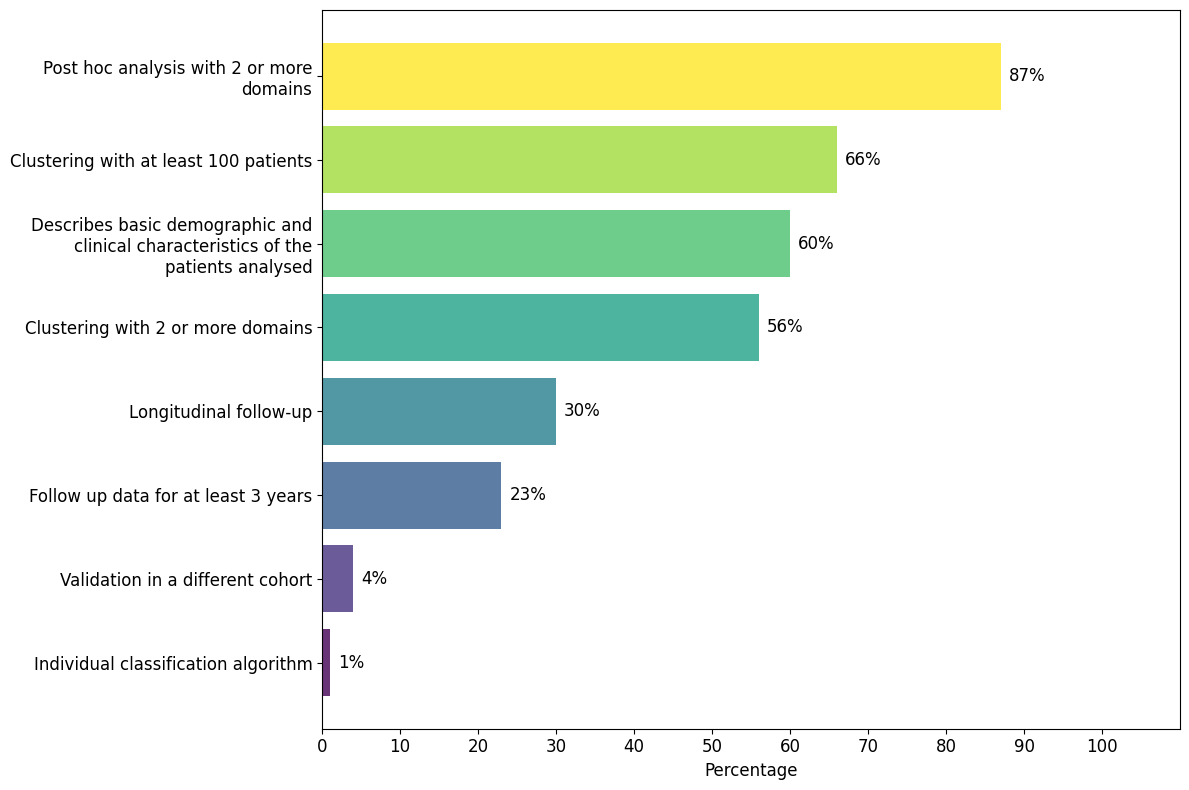

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Define a figure name
figurename = 'Non essential criteria general'

# Calculate percentages
percentages = (df[transition_criteria[1:]].mean() * 100).round()

# Sort percentages in ascending order
percentages = percentages.sort_values()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for more space

# Get evenly spaced colors from the viridis colormap
num_bars = len(percentages)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# Plot the bars with custom colors and alpha
bars = ax.barh(percentages.index, percentages.values, color=colors, alpha=0.8)

# Add labels to the bars
label_padding = 1  # Distance of labels from the bars
for bar in bars:
    width = bar.get_width()
    # Position the text to the right of the bars, with a custom padding
    ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Adjust column names to occupy 2 lines in graph (centered in middle, limited line width)
column_names = [textwrap.fill(col, width=38) for col in percentages.index]
ax.set_yticklabels(column_names)

# Set labels and title
ax.set_xlabel('Percentage', fontsize=12)

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 110)
ax.set_xticks(range(0, 101, 10))

# Increase axis tick size
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove vertical grid lines
ax.grid(False)
plt.tight_layout()  # Ensure labels are not cut off

# Save the figure
plt.savefig(f'Plots/SVG/{figurename}.svg', format='svg', dpi=300)
plt.savefig(f'Plots/PNG/{figurename}.png', format='png', dpi=300)

# Show plot

plt.show()


### Option 2 - Divided by Year

In [ ]:
# Doing simple chi square among categories
from scipy.stats import chi2_contingency

def chi_square_test(column1, column2):
    # Create a contingency table
    contingency_table = pd.crosstab(column1.astype(str), column2.astype(str))

    # Perform the chi-square test
    try:
      chi2, p, dof, ex = chi2_contingency(contingency_table)
    except Exception as e:
      print(e)
      return None

    # Return the p-value
    return round(p,3)

# Apply chi-square test for each column and create a new column for p-values

transition_criteria_no_year_chi_square = []
for col in transition_criteria[1:]:
    transition_criteria_no_year_chi_square.append(chi_square_test(df[col], df['Year Category']))

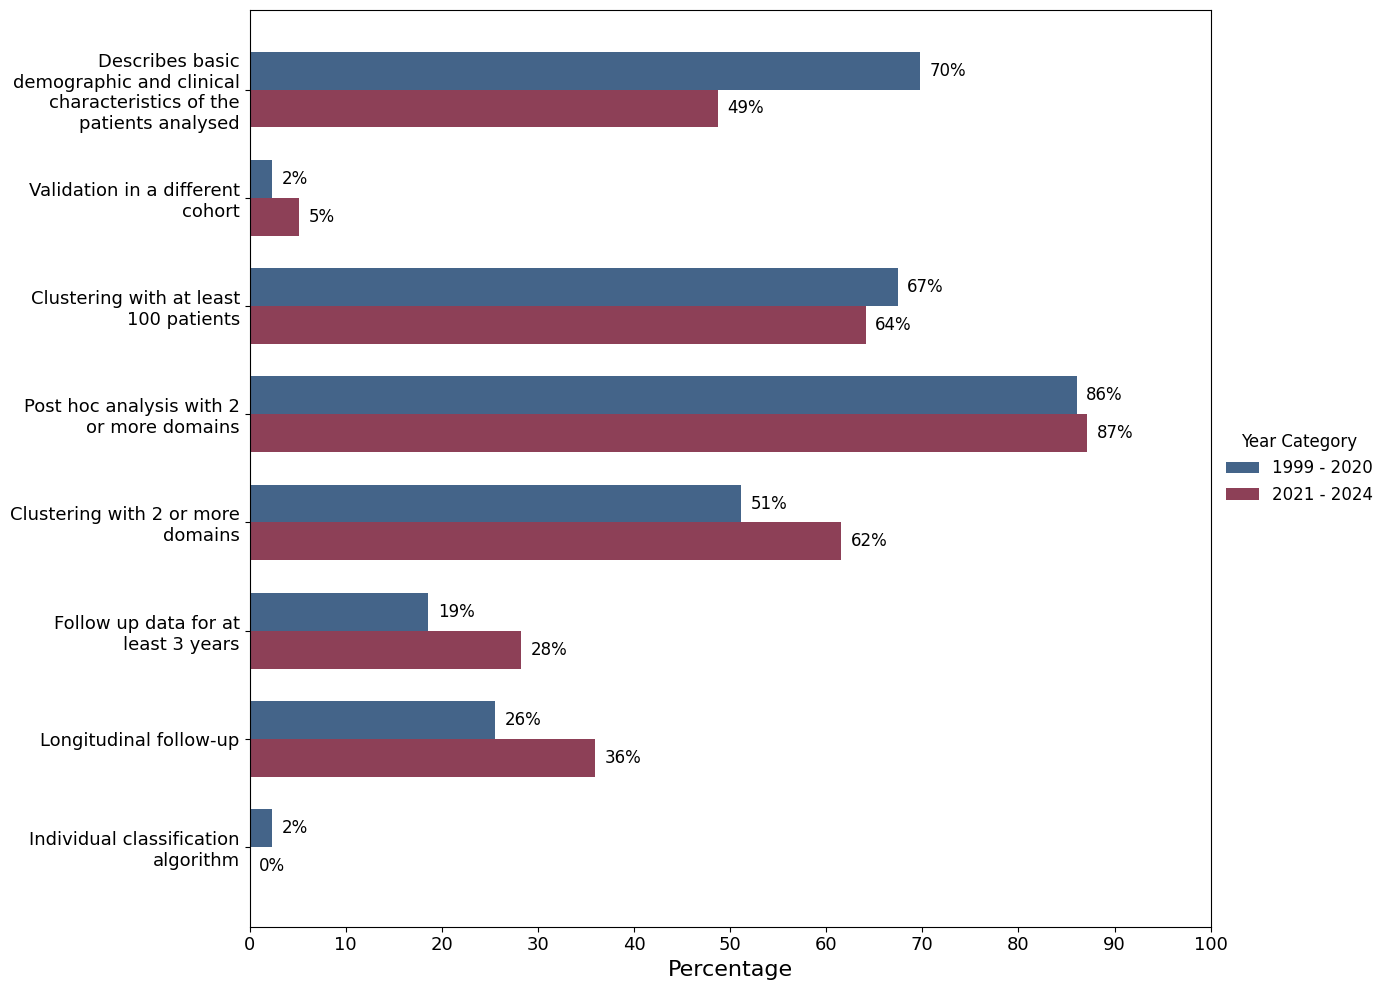

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm

# Define a figurename
figurename = 'Essential progression criteria by year'

# Assuming 'df' and 'transition_criteria' are defined
# Calculate percentages for each 'Year Category'
percentages = df[transition_criteria].groupby('Year Category').mean().T * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the size as needed

bar_width = 0.35  # Set the width of each bar
index = np.arange(len(percentages))  # The label locations

# Reverse the order of columns to plot '1999 - 2021' first
columns = percentages.columns[::-1]

# Choose a color palette
current_palette = cm.RdBu  # Options: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
alpha = 0.75 # alpha

# Plot bars for each year category, reversed to have '1999 - 2021' at top
for i, year in enumerate(percentages.columns[::-1]):
    # Use colors from extreme ends of the colormap
    color_1 = current_palette(0.0)  # Start of the colormap
    color_2 = current_palette(1.0)  # End of the colormap

    # Assign colors alternately from each end of the colormap for visibility
    if i % 2 == 0:
        color = color_1
    else:
        color = color_2

    bars = ax.barh(index + i * bar_width, percentages[year], bar_width, label=year, alpha=alpha, color=color)

    # Add labels to the bars
    label_padding = 1  # Slightly increase padding for clarity
    for bar in bars:
        width = bar.get_width()
        ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Define p-values and corresponding bold condition
p_values = transition_criteria_no_year_chi_square
columns_p_values = dict(zip(transition_criteria[1:], p_values))

# Adjust column names to occupy 2 lines in graph and append * if p-value < 0.05
column_names = [textwrap.fill(col + ('*' if columns_p_values[col] < 0.05 else ''), width=25) for col in percentages.index]

ax.set_yticks(index + bar_width / 2 * (len(columns) - 1))
ax.set_yticklabels(column_names)

# Add labels, title, and legend
ax.set_xlabel('Percentage', fontsize=16)
'''ax.set_title('Percentage of Criteria Met by Year Category', fontsize=16)'''
ax.legend()

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 100)  # Extend x-axis limit to fit labels comfortably
ax.set_xticks(range(0, 101, 10))

# Increase x-axis tick size
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

### Adjusting legends ###
# Get handles and labels from the existing plot
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles/labels for the legend
handles = handles[::-1]
labels = labels[::-1]

# Display the legend with modifications
ax.legend(handles, labels, fontsize='large', title='Year Category', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Adjust layout
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Show plot
plt.show()


In [ ]:
# Very similar, shows there isn't really anything significant
percentages

Year Category              1999 - 2020  2021 - 2024
Individual classificat...        2.326        0.000
Longitudinal follow-up          25.581       35.897
Follow up data for at ...       18.605       28.205
Clustering with 2 or m...       51.163       61.538
Post hoc analysis with...       86.047       87.179
Clustering with at lea...       67.442       64.103
Validation in a differ...        2.326        5.128
Describes basic demogr...       69.767       48.718

###  Option 3 - Donut Chart

Showing the total of studies that fall within specific criterias counts

Total possible: 8

In [ ]:
print(df['Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction'].value_counts())

Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction
3    26
4    19
2    14
5     7
1     7
6     5
0     2
7     2
Name: count, dtype: int64


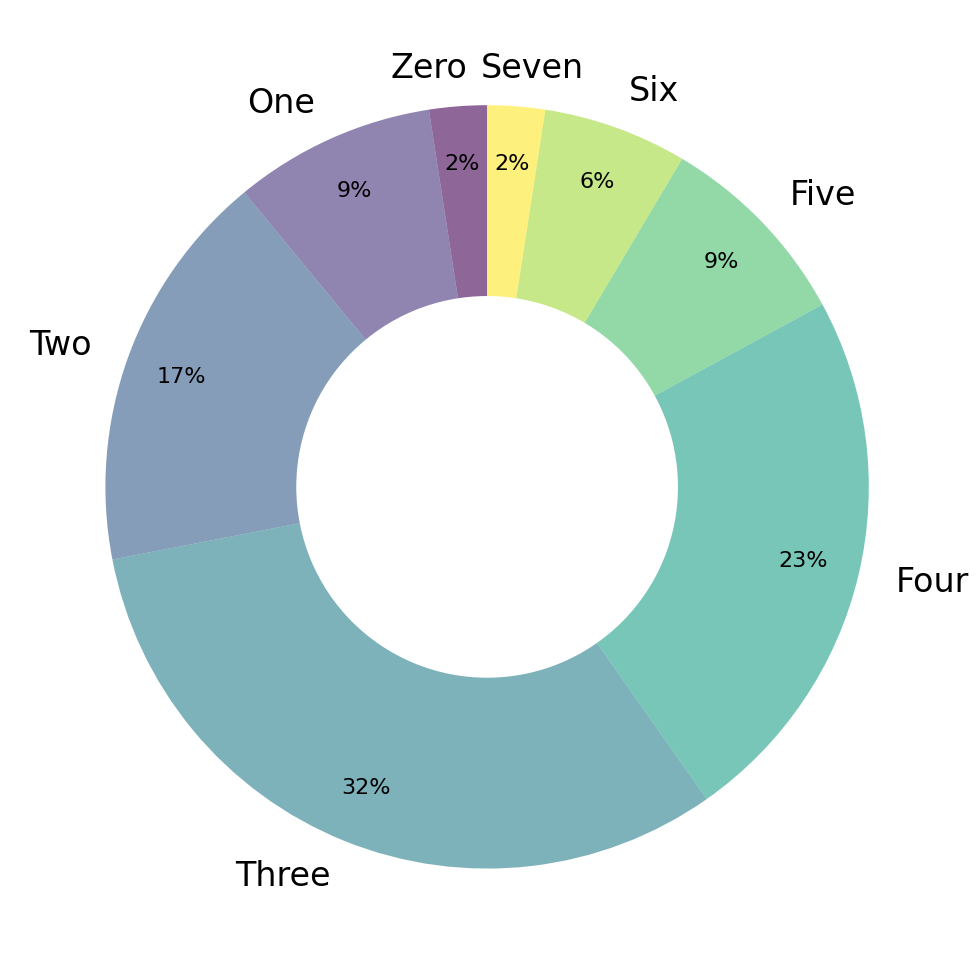

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a figurename
figurename = 'Essential progression criteria donut chart without text'

# Setting data for use
data = df['Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction'].value_counts()

# Convert the series to a DataFrame
tempdf = data.reset_index()
tempdf.columns = ['Number_of_Criteria', 'Count']

# Sort the data by 'Number_of_Criteria' in ascending order (not necessary here as we want words in order)
tempdf = tempdf.sort_values(by='Number_of_Criteria', ascending=True)

# Create a mapping dictionary
criteria_mapping = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight"
}

# Apply the mapping
tempdf['Number_of_Criteria'] = tempdf['Number_of_Criteria'].replace(criteria_mapping)

# Create a color palette with Matplotlib's viridis, applying a softer alpha to each color
colors = plt.cm.viridis(np.linspace(0, 1, len(tempdf)))
colors = [(r, g, b, 0.6) for r, g, b, _ in colors]  # Adding alpha transparency

fig, ax = plt.subplots(figsize=(10, 10))  # Maintain a large figure size for clarity

# Suppress the first and last labels
labels = tempdf['Number_of_Criteria'].tolist()
labels[0] = ""
labels[-1] = ""

wedges, texts, autotexts = ax.pie(tempdf['Count'], labels=labels, autopct='%1.0f%%', startangle=90, colors=colors, pctdistance=0.85, textprops={'color':"black", 'fontsize': 14})

# Draw a circle at the center to create a donut shape
centre_circle = plt.Circle((0,0), 0.50, fc='white')  # Adjust the radius to 0.50 to reduce the size of the central white space
fig.gca().add_artist(centre_circle)

# Improve text readability and aesthetics for remaining labels
for text in texts:
    text.set_fontsize(24)   # Increase font size for labels

for autotext in autotexts:
    autotext.set_color('black')  # Ensure percentage labels are visible
    autotext.set_fontsize(16)    # Consistent and readable font size

# Reposition the first and last labels manually
angle_first = wedges[0].theta2 - (wedges[0].theta2 - wedges[0].theta1) / 2
angle_last = wedges[-1].theta2 - (wedges[-1].theta2 - wedges[-1].theta1) / 2

x_first = 2.0 * np.cos(np.radians(angle_first))
y_first = 1.1 * np.sin(np.radians(angle_first))
x_last = 1.55 * np.cos(np.radians(angle_last))
y_last = 1.1 * np.sin(np.radians(angle_last))

# Add custom text for the first label
ax.text(x_first, y_first, tempdf['Number_of_Criteria'].iloc[0], ha='center', va='center', fontsize=24, color='black')

# Add custom text for the last label
ax.text(x_last, y_last, tempdf['Number_of_Criteria'].iloc[-1], ha='center', va='center', fontsize=24, color='black')

plt.tight_layout()  # Adjust layout to ensure there is no content overlap

# Save the figure
plt.savefig(f'Plots/SVG/{figurename}.svg', format='svg', dpi=300)
plt.savefig(f'Plots/PNG/{figurename}.png', format='png', dpi=300)

plt.show()


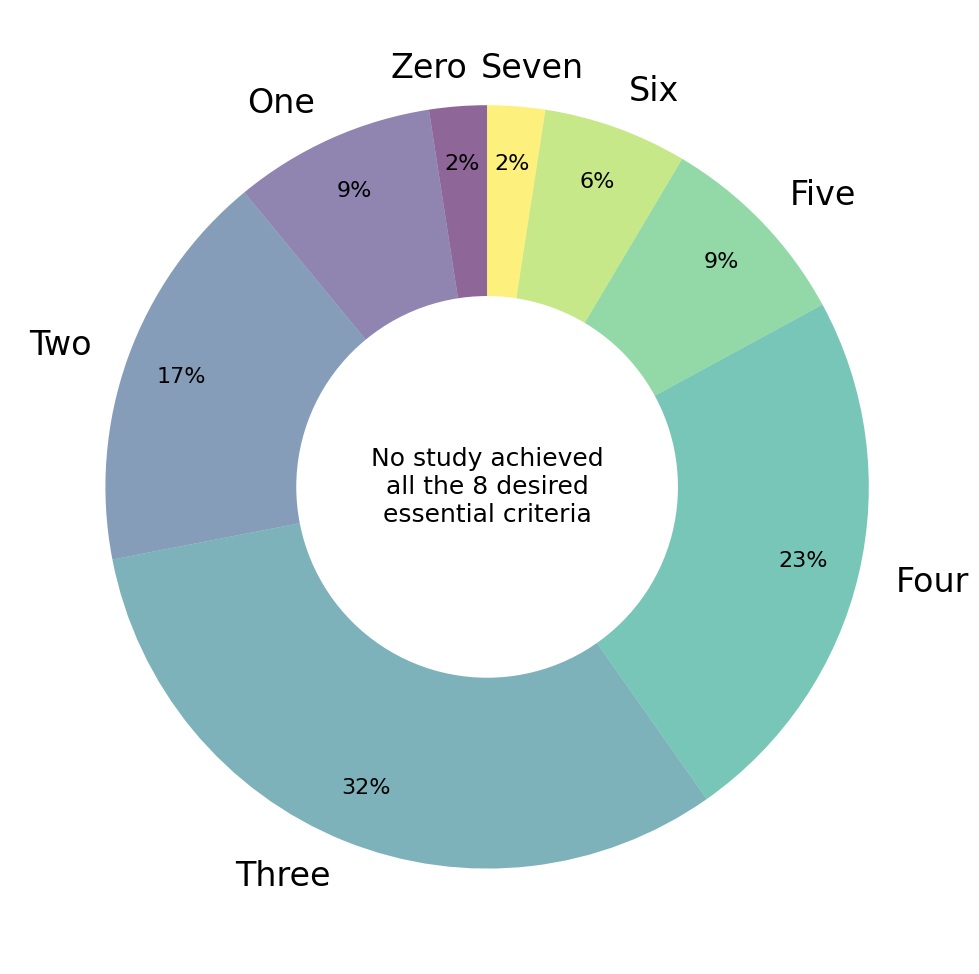

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a figurename
figurename = 'Essential progression criteria donut chart with text'

# Setting data for use
data = df['Number_of_Criteria_Followed_for_Good_Subtyping_for_Disease_Prediction'].value_counts()

# Convert the series to a DataFrame
tempdf = data.reset_index()
tempdf.columns = ['Number_of_Criteria', 'Count']

# Sort the data by 'Number_of_Criteria' in ascending order (not necessary here as we want words in order)
tempdf = tempdf.sort_values(by='Number_of_Criteria', ascending=True)

# Create a mapping dictionary
criteria_mapping = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight"
}

# Apply the mapping
tempdf['Number_of_Criteria'] = tempdf['Number_of_Criteria'].replace(criteria_mapping)

# Create a color palette with Matplotlib's viridis, applying a softer alpha to each color
colors = plt.cm.viridis(np.linspace(0, 1, len(tempdf)))
colors = [(r, g, b, 0.6) for r, g, b, _ in colors]  # Adding alpha transparency

fig, ax = plt.subplots(figsize=(10, 10))  # Maintain a large figure size for clarity

# Suppress the first and last labels
labels = tempdf['Number_of_Criteria'].tolist()
labels[0] = ""
labels[-1] = ""

wedges, texts, autotexts = ax.pie(tempdf['Count'], labels=labels, autopct='%1.0f%%', startangle=90, colors=colors, pctdistance=0.85, textprops={'color':"black", 'fontsize': 14})

# Draw a circle at the center to create a donut shape
centre_circle = plt.Circle((0,0), 0.50, fc='white')  # Adjust the radius to 0.50 to reduce the size of the central white space
fig.gca().add_artist(centre_circle)

# Improve text readability and aesthetics for remaining labels
for text in texts:
    text.set_fontsize(24)   # Increase font size for labels

for autotext in autotexts:
    autotext.set_color('black')  # Ensure percentage labels are visible
    autotext.set_fontsize(16)    # Consistent and readable font size

# Reposition the first and last labels manually
angle_first = wedges[0].theta2 - (wedges[0].theta2 - wedges[0].theta1) / 2
angle_last = wedges[-1].theta2 - (wedges[-1].theta2 - wedges[-1].theta1) / 2

x_first = 2.0 * np.cos(np.radians(angle_first))
y_first = 1.1 * np.sin(np.radians(angle_first))
x_last = 1.55 * np.cos(np.radians(angle_last))
y_last = 1.1 * np.sin(np.radians(angle_last))

# Add custom text for the first label
ax.text(x_first, y_first, tempdf['Number_of_Criteria'].iloc[0], ha='center', va='center', fontsize=24, color='black')

# Add custom text for the last label
ax.text(x_last, y_last, tempdf['Number_of_Criteria'].iloc[-1], ha='center', va='center', fontsize=24, color='black')

# Add phrase in the middle of the donut chart
plt.text(0, 0, 'No study achieved\nall the 8 desired\nessential criteria',
         horizontalalignment='center', verticalalignment='center', fontsize=18, color='black')

plt.tight_layout()  # Adjust layout to ensure there is no content overlap

# Save the figure
plt.savefig(f'Plots/SVG/{figurename}.svg', format='svg', dpi=300)
plt.savefig(f'Plots/PNG/{figurename}.png', format='png', dpi=300)

plt.show()

## Non essential criteria

**Idea:** present visually other criteria that are relevant but weren't cited by the article on the essential criteria

It is mostly a display of measures collected by the quality index

### Creating variables

In [ ]:
# Defining criteria for the graph
criteria = [
    'Year Category',
    'Formal_Criteria_Utilized_or_Informed',
    'Recruitment_Community_or_Population',
    'Specific_Cluster_Validation_Differences_Yes_or_No',
    'Similar_PD_Staging',
    'Drug_Naive_Status',
    'Multicentric_X_Others',
    'Consecutive_or_Random_Sampling',
    'Performed_Validation']

data = df[criteria]

# Renaming columns
column_renames = {
    'Year Category': 'Year Category',
    'Formal_Criteria_Utilized_or_Informed': 'Formal diagnostic criteria used',
    'Recruitment_Community_or_Population': 'Populational or community based recruitment',
    'Specific_Cluster_Validation_Differences_Yes_or_No': 'Post hoc analysis with different variables than those used in clustering',
    'Similar_PD_Staging': 'Patients in a similar PD staging or duration',
    'Drug_Naive_Status': 'Patients being drug naive at clustering',
    'Multicentric_X_Others': 'Multicentric study',
    'Consecutive_or_Random_Sampling': 'Consecutive or random sampling',
    'Performed_Validation': 'Validation performed either within or in another dataset'}

# Data situation
data.rename(columns=column_renames, inplace=True)

# Review
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-414-fb84562fff9d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Formal diagnostic criteria used  \
0.000                    10.98%         
1.000                    89.02%         

      Populational or community based recruitment  \
0.000                    68.29%                     
1.000                    31.71%                     

      Post hoc analysis with different variables than those used in clustering  \
0.000                    24.39%                                                  
1.000                    75.61%                                                  

      Patients in a similar PD staging or duration  \
0.000                    53.66%                      
1.000                    46.34%                      

      Patients being drug naive at clustering Multicentric study  \
0.000                    71.95%                           45.12%   
1.000                    28.05%                           54.88%   

      Consecutive or random sampling  \
0.000                    70.73%        
1.000                    29.27%        

      Validation performed either within or in another dataset  
0.000                    75.61%                                 
1.000                    24.39%

### Option 1 - All Studies

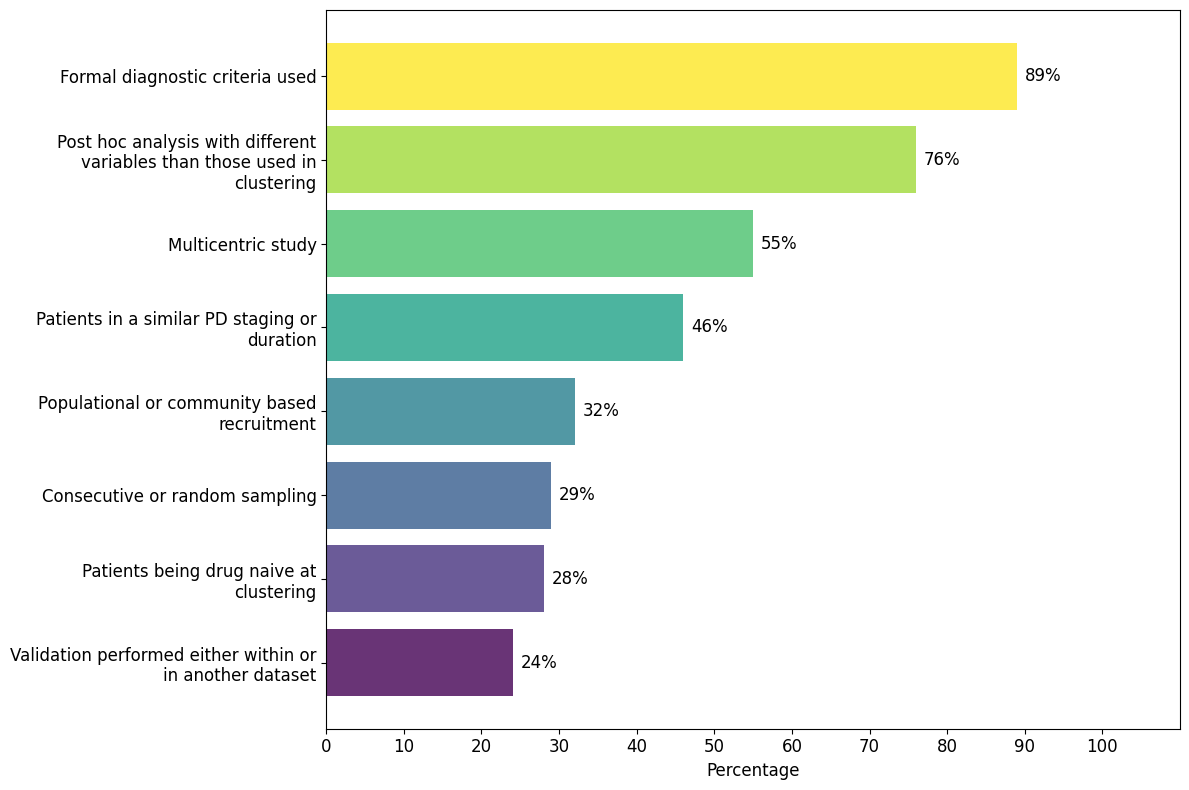

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Define a figure name
figurename = 'Non essential criteria general'

# Calculate percentages
percentages = (data[list(column_renames.values())[1:]].mean() * 100).round()

# Sort percentages in ascending order
percentages = percentages.sort_values()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for more space

# Get evenly spaced colors from the viridis colormap
num_bars = len(percentages)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# Plot the bars with custom colors and alpha
bars = ax.barh(percentages.index, percentages.values, color=colors, alpha=0.8)

# Add labels to the bars
label_padding = 1  # Distance of labels from the bars
for bar in bars:
    width = bar.get_width()
    # Position the text to the right of the bars, with a custom padding
    ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Adjust column names to occupy 2 lines in graph (centered in middle, limited line width)
column_names = [textwrap.fill(col, width=38) for col in percentages.index]
ax.set_yticklabels(column_names)

# Set labels and title
ax.set_xlabel('Percentage', fontsize=12)

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 110)
ax.set_xticks(range(0, 101, 10))

# Increase axis tick size
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove vertical grid lines
ax.grid(False)
plt.tight_layout()  # Ensure labels are not cut off

# Save the figure
plt.savefig(f'Plots/SVG/{figurename}.svg', format='svg', dpi=300)
plt.savefig(f'Plots/PNG/{figurename}.png', format='png', dpi=300)

plt.show()


### Option 2 - Divided by Year

In [ ]:
# Doing simple chi square among categories
from scipy.stats import chi2_contingency

def chi_square_test(column1, column2):
    # Create a contingency table
    contingency_table = pd.crosstab(column1.astype(str), column2.astype(str))

    # Perform the chi-square test
    try:
      chi2, p, dof, ex = chi2_contingency(contingency_table)
    except Exception as e:
      print(e)
      return None

    # Return the p-value
    return round(p,3)

# Apply chi-square test for each column and create a new column for p-values

# Apply chi-square test for each column against 'Year Category' and store p-values
chi_square = []
for col in list(column_renames.values())[1:]:
    p_value = chi_square_test(data[col], data['Year Category'])  # Assuming 'data' has 'Year Category'
    chi_square.append(p_value)

print(chi_square)

[1.0, 0.136, 1.0, 0.282, 0.442, 0.688, 0.134, 1.0]


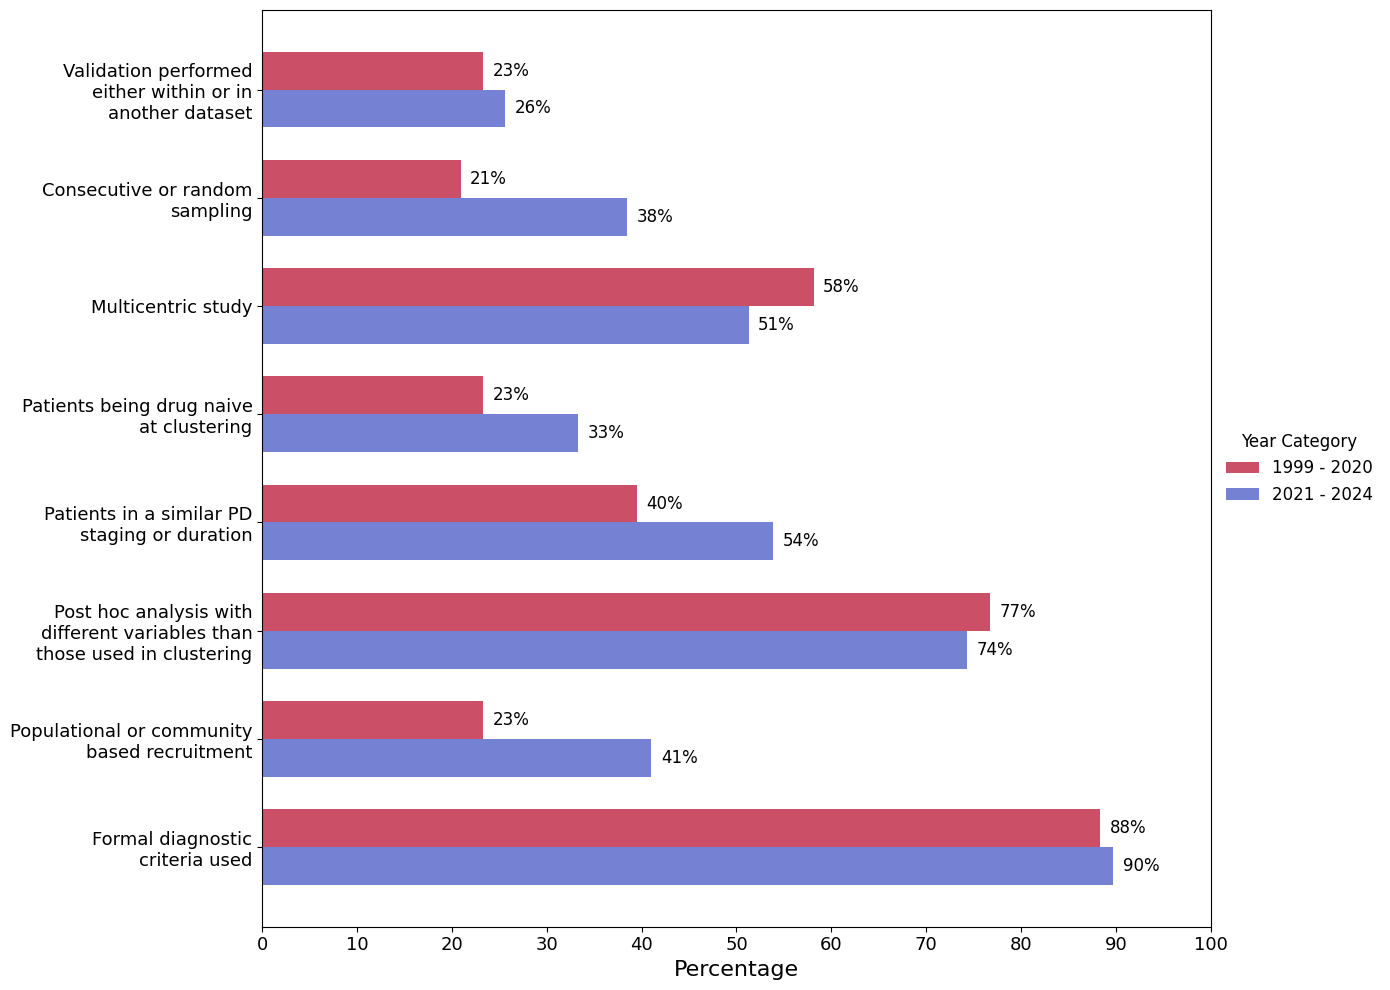

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.cm as cm

# Define a figurename
figurename = 'Non essential criteria by year'

# Assuming 'df' and 'transition_criteria' are defined
# Calculate percentages for each 'Year Category'
percentages = data[list(column_renames.values())].groupby('Year Category').mean().T * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the size as needed

bar_width = 0.35  # Set the width of each bar
index = np.arange(len(percentages))  # The label locations

# Reverse the order of columns to plot '1999 - 2021' first
columns = percentages.columns[::-1]

# Choose a color palette
current_palette = cm.coolwarm  # Options: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
alpha = 0.7 # alpha

# Plot bars for each year category, reversed to have '1999 - 2021' at top
for i, year in enumerate(percentages.columns[::-1]):
    # Use colors from extreme ends of the colormap
    color_1 = current_palette(0.0)  # Start of the colormap
    color_2 = current_palette(1.0)  # End of the colormap

    # Assign colors alternately from each end of the colormap for visibility
    if i % 2 == 0:
        color = color_1
    else:
        color = color_2

    bars = ax.barh(index + i * bar_width, percentages[year], bar_width, label=year, alpha=alpha, color=color)

    # Add labels to the bars
    label_padding = 1  # Slightly increase padding for clarity
    for bar in bars:
        width = bar.get_width()
        ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Define p-values and corresponding bold condition
columns_p_values = dict(zip(list(column_renames.values())[1:], chi_square))

# Adjust column names to occupy 2 lines in graph and append * if p-value < 0.05
column_names = [textwrap.fill(col + ('*' if columns_p_values[col] < 0.05 else ''), width=25) for col in percentages.index]

ax.set_yticks(index + bar_width / 2 * (len(columns) - 1))
ax.set_yticklabels(column_names)

# Add labels, title, and legend
ax.set_xlabel('Percentage', fontsize=16)
ax.legend()

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 100)  # Extend x-axis limit to fit labels comfortably
ax.set_xticks(range(0, 101, 10))

# Increase x-axis tick size
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

### Adjusting legends ###
# Get handles and labels from the existing plot
handles, labels = ax.get_legend_handles_labels()

# Reverse the order of handles/labels for the legend
handles = handles[::-1]
labels = labels[::-1]

# Display the legend with modifications
ax.legend(handles, labels, fontsize='large', title='Year Category', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Adjust layout
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Show plot
plt.show()


## Descriptive data availability

### Preparation

In [ ]:
# Removed (no interest) - 'Income', 'Vital Signs (blood pressure, cardiac frequency)', 'Physical Attributes (weight, height etc)'

descriptivedata = ['Before_2020_After','None of the mentioned data on the PD population was informed by the study',
           'Age', 'Gender', 'Ethnicity', 'Education', 'Family History',
           'Age at disease onset', 'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)',
           'Medication Doses', 'Genetic_Status_Informed',
           'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)',
           'Summarised data from neuroimaging studies (such as cortical thickness)',
           "Biomarker's profile (results from biomarker tests)"]

# Doing simple chi square among categories
from scipy.stats import chi2_contingency

def chi_square_test(column1, column2):
    # Create a contingency table
    contingency_table = pd.crosstab(column1.astype(str), column2.astype(str))

    # Perform the chi-square test
    try:
      chi2, p, dof, ex = chi2_contingency(contingency_table)
    except Exception as e:
      print(e)
      return None

    # Return the p-value
    return round(p,3)

# Apply chi-square test for each column and create a new column for p-values

pvalueslist = []
for col in descriptivedata[1:]:
    pvalueslist.append(chi_square_test(df[col], df['Before_2020_After']))

pvalueslist

[0.024,
 0.013,
 0.207,
 0.893,
 1.0,
 0.583,
 0.271,
 0.015,
 0.322,
 1.0,
 0.085,
 0.764,
 0.91]

In [ ]:
data = df[descriptivedata]

# Renaming columns
column_renames = {
    'Before_2020_After':'Year Category',
    'None of the mentioned data on the PD population was informed by the study': 'No data provided',
    'Age': 'Age',
    'Gender': 'Sex',
    'Ethnicity': 'Ethnicity',
    'Education': 'Education',
    'Family History': 'Family history',
    'Age at disease onset': 'Disease onset age',
    'Disease duration (years) or staging (such as Hoehn & Yahr and Schawb and England scales)': 'Disease duration/staging',
    'Medication Doses': 'Medication doses',
    'Genetic_Status_Informed': 'Genetic status',
    'Summarised data from clinical scales (such as mean MDS-UPDRS scores, number of non-motor symptoms)': 'Clinical scales data',
    'Summarised data from neuroimaging studies (such as cortical thickness)': 'Neuroimaging data',
    "Biomarker's profile (results from biomarker tests)": 'Biomarker profile'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-419-af8e6ce1e580>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


No data provided     Age     Sex Ethnicity Education Family history  \
0           82.93%  18.29%  28.05%    91.46%    62.20%         92.68%   
1           17.07%  81.71%  71.95%     8.54%    37.80%          7.32%   

  Disease onset age Disease duration/staging Medication doses Genetic status  \
0            67.07%                   31.71%           59.76%         92.68%   
1            32.93%                   68.29%           40.24%          7.32%   

  Clinical scales data Neuroimaging data Biomarker profile  
0               32.93%            92.68%            93.90%  
1               67.07%             7.32%             6.10%

### Option 1 - All Studies


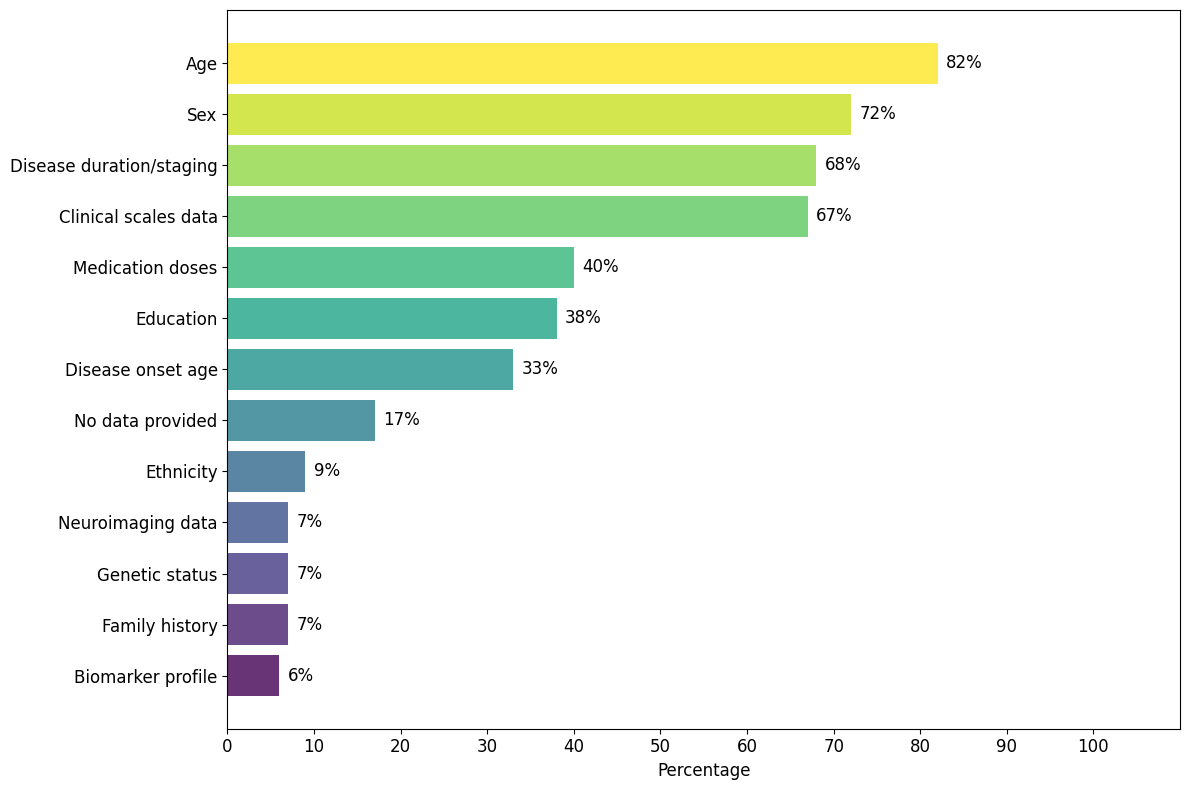

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Define a figure name
figurename = 'Descriptive data availability general'

# Calculate percentages
percentages = (data[list(column_renames.values())[1:]].mean() * 100).round()

# Sort percentages in ascending order
percentages = percentages.sort_values()

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Increase figure size for more space

# Get evenly spaced colors from the viridis colormap
num_bars = len(percentages)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))

# Plot the bars with custom colors and alpha
bars = ax.barh(percentages.index, percentages.values, color=colors, alpha=0.8)

# Add labels to the bars
label_padding = 1  # Distance of labels from the bars
for bar in bars:
    width = bar.get_width()
    # Position the text to the right of the bars, with a custom padding
    ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Adjust column names to occupy 2 lines in graph (centered in middle, limited line width)
column_names = [textwrap.fill(col, width=38) for col in percentages.index]
ax.set_yticklabels(column_names)

# Set labels and title
ax.set_xlabel('Percentage', fontsize=12)

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 110)
ax.set_xticks(range(0, 101, 10))

# Increase axis tick size
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove vertical grid lines
ax.grid(False)
plt.tight_layout()  # Ensure labels are not cut off

# Save the figure
plt.savefig(f'Plots/SVG/{figurename}.svg', format='svg', dpi=300)
plt.savefig(f'Plots/PNG/{figurename}.png', format='png', dpi=300)

plt.show()


### Option 2 - Divided by Year


In [ ]:
data['Year Category'] = data['Year Category'].replace('1.0', '2021 - 2024')
data['Year Category'] = data['Year Category'].replace('0.0', '1999 - 2020')

<ipython-input-421-3cc0f19d5bcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year Category'] = data['Year Category'].replace('1.0', '2021 - 2024')
<ipython-input-421-3cc0f19d5bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year Category'] = data['Year Category'].replace('0.0', '1999 - 2020')


In [ ]:
data[list(column_renames.values())].groupby('Year Category').mean()

No data provided   Age   Sex  Ethnicity  Education  \
Year Category                                                       
1999 - 2020               0.070 0.930 0.791      0.070      0.372   
2021 - 2024               0.282 0.692 0.641      0.103      0.385   

               Family history  Disease onset age  Disease duration/staging  \
Year Category                                                                
1999 - 2020             0.047              0.395                     0.814   
2021 - 2024             0.103              0.256                     0.538   

               Medication doses  Genetic status  Clinical scales data  \
Year Category                                                           
1999 - 2020               0.465           0.070                 0.767   
2021 - 2024               0.333           0.077                 0.564   

               Neuroimaging data  Biomarker profile  
Year Category                                        
1999 - 2020                0.093              0.047  
2021 - 2024                0.051              0.077

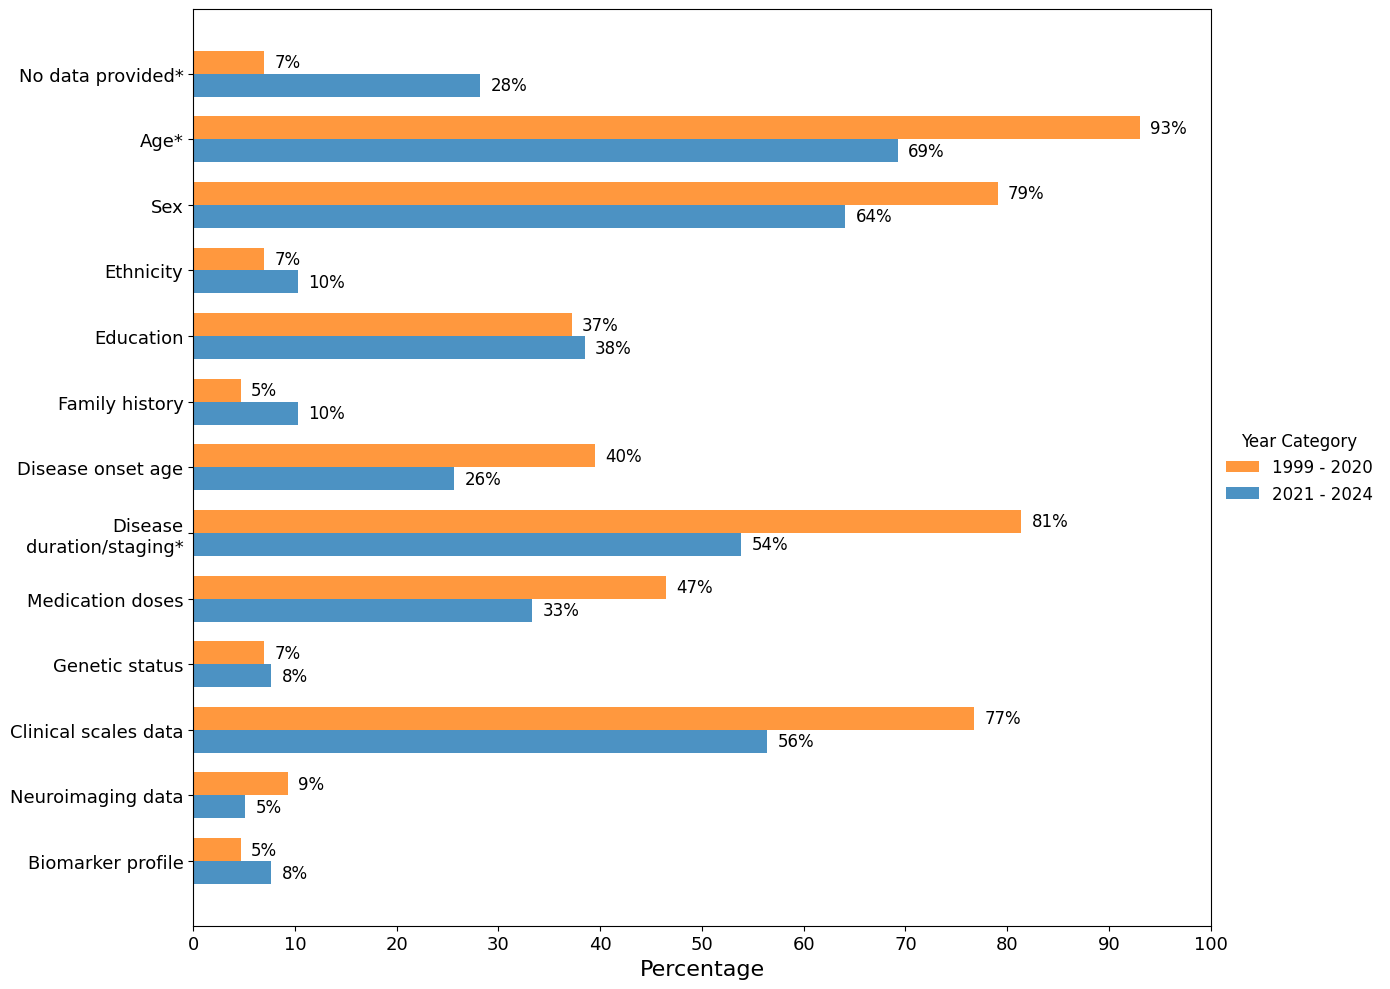

In [ ]:
# Getting a figure name
figurename = 'Descriptive data informed by year'

# Assuming 'df' and 'transition_criteria' are defined
# Calculate percentages for each 'Year Category'
percentages = data[list(column_renames.values())].groupby('Year Category').mean().T * 100

# Reverse the DataFrame along the index to feed the results backwards
percentages = percentages.iloc[::-1]

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust the size as needed

bar_width = 0.35  # Set the width of each bar
index = np.arange(len(percentages))  # The label locations

# Reverse the order of columns to plot '1999 - 2021' first
columns = percentages.columns[::-1]

### OPTION 1 FOR COLOR - PROVIDING HEX VALUES TO A LIST
color_palette = ['#1f77b4', '#ff7f0e']  # Two hex values
alpha = 0.8  # Transparency

# Plot bars for each year category, reversed to have '1999 - 2021' at top
for i, year in enumerate(columns):
    # Assign colors alternately from the custom palette for visibility
    color = color_palette[i % 2]  # Alternating colors
    bars = ax.barh(index + i * bar_width, percentages[year], bar_width, label=year, alpha=alpha, color=color)

    # Add labels to the bars
    label_padding = 1  # Slightly increase padding for clarity
    for bar in bars:
        width = bar.get_width()
        ax.text(width + label_padding, bar.get_y() + bar.get_height()/2, f'{width:.0f}%', va='center', ha='left', fontsize=12)

# Define p-values and corresponding bold condition
columns_p_values = dict(zip(list(column_renames.values())[1:], pvalueslist))

# Adjust column names to occupy 2 lines in graph and append * if p-value < 0.05
column_names = [textwrap.fill(col + ('*' if columns_p_values[col] < 0.05 else ''), width=20) for col in percentages.index]

ax.set_yticks(index + bar_width / 2 * (len(columns) - 1))
ax.set_yticklabels(column_names)

# Add labels, title, and legend
ax.set_xlabel('Percentage', fontsize=16)
ax.legend()

# Adjust x-axis limits to 100% with spaces every 10%
ax.set_xlim(0, 100)  # Extend x-axis limit to fit labels comfortably
ax.set_xticks(range(0, 101, 10))

# Increase x-axis tick size
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

### Adjusting legends ###
# Get handles and labels from the existing plot
handles, labels = ax.get_legend_handles_labels()
handles.reverse()
labels.reverse()

# Adjusting legends: Positioned outside the graph to the right, centered vertically, no frame
ax.legend(handles, labels, fontsize='large', title='Year Category', title_fontsize='large', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Adjust layout
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Show plot
plt.show()

In [ ]:
### OPTION 2 FOR PROVIDING COLOR
# Choose a color palette
current_palette = cm.BrBG  # Options: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'
alpha = 0.75 # alpha

# Plot bars for each year category, reversed to have '1999 - 2021' at top
for i, year in enumerate(percentages.columns[::-1]):
    # Use colors from extreme ends of the colormap
    color_1 = current_palette(0.0)  # Start of the colormap
    color_2 = current_palette(1.0)  # End of the colormap

    # Assign colors alternately from each end of the colormap for visibility
    if i % 2 == 0:
        color = color_1
    else:
        color = color_2

    bars = ax.barh(index + i * bar_width, percentages[year], bar_width, label=year, alpha=alpha, color=color)

Test with radar chart - bad

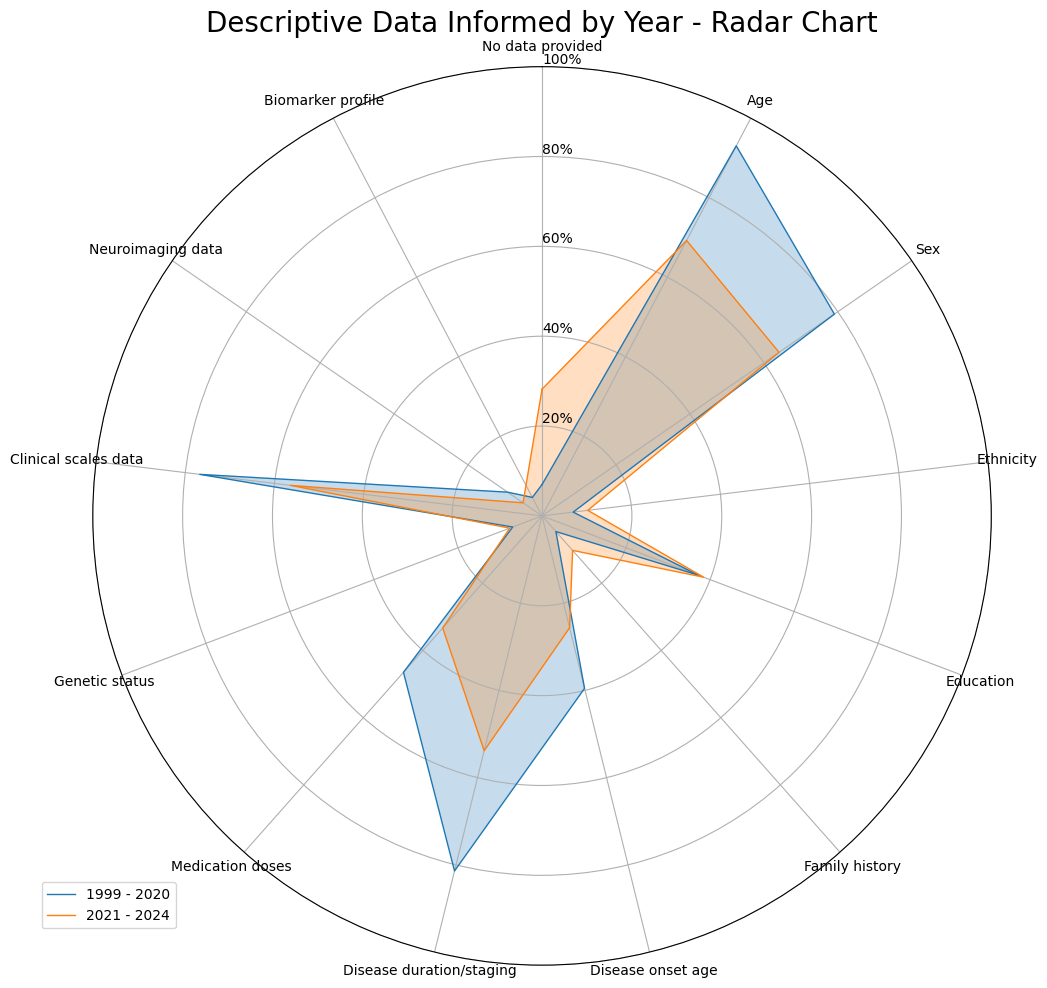

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

# Assuming 'data' and 'column_renames' are defined
# Calculate percentages for each 'Year Category'
percentages = data[list(column_renames.values())].groupby('Year Category').mean().T * 100

# Prepare Radar Chart Data
labels = percentages.index
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()  # Close the loop
angles += angles[:1]  # Ensure the graph starts and ends at the same point

fig, ax = plt.subplots(figsize=(14, 10), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Draw ylabels
ax.set_rlabel_position(0)
ax.set_yticks([20, 40, 60, 80, 100])  # Define the y-ticks to match your scale
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
ax.set_ylim(0, 100)

# Plot each 'Year Category'
for col in percentages.columns:
    values = percentages[col].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=col)
    ax.fill(angles, values, alpha=0.25)  # Adjust alpha to improve visibility if needed

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Descriptive Data Informed by Year - Radar Chart', size=20)
plt.tight_layout()
plt.show()


## Countries represented

Adjusted - PPMI isn't counting as Middle East and Africa (only 1 center)

In [ ]:
# Defining the different options for answers
descriptivedata = [
    'Sub-Saharan Africa_Adjusted_PPMI',
    'Middle East & North Africa_Adjusted_PPMI',
    'East Asia & Pacific (China, Japan, Australia)_Adjusted_PPMI',
    'South Asia (India, Pakistan, Bangladesh)_Adjusted_PPMI',
    'Europe & Central Asia_Adjusted_PPMI',
    'Latin America & the Caribbean_Adjusted_PPMI',
    'North America_Adjusted_PPMI'
]

data = df[descriptivedata]

# Renaming columns
column_renames = {
    'Sub-Saharan Africa_Adjusted_PPMI':'Sub-Saharan Africa',
    'Middle East & North Africa_Adjusted_PPMI':'Middle East & North Africa',
    'East Asia & Pacific (China, Japan, Australia)_Adjusted_PPMI':'East Asia & Pacific',
    'South Asia (India, Pakistan, Bangladesh)_Adjusted_PPMI':'South Asia',
    'Europe & Central Asia_Adjusted_PPMI':'Europe & Central Asia',
    'Latin America & the Caribbean_Adjusted_PPMI':'Latin America & the Caribbean',
    'North America_Adjusted_PPMI':'North America'}

# Data situation
data.rename(columns=column_renames, inplace=True)

# Sum up all 1's in each column to get the count of studies per region
region_counts = data.sum()

# Calculate percentages
total_patients = region_counts.sum()
percentages = region_counts / total_patients * 100
percentages = round(percentages,0)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-426-a7d9158c2e51>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Sub-Saharan Africa Middle East & North Africa East Asia & Pacific  \
0            100.00%                   100.00%               75.61%   
1                                                            24.39%   

  South Asia Europe & Central Asia Latin America & the Caribbean North America  
0    100.00%                37.80%                    98.78%            57.32%  
1                           62.20%                     1.22%            42.68%

In [ ]:
percentages

Sub-Saharan Africa               0.000
Middle East & North Africa       0.000
East Asia & Pacific             19.000
South Asia                       0.000
Europe & Central Asia           48.000
Latin America & the Caribbean    1.000
North America                   33.000
dtype: float64

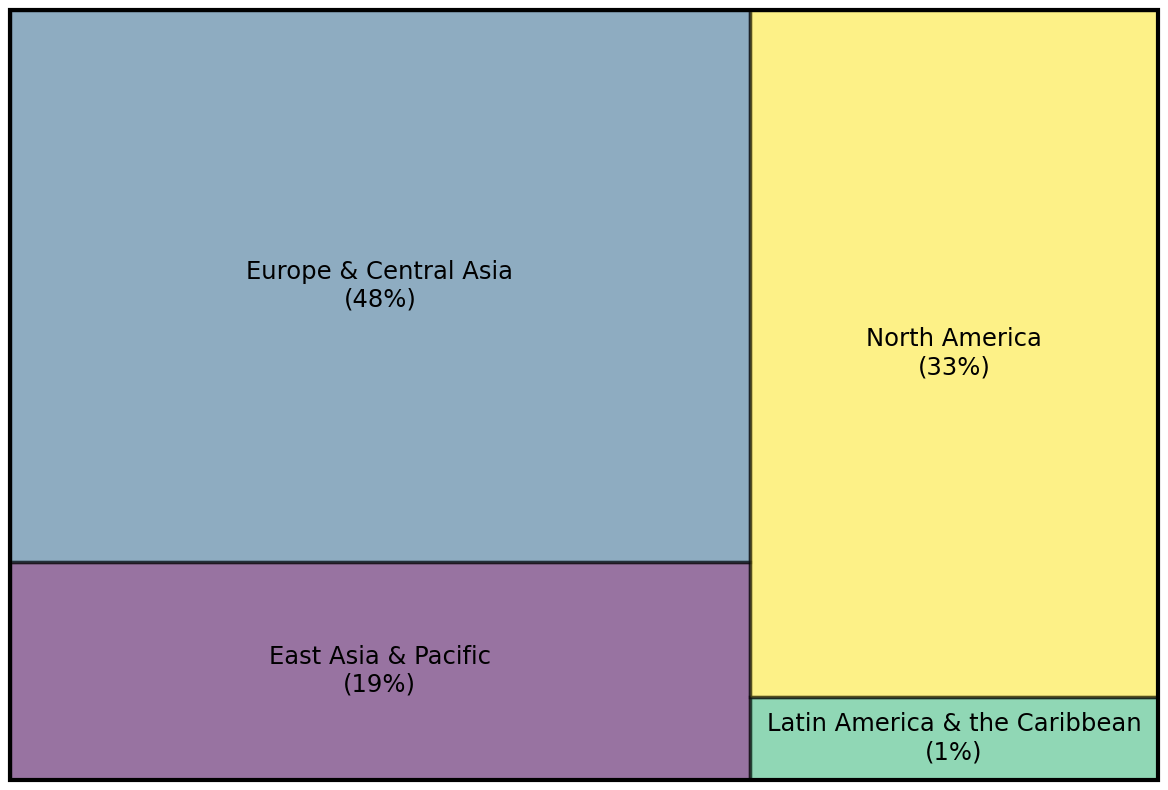

In [ ]:
import matplotlib.pyplot as plt
!pip install squarify
import squarify
import numpy as np
import matplotlib.patches as patches

figurename = 'Countries represented adjusted PPMI'

# Assuming 'percentages' contains the percentage distribution data
# Prepare data and filter out zero values
filtered_percentages = percentages[percentages > 0]

# Adjust very small values slightly for better visibility in the plot
min_area = 4  # Minimum percentage area for visibility
adjusted_sizes = [max(value, min_area) for value in filtered_percentages]

# Generate labels with percentages
labels = [f"{idx}\n({val:.0f}%)" for idx, val in zip(filtered_percentages.index, filtered_percentages)]

# Plotting a Treemap only with non-zero regions
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('black')  # Set the background color to black
colors = plt.cm.viridis(np.linspace(0, 1, len(filtered_percentages)))  # Color map adjustment
squarify.plot(sizes=adjusted_sizes,
              label=labels,
              alpha=0.55,
              color=colors,
              text_kwargs={'fontsize':17.5, 'color':'black'},  # Ensure labels are visible against a black background
              ec='black',  # Set the edge color to white for visibility
              linewidth=2.5)  # Increase line width for thicker borders

# Add an outer border
rect = patches.Rectangle((0, 0), 1, 1, fill=False, color="black", linewidth=3, transform=ax.transAxes, clip_on=False)
ax.add_patch(rect)
plt.axis('off')

# Adjust layout
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

plt.show()


In [ ]:
'''# Install rpy2
!pip install rpy2

# Load the R extension
%load_ext rpy2.ipython'''

'# Install rpy2\n!pip install rpy2\n\n# Load the R extension\n%load_ext rpy2.ipython'

In [ ]:
'''%%R
# Install necessary packages if not already installed
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("treemapify")) install.packages("treemapify")
if (!require("viridis")) install.packages("viridis")

# Load the packages
library(ggplot2)
library(treemapify)
library(viridis)'''

'%%R\n# Install necessary packages if not already installed\nif (!require("ggplot2")) install.packages("ggplot2")\nif (!require("treemapify")) install.packages("treemapify")\nif (!require("viridis")) install.packages("viridis")\n\n# Load the packages\nlibrary(ggplot2)\nlibrary(treemapify)\nlibrary(viridis)'

In [ ]:
'''%%R
# Define the data
data <- data.frame(
  Region = c("Sub-Saharan Africa", "Middle East & North Africa", "East Asia & Pacific",
             "South Asia", "Europe & Central Asia", "Latin America & the Caribbean",
             "North America"),
  Counts = c(0, 0, 19, 0, 47, 1, 32)
)

# Apply viridis color map with alpha set to 0.55
colors <- viridis_pal(alpha = 1)(length(unique(data$Region)))

# Create the treemap
treemap <- ggplot(data, aes(area = Counts, fill = Region, label = paste(Region, "\n(", Counts, "%)", sep=""))) +
  geom_treemap() +
  geom_treemap_text(fontface = "bold", colour = "black", place = "centre", grow = TRUE, reflow = TRUE) +
  scale_fill_manual(values = colors) +
  theme_minimal() +
  theme(legend.position = "none")

# Print the treemap
print(treemap)
'''

'%%R\n# Define the data\ndata <- data.frame(\n  Region = c("Sub-Saharan Africa", "Middle East & North Africa", "East Asia & Pacific",\n             "South Asia", "Europe & Central Asia", "Latin America & the Caribbean",\n             "North America"),\n  Counts = c(0, 0, 19, 0, 47, 1, 32)\n)\n\n# Apply viridis color map with alpha set to 0.55\ncolors <- viridis_pal(alpha = 1)(length(unique(data$Region)))\n\n# Create the treemap\ntreemap <- ggplot(data, aes(area = Counts, fill = Region, label = paste(Region, "\n(", Counts, "%)", sep=""))) +\n  geom_treemap() +\n  geom_treemap_text(fontface = "bold", colour = "black", place = "centre", grow = TRUE, reflow = TRUE) +\n  scale_fill_manual(values = colors) +\n  theme_minimal() +\n  theme(legend.position = "none")\n\n# Print the treemap\nprint(treemap)\n'

In [ ]:
'''import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame where rows are entries and columns are regions
region_totals = data.sum()

# Prepare data for the treemap
regions = region_totals.index
counts = region_totals.values

# Apply square root transformation to 'counts' for a more balanced visual representation
transformed_counts = np.sqrt(counts)

# Create the treemap
fig = px.treemap(
    data_frame=pd.DataFrame({'Region': regions, 'Counts': transformed_counts}),  # Creating a DataFrame directly
    path=[px.Constant("all"), 'Region'],  # Defines the hierarchy of the treemap
    values='Counts',  # The area of each sector
    title="Treemap of Patient Distribution by Region"
)

# Apply color palette similar to viridis
colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))
colors_hex = [f'rgb({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)})' for c in colors]
fig.update_traces(marker_colors=colors_hex)

# Update layout aesthetics
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)

# Display the treemap
fig.show()
'''

'import numpy as np\nimport plotly.express as px\nimport matplotlib.pyplot as plt\n\n# Assuming \'data\' is a DataFrame where rows are entries and columns are regions\nregion_totals = data.sum()\n\n# Prepare data for the treemap\nregions = region_totals.index\ncounts = region_totals.values\n\n# Apply square root transformation to \'counts\' for a more balanced visual representation\ntransformed_counts = np.sqrt(counts)\n\n# Create the treemap\nfig = px.treemap(\n    data_frame=pd.DataFrame({\'Region\': regions, \'Counts\': transformed_counts}),  # Creating a DataFrame directly\n    path=[px.Constant("all"), \'Region\'],  # Defines the hierarchy of the treemap\n    values=\'Counts\',  # The area of each sector\n    title="Treemap of Patient Distribution by Region"\n)\n\n# Apply color palette similar to viridis\ncolors = plt.cm.viridis(np.linspace(0, 1, len(regions)))\ncolors_hex = [f\'rgb({int(c[0]*255)}, {int(c[1]*255)}, {int(c[2]*255)})\' for c in colors]\nfig.update_traces(marker_col

## Feature types according to year (clustering)

### All features

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clustering_Clinical_Any_Motor_Scales_No_Complications',
                'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                'Clustering_Clinical_Including_Cognition',
                'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other',
                'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                'Clustering_Any_Neurophysiology',
                'Clustering_Any_Neuroimaging',
                'Clustering_Any_Omics']

# Creating temporary dataset to work with
try:
    data = df[featuretypes]
except KeyError as e:
    print(f"KeyError: {e}")
    print("Check the following column names:", featuretypes)
    print("Existing columns in df:", df.columns)

# Renaming columns
column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Clustering_Clinical_Any_Motor_Scales_No_Complications': 'Motor scales',
    'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)': 'Motor complications',
    'Clustering_Clinical_Including_Cognition': 'Cognition',
    'Clustering_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other': 'Other non-motor',
    'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': 'Biomarkers',
    'Clustering_Any_Neurophysiology': 'Neurophysiology',
    'Clustering_Any_Neuroimaging': 'Neuroimaging',
    'Clustering_Any_Omics': 'Omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-433-f9d0cb3929dd>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor scales Motor complications Cognition Other non-motor Biomarkers  \
0       48.78%              84.15%    36.59%          48.78%     96.34%   
1       51.22%              15.85%    63.41%          51.22%      3.66%   

  Neurophysiology Neuroimaging   Omics  
0          98.78%       78.05%  92.68%  
1           1.22%       21.95%   7.32%

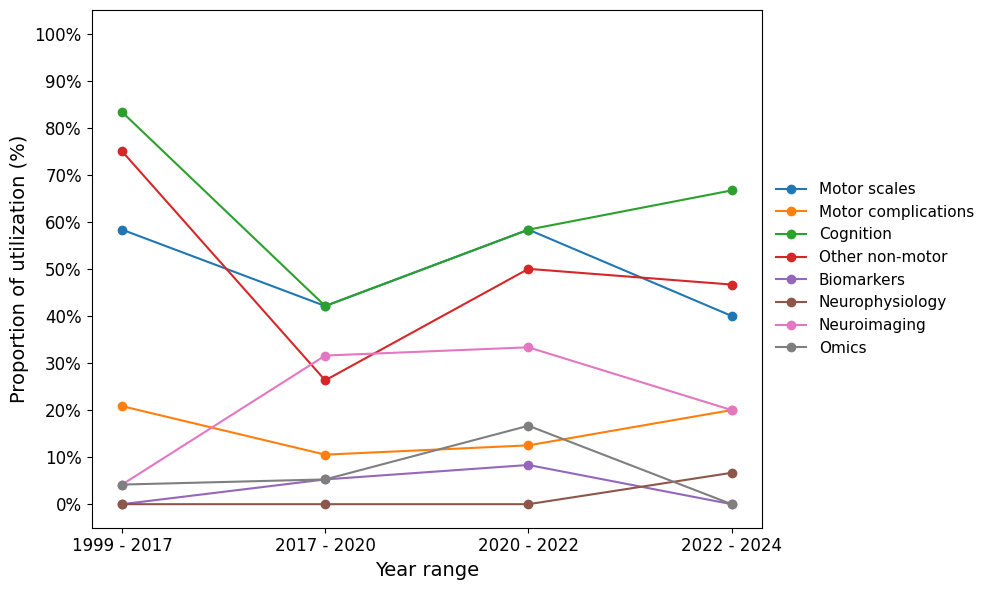

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - all'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### All features 2.0

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clustering_Any_Clinical',
                'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                'Clustering_Any_Neurophysiology',
                'Clustering_Any_Neuroimaging',
                'Clustering_Any_Omics']

# Creating temporary dataset to work with
try:
    data = df[featuretypes]
except KeyError as e:
    print(f"KeyError: {e}")
    print("Check the following column names:", featuretypes)
    print("Existing columns in df:", df.columns)

# Renaming columns
column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Clustering_Any_Clinical':'Clinical',
    'Clustering_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': 'Biomarkers',
    'Clustering_Any_Neurophysiology': 'Neurophysiology',
    'Clustering_Any_Neuroimaging': 'Neuroimaging',
    'Clustering_Any_Omics': 'Omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-435-1a10e772dd10>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Clinical Biomarkers Neurophysiology Neuroimaging   Omics
0   14.63%     96.34%          98.78%       78.05%  92.68%
1   85.37%      3.66%           1.22%       21.95%   7.32%

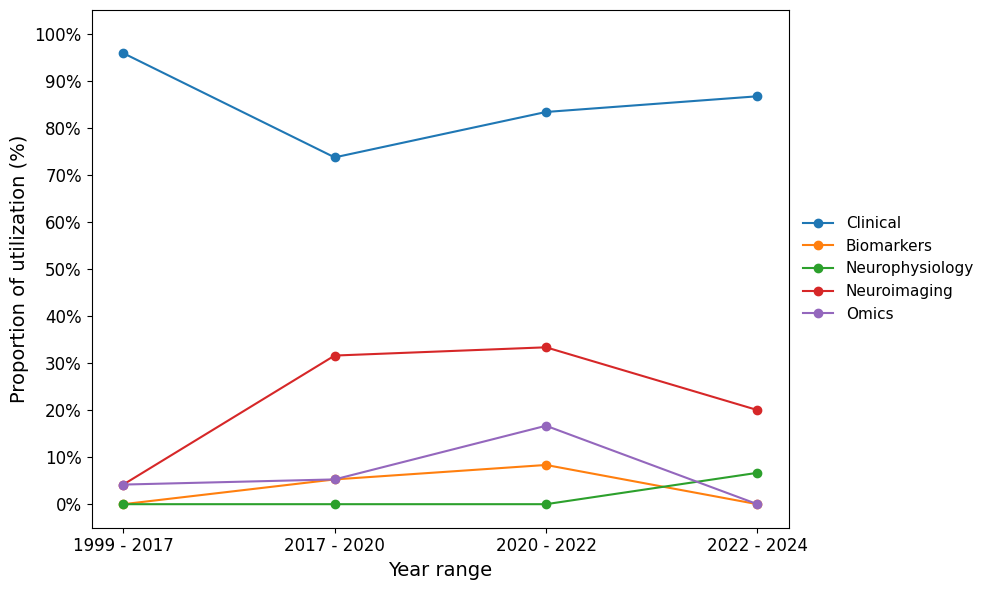

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - all 2.0'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Clinical non-motor

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clustering_Clinical_Including_Cognition',
                'Clustering_Clinical_Any_Neuropsychiatric',
 'Clustering_Clinical_Any_Sleep',
 'Clustering_Clinical_Any_Olfaction',
 'Clustering_Clinical_Any_Autonomic',
 'Clustering_Clinical_QoL',
 'Clustering_Clinical_Non_Motor_Other']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Clustering_Clinical_Including_Cognition' : 'Cognition',
    'Clustering_Clinical_Any_Neuropsychiatric': 'Neuropsychiatric symptoms',
    'Clustering_Clinical_Any_Sleep': 'Sleep symptoms',
    'Clustering_Clinical_Any_Olfaction': 'Anosmia or hyposmia',
    'Clustering_Clinical_Any_Autonomic': 'Autonomic symptoms',
    'Clustering_Clinical_QoL': 'Quality of life',
    'Clustering_Clinical_Non_Motor_Other': 'Other symptoms'}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-437-c6a2e4011647>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Cognition Neuropsychiatric symptoms Sleep symptoms Anosmia or hyposmia  \
0    36.59%                    52.44%         65.85%              85.37%   
1    63.41%                    47.56%         34.15%              14.63%   

  Autonomic symptoms Quality of life Other symptoms  
0             64.63%          93.90%         82.93%  
1             35.37%           6.10%         17.07%

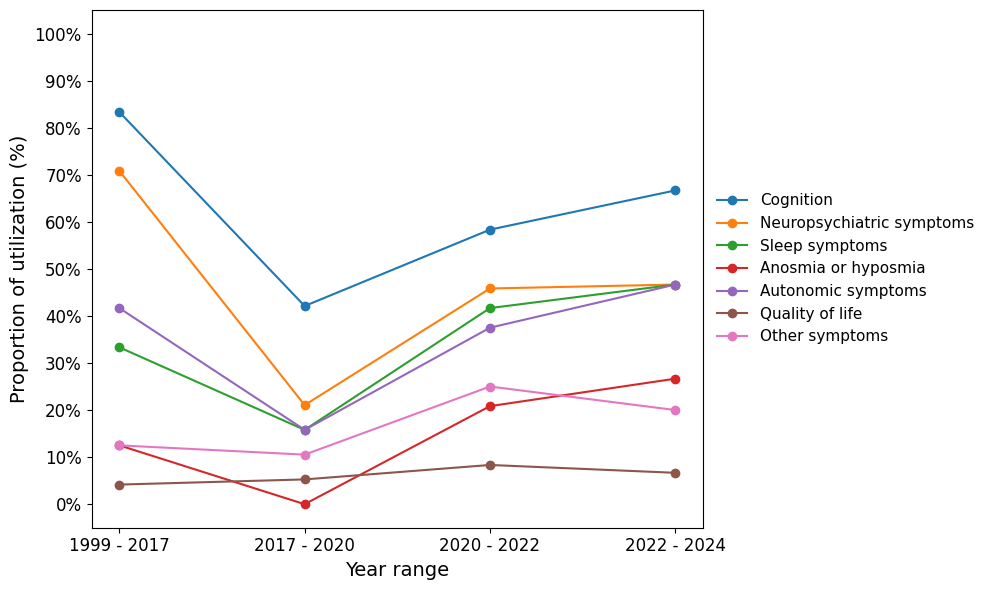

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - clinical non-motor detailed'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Clinical motor

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clustering_Clinical_Any_Motor_Scales_No_Complications',
                'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                 'Clustering_Clinical_Phonation',
 'Clustering_Clinical_Motor_Tests',
 'Clustering_Any_Demographic',
 'Clustering_Any_Time_or_Staging_Measurements',
 'Clustering_Clinical_Vital_or_Neurologic_Examination'
]

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Clustering_Clinical_Any_Motor_Scales_No_Complications': 'Motor scales',
    'Clustering_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)': 'Motor complications',
        'Clustering_Clinical_Phonation': 'Phonation',
    'Clustering_Clinical_Motor_Tests': 'Motor tests',
    'Clustering_Any_Demographic': 'Demographic data',
    'Clustering_Any_Time_or_Staging_Measurements':'Disease staging',
    'Clustering_Clinical_Vital_or_Neurologic_Examination': 'Neurologic examination findings'

}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values()))

<ipython-input-439-e48d4844823c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor scales Motor complications Phonation Motor tests Demographic data  \
0       48.78%              84.15%    97.56%      98.78%           70.73%   
1       51.22%              15.85%     2.44%       1.22%           29.27%   

  Disease staging Neurologic examination findings  
0          74.39%                    91.46%        
1          25.61%                     8.54%

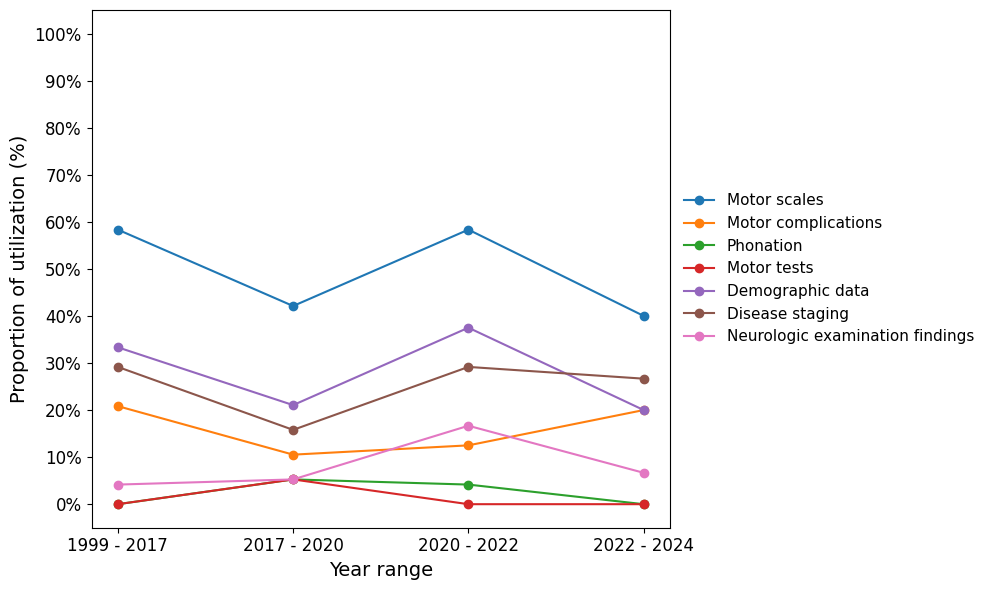

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - clinical motor detailed'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Neuroimaging

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clustering_Neuroimaging - Structural or Volumetric MRI',
 'Clustering_Neuroimaging - Diffusion Imaging MRI',
 'Clustering_Neuroimaging - DaTSCAN',
 'Clustering_Neuroimaging - Radiomics',
 'Clustering_Neuroimaging - Functional MRI',
 'Clustering_Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)']

# Creating temporary dataset to work with
data = df[featuretypes]

# Renaming columns
column_renames = {
    'Clustering_Neuroimaging - Structural or Volumetric MRI': 'Structural or Volumetric MRI',
 'Clustering_Neuroimaging - Diffusion Imaging MRI': 'Diffusion Imaging MRI',
 'Clustering_Neuroimaging - DaTSCAN': 'DaTSCAN',
 'Clustering_Neuroimaging - Radiomics': 'Radiomics',
 'Clustering_Neuroimaging - Functional MRI': 'Functional MRI',
 'Clustering_Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)': 'Other Methods'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values()))

<ipython-input-441-6c4d1658ef02>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Structural or Volumetric MRI Diffusion Imaging MRI DaTSCAN Radiomics  \
0                    87.80%                   93.90%  92.68%    96.34%   
1                    12.20%                    6.10%   7.32%     3.66%   

  Functional MRI Other Methods  
0         97.56%        97.56%  
1          2.44%         2.44%

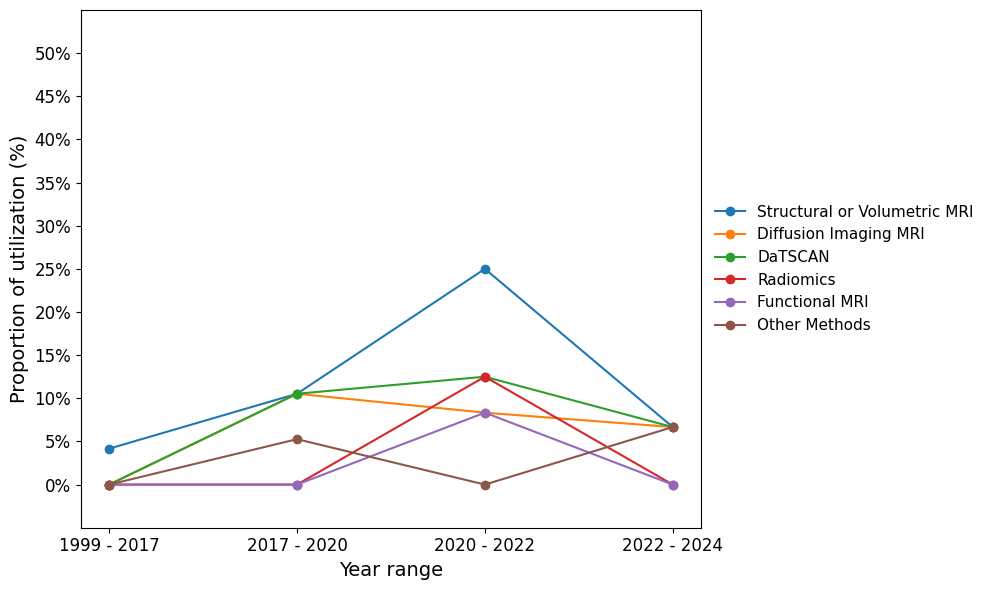

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - neuroimaging'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Omics

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                 'Clustering_Omics - Proteomics',
 'Clustering_Omics - Transcriptomics',
 'Clustering_Omics - Genomics',
 'Clustering_Omics - Lipidomics',
 'Clustering_Omics - Other (e.g. metabolomics, metagenomics)']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Clustering_Omics - Proteomics': 'Proteomics',
    'Clustering_Omics - Transcriptomics': 'Transcriptomics',
    'Clustering_Omics - Genomics': 'Genomics',
    'Clustering_Omics - Lipidomics': 'Lipidomics',
    'Clustering_Omics - Other (e.g. metabolomics, metagenomics)': 'Other omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-443-7f135c0ada79>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Proteomics Transcriptomics Genomics Lipidomics Other omics
0    100.00%          98.78%   93.90%    100.00%     100.00%
1                      1.22%    6.10%

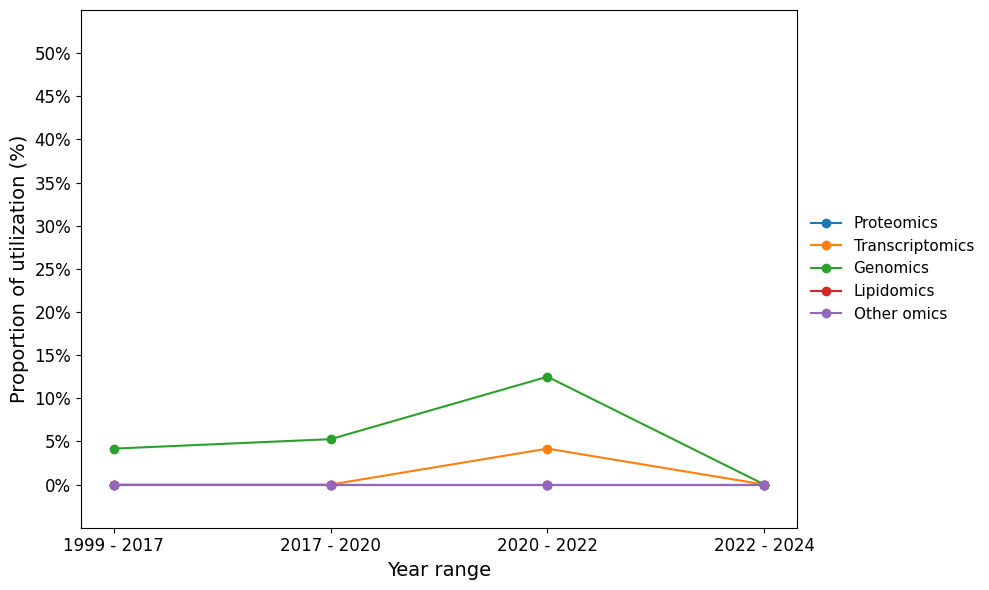

In [ ]:
# Configuration
figurename = 'Clustering feature types according to year - omics'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

## Feature types according to year (validation)

### All features

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Validation_Clinical_Any_Motor_Scales_No_Complications',
                'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                'Validation_Clinical_Including_Cognition',
                'Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other',
                'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                'Validation_Any_Neurophysiology',
                'Validation_Any_Neuroimaging',
                'Validation_Any_Omics']

# Creating temporary dataset to work with
try:
    data = df[featuretypes]
except KeyError as e:
    print(f"KeyError: {e}")
    print("Check the following column names:", featuretypes)
    print("Existing columns in df:", df.columns)

# Renaming columns
column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Validation_Clinical_Any_Motor_Scales_No_Complications': 'Motor scales',
    'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)': 'Motor complications',
    'Validation_Clinical_Including_Cognition': 'Cognition',
    'Validation_Clinical_Any_Non_Motor_Excluding_Cognition_QoL_Other': 'Other non-motor',
    'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': 'Biomarkers',
    'Validation_Any_Neurophysiology': 'Neurophysiology',
    'Validation_Any_Neuroimaging': 'Neuroimaging',
    'Validation_Any_Omics': 'Omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-445-96adae062795>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor scales Motor complications Cognition Other non-motor Biomarkers  \
0       24.39%              69.51%    26.83%          31.71%     85.37%   
1       75.61%              30.49%    73.17%          68.29%     14.63%   

  Neurophysiology Neuroimaging   Omics  
0          98.78%       70.73%  89.02%  
1           1.22%       29.27%  10.98%

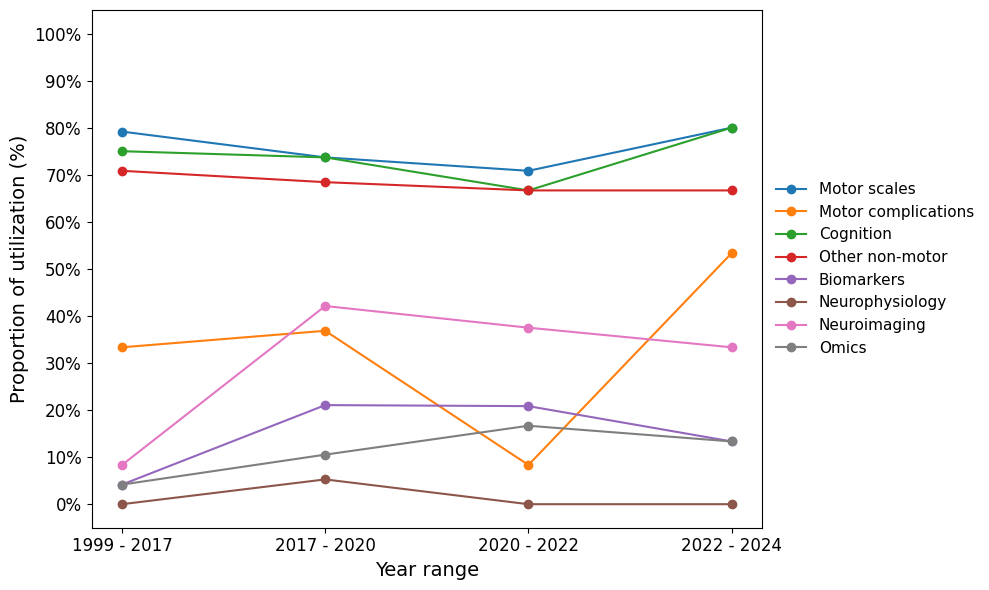

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - all'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### All features 2.0

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Validation_Any_Clinical',
                'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)',
                'Validation_Any_Neurophysiology',
                'Validation_Any_Neuroimaging',
                'Validation_Any_Omics']

# Creating temporary dataset to work with
try:
    data = df[featuretypes]
except KeyError as e:
    print(f"KeyError: {e}")
    print("Check the following column names:", featuretypes)
    print("Existing columns in df:", df.columns)

# Renaming columns
column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Validation_Any_Clinical':'Clinical',
    'Validation_Biomarkers (uric acid, LDL, tryglicerides, neurofilament light [Nfl], tau, SAA etc)': 'Biomarkers',
    'Validation_Any_Neurophysiology': 'Neurophysiology',
    'Validation_Any_Neuroimaging': 'Neuroimaging',
    'Validation_Any_Omics': 'Omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-447-b41dbaffff27>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Clinical Biomarkers Neurophysiology Neuroimaging   Omics
0   12.20%     85.37%          98.78%       70.73%  89.02%
1   87.80%     14.63%           1.22%       29.27%  10.98%

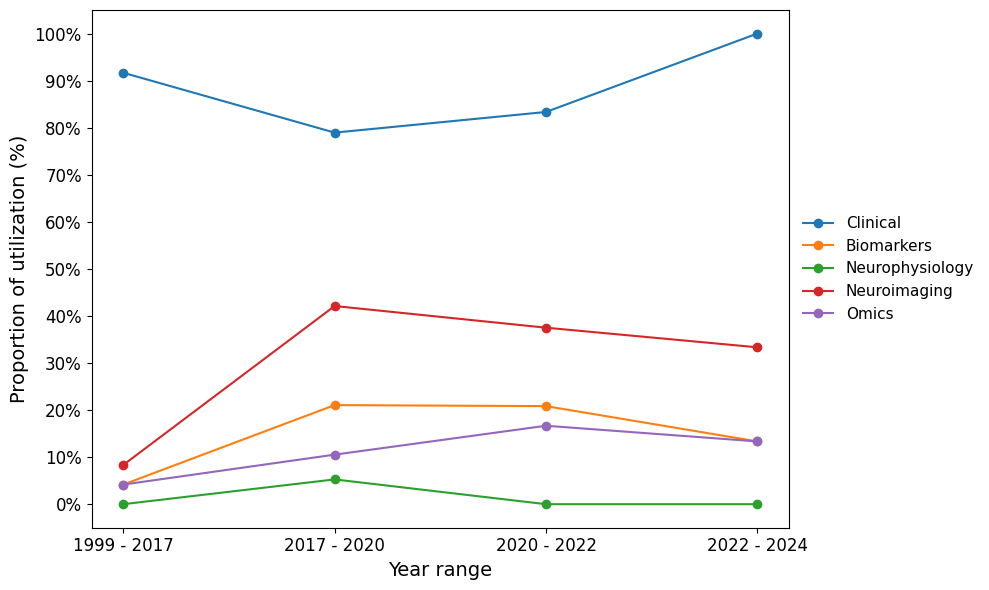

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - all 2.0'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Clinical non-motor

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Validation_Clinical_Including_Cognition',
                'Validation_Clinical_Any_Neuropsychiatric',
 'Validation_Clinical_Any_Sleep',
 'Validation_Clinical_Any_Olfaction',
 'Validation_Clinical_Any_Autonomic',
 'Validation_Clinical_QoL',
 'Validation_Clinical_Non_Motor_Other']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Validation_Clinical_Including_Cognition' : 'Cognition',
    'Validation_Clinical_Any_Neuropsychiatric': 'Neuropsychiatric symptoms',
    'Validation_Clinical_Any_Sleep': 'Sleep symptoms',
    'Validation_Clinical_Any_Olfaction': 'Anosmia or hyposmia',
    'Validation_Clinical_Any_Autonomic': 'Autonomic symptoms',
    'Validation_Clinical_QoL': 'Quality of life',
    'Validation_Clinical_Non_Motor_Other': 'Other symptoms'}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-449-32f8c172bb3a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Cognition Neuropsychiatric symptoms Sleep symptoms Anosmia or hyposmia  \
0    26.83%                    36.59%         60.98%              81.71%   
1    73.17%                    63.41%         39.02%              18.29%   

  Autonomic symptoms Quality of life Other symptoms  
0             59.76%          90.24%         79.27%  
1             40.24%           9.76%         20.73%

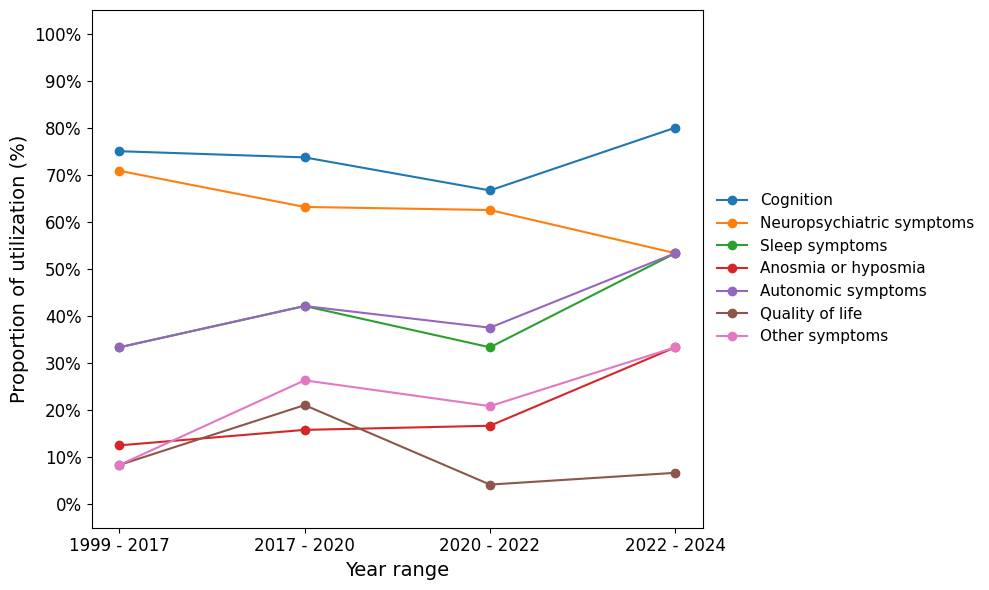

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - clinical non-motor detailed'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Clinical motor

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Validation_Clinical_Any_Motor_Scales_No_Complications',
                'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)',
                 'Validation_Clinical_Phonation',
 'Validation_Clinical_Motor_Tests',
 'Validation_Any_Demographic',
 'Validation_Any_Time_or_Staging_Measurements',
 'Validation_Clinical_Vital_or_Neurologic_Examination'
]

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Validation_Clinical_Any_Motor_Scales_No_Complications': 'Motor scales',
    'Validation_Clinical - Motor Complications (dyskinesia, OFF periods, dystonia, motor fluctuations)': 'Motor complications',
        'Validation_Clinical_Phonation': 'Phonation',
    'Validation_Clinical_Motor_Tests': 'Motor tests',
    'Validation_Any_Demographic': 'Demographic data',
    'Validation_Any_Time_or_Staging_Measurements':'Disease staging',
    'Validation_Clinical_Vital_or_Neurologic_Examination': 'Neurologic examination findings'

}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-451-a7fdf096353c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor scales Motor complications Phonation Motor tests Demographic data  \
0       24.39%              69.51%   100.00%     100.00%           19.51%   
1       75.61%              30.49%                                 80.49%   

  Disease staging Neurologic examination findings  
0          32.93%                    91.46%        
1          67.07%                     8.54%

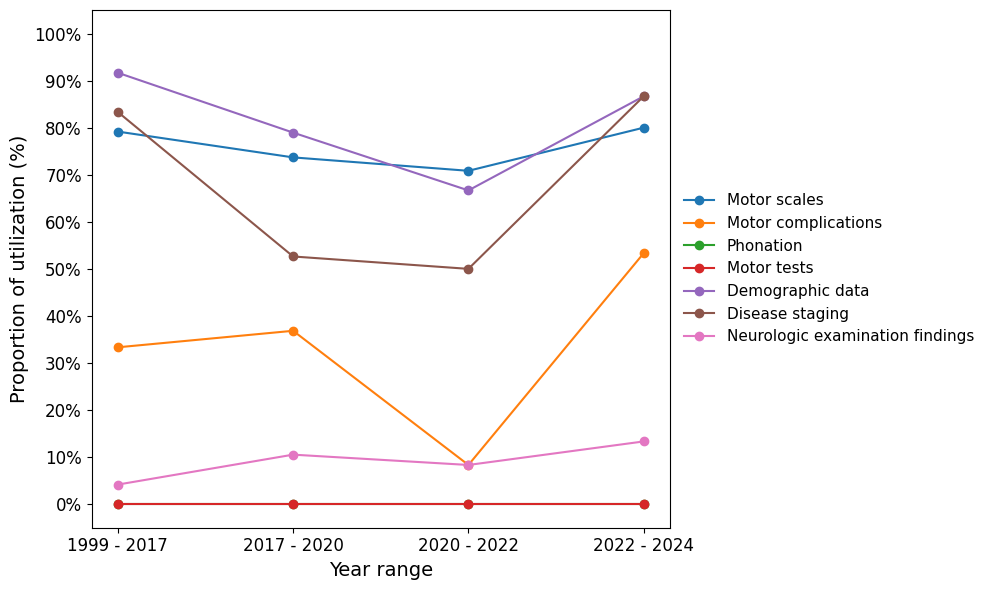

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - clinical motor detailed'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Neuroimaging

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Validation_Neuroimaging - Structural or Volumetric MRI',
 'Validation_Neuroimaging - Diffusion Imaging MRI',
 'Validation_Neuroimaging - DaTSCAN',
 'Validation_Neuroimaging - Radiomics',
 'Validation_Neuroimaging - Functional MRI',
 'Validation_Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)']

# Creating temporary dataset to work with
data = df[featuretypes]

# Renaming columns
column_renames = {
    'Validation_Neuroimaging - Structural or Volumetric MRI': 'Structural or Volumetric MRI',
 'Validation_Neuroimaging - Diffusion Imaging MRI': 'Diffusion Imaging MRI',
 'Validation_Neuroimaging - DaTSCAN': 'DaTSCAN',
 'Validation_Neuroimaging - Radiomics': 'Radiomics',
 'Validation_Neuroimaging - Functional MRI': 'Functional MRI',
 'Validation_Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)': 'Other Methods'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-453-f318b66c1dfc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Structural or Volumetric MRI Diffusion Imaging MRI DaTSCAN Radiomics  \
0                    82.93%                   95.12%  87.80%    98.78%   
1                    17.07%                    4.88%  12.20%     1.22%   

  Functional MRI Other Methods  
0         95.12%        96.34%  
1          4.88%         3.66%

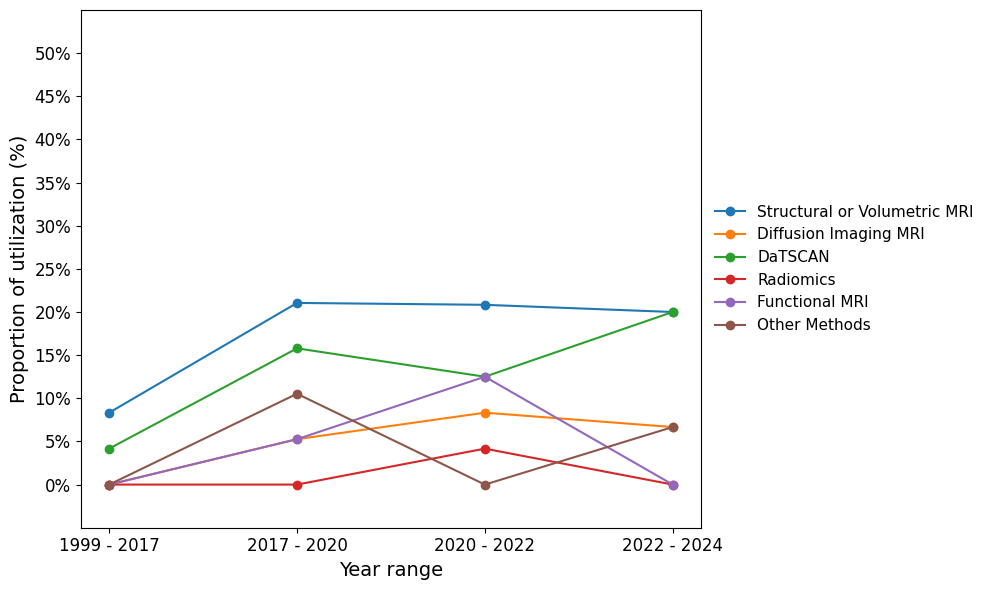

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - neuroimaging'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Omics

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                 'Validation_Omics - Proteomics',
 'Validation_Omics - Transcriptomics',
 'Validation_Omics - Genomics',
 'Validation_Omics - Lipidomics',
 'Validation_Omics - Other (e.g. metabolomics, metagenomics)']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Validation_Omics - Proteomics': 'Proteomics',
    'Validation_Omics - Transcriptomics': 'Transcriptomics',
    'Validation_Omics - Genomics': 'Genomics',
    'Validation_Omics - Lipidomics': 'Lipidomics',
    'Validation_Omics - Other (e.g. metabolomics, metagenomics)': 'Other omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-455-fefdb1d64783>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Proteomics Transcriptomics Genomics Lipidomics Other omics
0    100.00%          96.34%   91.46%    100.00%      98.78%
1                      3.66%    8.54%                  1.22%

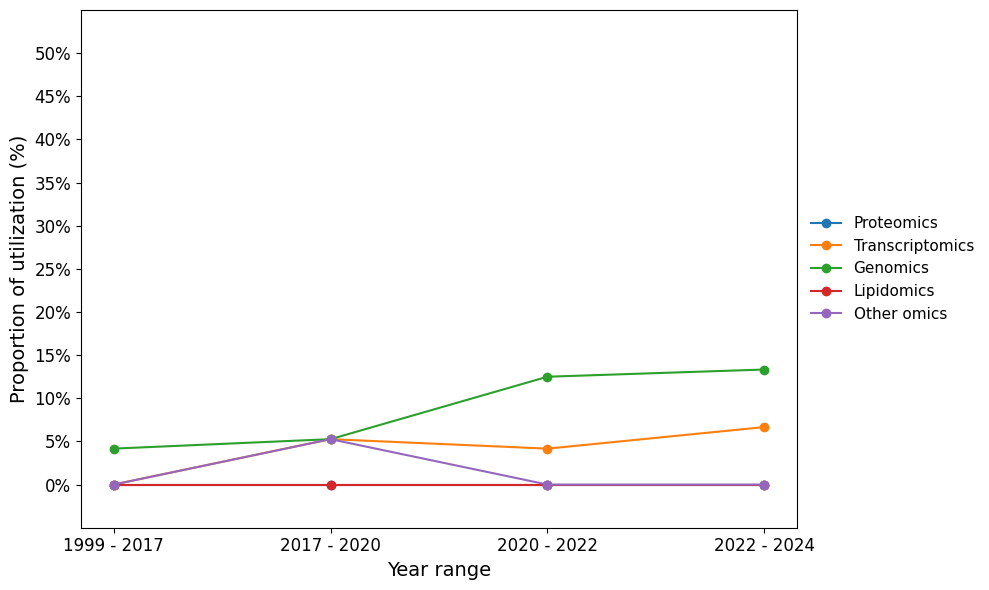

In [ ]:
# Configuration
figurename = 'Validation feature types according to year - omics'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

## Feature types according to year (clustering or validation)

Not used in the manuscript

### All features

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Utilized_Motor_Scales_no_Complications_Either_in_Clustering_or_Validation',
                'Utilized_Motor_Complications_Either_in_Clustering_or_Validation',
                'Utilized_Cognition_Either_in_Clustering_or_Validation',
                'Utilized_Non_Motor_Excluding_Cognition_QoL_Other_Either_in_Clustering_or_Validation',
                'Utilized_Any_Biomarkers_Either_in_Clustering_or_Validation',
                'Utilized_Any_Neurophisiology_Either_in_Clustering_or_Validation',
                'Utilized_Any_Neuroimaging_Either_in_Clustering_or_Validation',
                'Utilized_Any_Omics_Either_in_Clustering_or_Validation']

# Creating temporary dataset to work with
try:
    data = df[featuretypes]
except KeyError as e:
    print(f"KeyError: {e}")
    print("Check the following column names:", featuretypes)
    print("Existing columns in df:", df.columns)

# Renaming columns
column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Utilized_Motor_Scales_no_Complications_Either_in_Clustering_or_Validation': 'Motor scales',
    'Utilized_Motor_Complications_Either_in_Clustering_or_Validation': 'Motor complications',
    'Utilized_Cognition_Either_in_Clustering_or_Validation': 'Cognition',
    'Utilized_Non_Motor_Excluding_Cognition_QoL_Other_Either_in_Clustering_or_Validation': 'Other non-motor',
    'Utilized_Any_Biomarkers_Either_in_Clustering_or_Validation': 'Biomarkers',
    'Utilized_Any_Neurophisiology_Either_in_Clustering_or_Validation': 'Neurophysiology',
    'Utilized_Any_Neuroimaging_Either_in_Clustering_or_Validation': 'Neuroimaging',
    'Utilized_Any_Omics_Either_in_Clustering_or_Validation': 'Omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-457-9f45a408c681>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor scales Motor complications Cognition Other non-motor Biomarkers  \
0       12.20%              65.85%    14.63%          23.17%     84.15%   
1       87.80%              34.15%    85.37%          76.83%     15.85%   

  Neurophysiology Neuroimaging   Omics  
0          97.56%       65.85%  85.37%  
1           2.44%       34.15%  14.63%

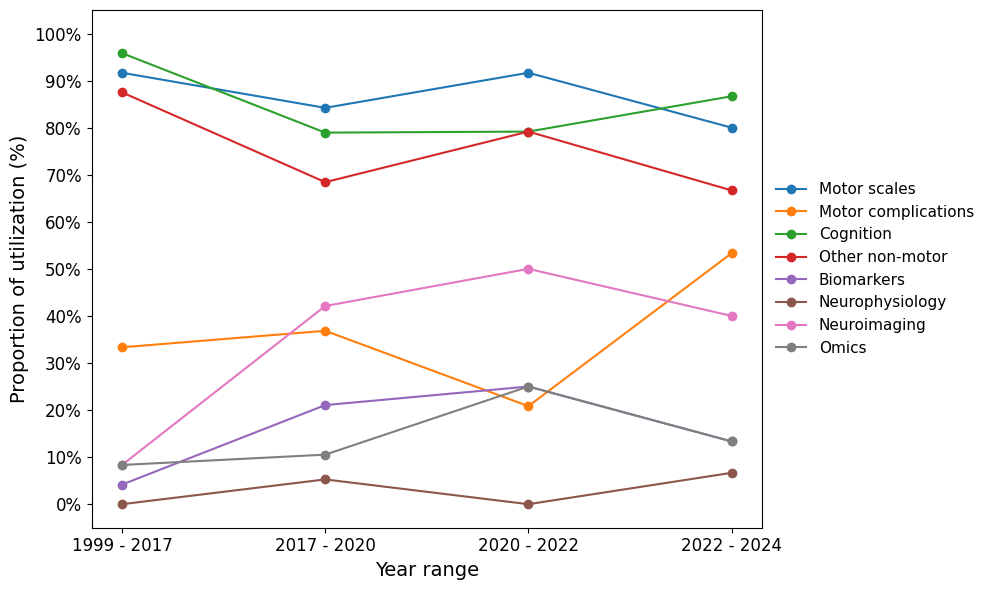

In [ ]:
# Configuration
figurename = 'Clustering or validation feature types according to year - all'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Clinical special

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)_Either_in_Clustering_or_Validation',
 'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)_Either_in_Clustering_or_Validation',
 'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)_Either_in_Clustering_or_Validation',
 'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)_Either_in_Clustering_or_Validation',
 'Clinical - Quality of Life_Either_in_Clustering_or_Validation',
 'Clinical - Other (pain, fatigue etc)_Either_in_Clustering_or_Validation',
 'Utilized_Demographic_Either_in_Clustering_or_Validation',
 'Utilized_Time_or_Staging_Measurements_Either_in_Clustering_or_Validation',
 'Clinical - Vital Signs or Neurologic Examination Findings_Either_in_Clustering_or_Validation',
 'Clinical - Phonation_Either_in_Clustering_or_Validation',
 'Clinical - Motor Tests (example: Timed-Up & Go)_Either_in_Clustering_or_Validation']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Clinical - Neuropsychiatric (anxiety, depression, impulsivity, delusions, hallucinations etc)_Either_in_Clustering_or_Validation': 'Neuropsychiatric symptoms',
    'Clinical - Sleep (REM sleep behavior disorder, insomnia, daytime sleepiness)_Either_in_Clustering_or_Validation': 'Sleep symptoms',
    'Clinical - Anosmia or Hyposmia (absence or loss of the capability to smell)_Either_in_Clustering_or_Validation': 'Anosmia or hyposmia',
    'Clinical - Autonomic (gastroparesis, constipation, orthostatic hypotension, urinary incontinence, sexual difficulties)_Either_in_Clustering_or_Validation': 'Autonomic symptoms',
    'Clinical - Quality of Life_Either_in_Clustering_or_Validation': 'Quality of life',
    'Clinical - Other (pain, fatigue etc)_Either_in_Clustering_or_Validation': 'Other symptoms',
    'Utilized_Demographic_Either_in_Clustering_or_Validation': 'Demographic data',
    'Utilized_Time_or_Staging_Measurements_Either_in_Clustering_or_Validation':'Disease staging',
    'Clinical - Vital Signs or Neurologic Examination Findings_Either_in_Clustering_or_Validation': 'Neurologic examination findings',
    'Clinical - Phonation_Either_in_Clustering_or_Validation': 'Phonation',
    'Clinical - Motor Tests (example: Timed-Up & Go)_Either_in_Clustering_or_Validation': 'Motor tests'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-459-146f4787703c>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Neuropsychiatric symptoms Sleep symptoms Anosmia or hyposmia  \
0                    24.39%         51.22%              76.83%   
1                    75.61%         48.78%              23.17%   

  Autonomic symptoms Quality of life Other symptoms Demographic data  \
0             52.44%          86.59%         71.95%           14.63%   
1             47.56%          13.41%         28.05%           85.37%   

  Disease staging Neurologic examination findings Phonation Motor tests  
0          26.83%                    86.59%          97.56%      98.78%  
1          73.17%                    13.41%           2.44%       1.22%

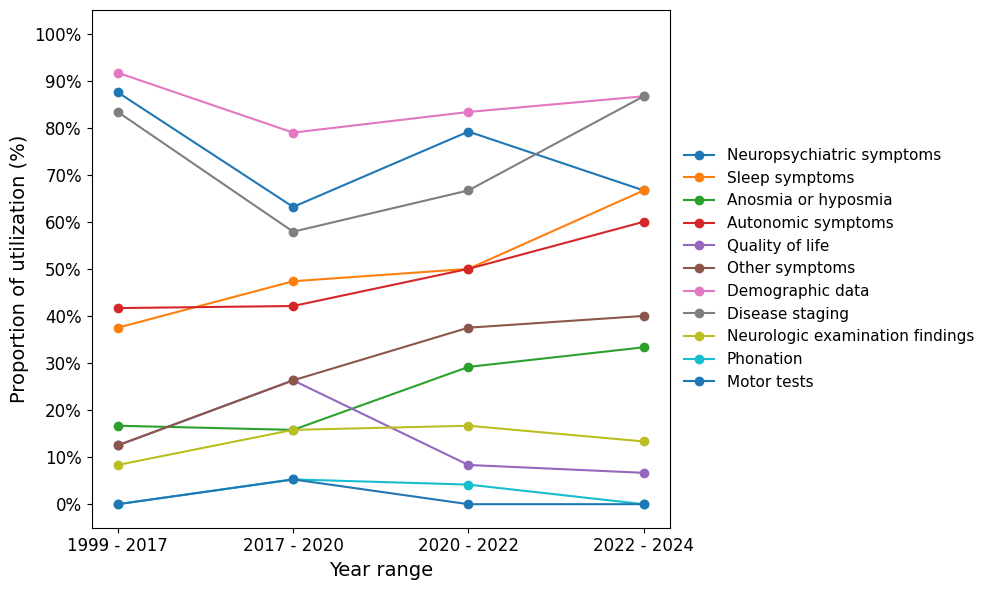

In [ ]:
# Configuration
figurename = 'Clustering or validation feature types according to year - clinical detailed'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 1.1, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 1.1, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 1.05)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Neuroimaging

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Neuroimaging - Structural or Volumetric MRI_Either_in_Clustering_or_Validation',
 'Neuroimaging - Diffusion Imaging MRI_Either_in_Clustering_or_Validation',
 'Neuroimaging - DaTSCAN_Either_in_Clustering_or_Validation',
 'Neuroimaging - Radiomics_Either_in_Clustering_or_Validation',
 'Neuroimaging - Functional MRI_Either_in_Clustering_or_Validation',
 'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)_Either_in_Clustering_or_Validation']

# Creating temporary dataset to work with
data = df[featuretypes]

# Renaming columns
column_renames = {
    'Neuroimaging - Structural or Volumetric MRI_Either_in_Clustering_or_Validation': 'Structural or Volumetric MRI',
 'Neuroimaging - Diffusion Imaging MRI_Either_in_Clustering_or_Validation': 'Diffusion Imaging MRI',
 'Neuroimaging - DaTSCAN_Either_in_Clustering_or_Validation': 'DaTSCAN',
 'Neuroimaging - Radiomics_Either_in_Clustering_or_Validation': 'Radiomics',
 'Neuroimaging - Functional MRI_Either_in_Clustering_or_Validation': 'Functional MRI',
 'Neuroimaging - Other Methods (e.g. neuromelanin-sensitive MRI)_Either_in_Clustering_or_Validation': 'Other Methods'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, column_renames.values())

<ipython-input-461-b674d7d5cec6>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Structural or Volumetric MRI Diffusion Imaging MRI DaTSCAN Radiomics  \
0                    78.05%                   92.68%  85.37%    96.34%   
1                    21.95%                    7.32%  14.63%     3.66%   

  Functional MRI Other Methods  
0         95.12%        96.34%  
1          4.88%         3.66%

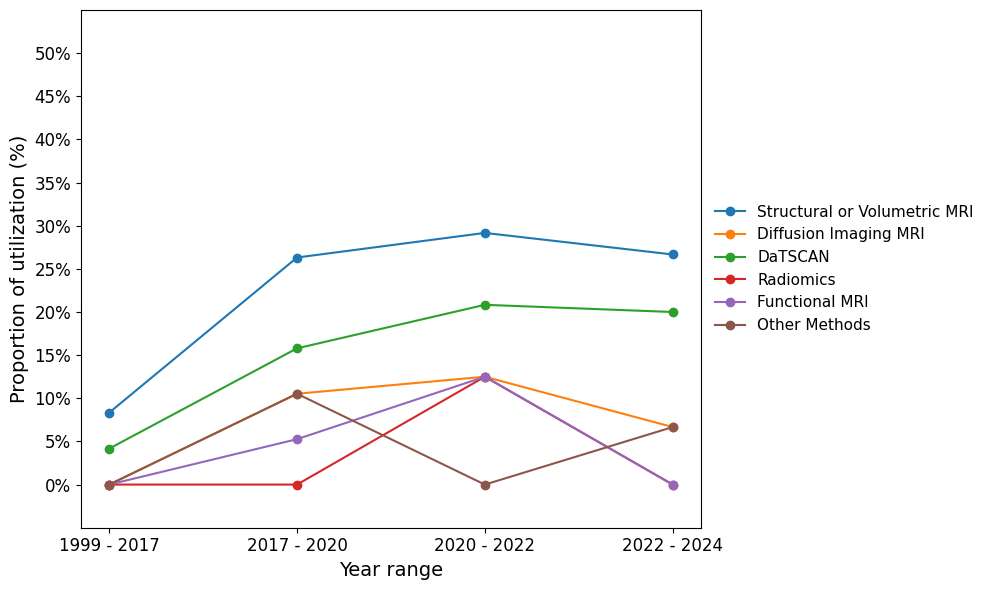

In [ ]:
# Configuration
figurename = 'Clustering or validation feature types according to year - neuroimaging'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

### Omics

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                 'Omics - Proteomics_Either_in_Clustering_or_Validation',
 'Omics - Transcriptomics_Either_in_Clustering_or_Validation',
 'Omics - Genomics_Either_in_Clustering_or_Validation',
 'Omics - Lipidomics_Either_in_Clustering_or_Validation',
 'Omics - Other (e.g. metabolomics, metagenomics)_Either_in_Clustering_or_Validation']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = {
    'Year of publication Quantile Division': 'Year of publication Quantile Division',
    'Omics - Proteomics_Either_in_Clustering_or_Validation': 'Proteomics',
    'Omics - Transcriptomics_Either_in_Clustering_or_Validation': 'Transcriptomics',
    'Omics - Genomics_Either_in_Clustering_or_Validation': 'Genomics',
    'Omics - Lipidomics_Either_in_Clustering_or_Validation': 'Lipidomics',
    'Omics - Other (e.g. metabolomics, metagenomics)_Either_in_Clustering_or_Validation': 'Other omics'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-463-e2050c09f0cf>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Proteomics Transcriptomics Genomics Lipidomics Other omics
0    100.00%          96.34%   86.59%    100.00%      98.78%
1                      3.66%   13.41%                  1.22%

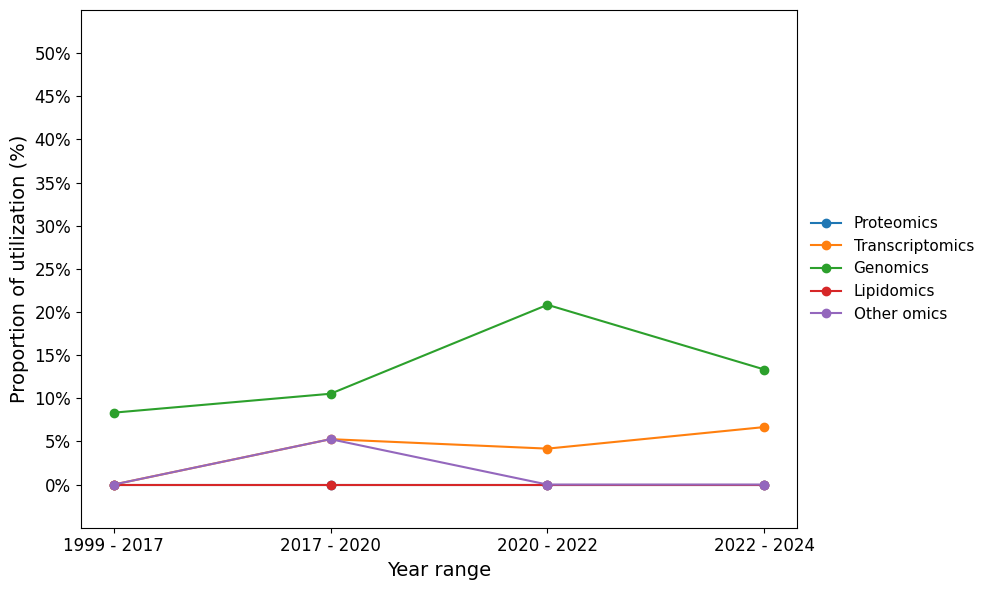

In [ ]:
# Configuration
figurename = 'Clustering or validation feature types according to year - omics'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in column_renames.values():
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.55, 0.05))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.55, 0.05)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Set the y-axis limits to ensure consistent spacing
ax.set_ylim(-0.05, 0.55)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

## Cohorts used

In [ ]:
featuretypes = ['Year of publication Quantile Division',
                'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]',
 "Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)]",
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort]',
 'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]']

# Creating temporary dataset to work with
data = df[featuretypes]

column_renames = column_renames = {'Year of publication Quantile Division':'Year of publication Quantile Division',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [AMP-PD]': 'AMP-PD',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [BioFIND]': 'BioFIND',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Fox Insight]': 'Fox Insight',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [GP2 Dataset]': 'GP2',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [LRRK2 Cohort Consortium]': 'LRRK2 Cohort Consortium',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson Progression Marker Initiative (PPMI)]': 'PPMI',
    "Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Parkinson's Disease Biomarker Program (PDBP)]": "PDBP",
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [UK Biobank]': 'UK Biobank',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Oxford Parkinson Disease Center Discovery Cohort]' : 'OPDC Discovery',
    'Dataset_Used Which datasets were utilized in the creation and/or validation of the subtyping algorithm? [Other specific or local datasets]': 'Other specific or local datasets'
}

data.rename(columns=column_renames, inplace=True)

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-465-65239a5b0b06>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


AMP-PD BioFIND Fox Insight      GP2 LRRK2 Cohort Consortium    PPMI  \
0  100.00%  98.78%     100.00%  100.00%                 100.00%  74.39%   
1            1.22%                                               25.61%   

     PDBP UK Biobank OPDC Discovery Other specific or local datasets  
0  98.78%    100.00%         96.34%                    23.17%         
1   1.22%                     3.66%                    76.83%

In [ ]:
# Droping columns with 0 values but also the specific datasets
# List of columns to remove
cols_to_remove = ['AMP-PD', 'Fox Insight', 'GP2',  'LRRK2 Cohort Consortium', 'UK Biobank', 'Other specific or local datasets']

# Drop the columns
try:
  data = data.drop(cols_to_remove, axis=1)
except Exception as e:
  print(e)

"['AMP-PD', 'Fox Insight', 'GP2', 'LRRK2 Cohort Consortium', 'UK Biobank', 'Other specific or local datasets'] not found in axis"


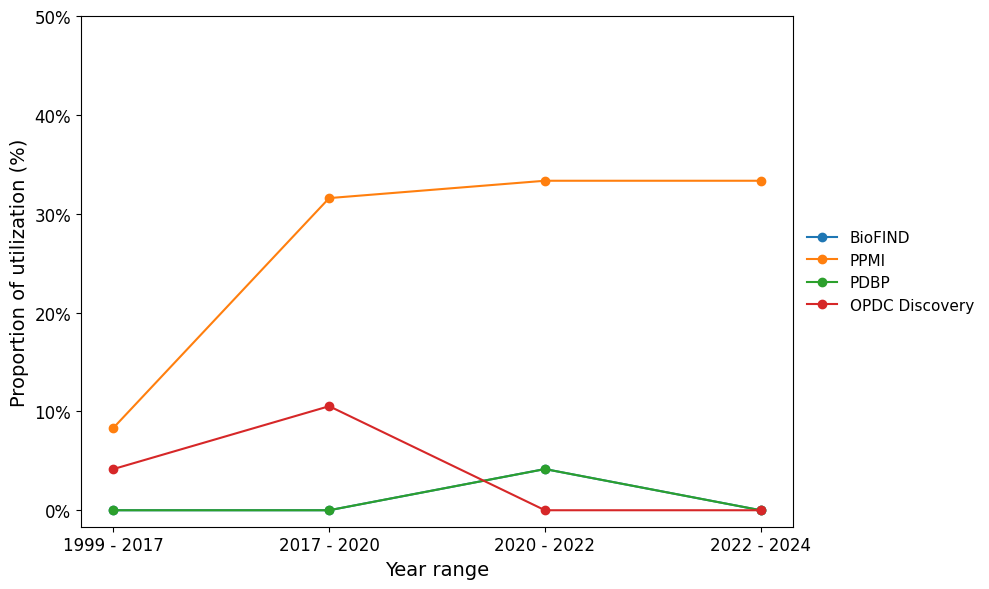

In [ ]:
# Configuration
figurename = 'Cohorts used during the years'

# Grouping by 'Year of publication Quantile Division' and calculating mean for plotting
df_grouped = data.groupby('Year of publication Quantile Division').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for feature in data.columns:
  if feature != 'Year of publication Quantile Division':
    ax.plot(df_grouped.index, df_grouped[feature], marker='o', label=feature)

# Adjusting labels, ticks, and legend
ax.set_ylabel('Proportion of utilization (%)', fontsize=14)
ax.set_xlabel('Year range', fontsize=14)
ax.set_xticks(np.arange(len(df_grouped)))
ax.set_xticklabels(df_grouped.index, rotation=0)
ax.set_yticks(np.arange(0, 0.6, 0.1))  # Adjusting y-ticks to every 0.1
ax.set_yticklabels(['{:.0f}%'.format(x * 100) for x in np.arange(0, 0.6, 0.1)])  # Converting to percentage
ax.tick_params(axis='x', which='major', labelsize=12)  # Increase font size for x-axis ticks
ax.tick_params(axis='y', which='major', labelsize=12)  # Increase font size for x-axis ticks

# Customizing the legend
legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=11)

# Aesthetic adjustments
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Turn off the grid
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

# Showing
plt.show()

## Scales utilized

Radar chart

In [ ]:
# Removed (no interest) - 'Income', 'Vital Signs (blood pressure, cardiac frequency)', 'Physical Attributes (weight, height etc)'

descriptivedata = ['Before_2020_After',
                   'UPDRS motor scores','UPDRS non-motor scores',
                   'MDS-UPDRS Part I', 'MDS-UPDRS Part II', 'MDS-UPDRS Part III', 'MDS-UPDRS Part IV',
                   'The Schwab and England ADL (Activities of Daily Living) scale',
                   'Hoehn and Yahr Scale or Modified Hoehn and Yahr Scale',
                   'University of Pennsylvania Smell Identification Test (UPSIT)',
                   'Non-Motor Symptoms Scale (NNMS)',
                   'Non-Motor Symptoms Questionnaire (NMSQ)',
                   'Montreal Cognitive Assessment (MoCA)',
                   'Mini-Mental State Examination (MMSE)',
                   'SCOPA-AUT',
                   'Geriatric Depression Scale (GDS)', 'Beck Depression Inventory (BDI)',
                   'Hospital Anxiety and Depression Scale (HADS)', 'State-Trait Anxiety Inventory for Adults (STAI)',
                   'Questionnaire for Impulsive-Compulsive Disorders in Parkinson’s Disease (QUIP)',
                   'REM-Sleep Behavior Disorder Screening Questionnaire (RBDSQ)', 'Epworth Sleepiness Scale (ESS)']

In [ ]:
data = df[descriptivedata]

# Renaming columns
column_renames ={
    'Before_2020_After':'Year Category',
    'UPDRS motor scores': 'Motor UPDRS',
    'UPDRS non-motor scores': 'Non-motor UPDRS',
    'MDS-UPDRS Part I': 'MDS-UPDRS I',
    'MDS-UPDRS Part II': 'MDS-UPDRS II',
    'MDS-UPDRS Part III': 'MDS-UPDRS III',
    'MDS-UPDRS Part IV': 'MDS-UPDRS IV',
    'The Schwab and England ADL (Activities of Daily Living) scale': 'Schwab & England ADL',
    'Hoehn and Yahr Scale or Modified Hoehn and Yahr Scale': 'Hoehn & Yahr Scale',
    'University of Pennsylvania Smell Identification Test (UPSIT)': 'UPSIT',
    'Non-Motor Symptoms Scale (NNMS)': 'NNMS',
    'Non-Motor Symptoms Questionnaire (NMSQ)': 'NMSQ',
    'Montreal Cognitive Assessment (MoCA)': 'MoCA',
    'Mini-Mental State Examination (MMSE)': 'MMSE',
    'SCOPA-AUT': 'SCOPA-AUT',
    'Geriatric Depression Scale (GDS)': 'GDS',
    'Beck Depression Inventory (BDI)': 'BDI',
    'Hospital Anxiety and Depression Scale (HADS)': 'HADS',
    'State-Trait Anxiety Inventory for Adults (STAI)': 'STAI',
    'Questionnaire for Impulsive-Compulsive Disorders in Parkinson’s Disease (QUIP)': 'QUIP',
    'REM-Sleep Behavior Disorder Screening Questionnaire (RBDSQ)': 'RBDSQ',
    'Epworth Sleepiness Scale (ESS)': 'ESS'
}

data.rename(columns=column_renames, inplace=True)

# Calculate percentages
percentages = (data[list(column_renames.values())[1:]].mean() * 100).round()
top_percentages = percentages.nlargest(15)  # Select top 15 values

# Showing
calculate_percentage_distribution(data, list(column_renames.values())[1:])

<ipython-input-493-a539bb9a0240>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns=column_renames, inplace=True)
<ipython-input-6-0331e512682b>:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  distribution_df = distribution_df.applymap(lambda x: f"{x:.2f}%" if pd.notna(x) else "")


Motor UPDRS Non-motor UPDRS MDS-UPDRS I MDS-UPDRS II MDS-UPDRS III  \
0      63.41%          84.15%      45.12%       45.12%        46.34%   
1      36.59%          15.85%      54.88%       54.88%        53.66%   

  MDS-UPDRS IV Schwab & England ADL Hoehn & Yahr Scale   UPSIT    NNMS  \
0       85.37%               93.90%             65.85%  86.59%  95.12%   
1       14.63%                6.10%             34.15%  13.41%   4.88%   

     NMSQ    MoCA    MMSE SCOPA-AUT     GDS     BDI    HADS     STAI    QUIP  \
0  96.34%  60.98%  73.17%    82.93%  85.37%  85.37%  93.90%  100.00%  98.78%   
1   3.66%  39.02%  26.83%    17.07%  14.63%  14.63%   6.10%            1.22%   

    RBDSQ     ESS  
0  81.71%  80.49%  
1  18.29%  19.51%

In [ ]:
!pip install kaleido
import kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.1 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Configuration
figurename = 'Clinical scales radar chart'

# Calculate the sum of each column, then compute the percentage relative to the total observations
total_observations = len(data)
column_percentages = (data[list(data.columns[1:])].sum() / total_observations * 100).round(0)

# Sort the percentages and select the top 15
top_15 = column_percentages.sort_values(ascending=False).head(15)

# Categories and values for the radar chart, closing the loop by appending the first element at the end
categories = list(top_15.index) + [top_15.index[0]]
values = list(top_15.values) + [top_15.values[0]]

# Create the radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values,
    theta=categories,
    fill='toself',
    name='Top 15 Feature Percentages'
))

# Update layout to make it more visually appealing and simpler
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(values) + 10],  # Adjust the range to maximum observed value + 10
            gridcolor='#F0F8FF',  # Change grid line color to light blue
            gridwidth=2,  # Increase grid line width to 1
            color='black',  # Standard color for text
            tickvals=list(range(0, int(max(values) + 10), 10)),  # Setting ticks every 10%
            tickfont=dict(size=15, color='black'),  # Font size and color for tick labels
            linecolor='black'  # Color of the radial axis lines
        ),
        angularaxis=dict(  # Customize angular axis
            tickfont=dict(size=17, color='black'),  # Font size and color for category labels
            rotation=90,  # Rotate labels for better layout
            direction='clockwise'  # Direction of categories
        )
    ),
    title_font=dict(size=14, color='black'),  # Subdued title font size and color
    showlegend=False,
    margin=dict(
        b=40,
        r=45,
        l=45,
        t=40
    )
)

# Show the plot
fig.show()

# If you need to save the plot to a file, uncomment and adapt the line below
import plotly.io as pio
pio.write_image(fig, 'Plots/SVG/' + figurename + '.svg', format='svg')
pio.write_image(fig, 'Plots/PNG/' + figurename + '.png', format='png')

## Bubble Plot

**X** = Years | **Y** = Number of clustering features | **Bubble size** = patients in cluster | **Bubble color** = use of non-clinical feature for clustering | **Bubble opacity** = quality scores

In [ ]:
data = df[['Year of publication', 'Clustering_Number_of_Specific_Domains', 'Number of PD patients utilized for clustering purposes for bubble', 'Clustering_Any_Non_Clinical','Quality_Index_Mestre']].astype(int)

for column in data:
  data[column] = pd.to_numeric(data[column], errors='coerce')

data.describe()

Year of publication  Clustering_Number_of_Specific_Domains  \
count               82.000                    82.000                
mean             2,018.683                     3.793                
std                  4.784                     3.070                
min              1,999.000                     1.000                
25%              2,017.000                     1.000                
50%              2,020.000                     3.000                
75%              2,022.000                     6.000                
max              2,024.000                    13.000                

       Number of PD patients utilized for clustering purposes for bubble  \
count                    82.000                                            
mean                    295.268                                            
std                     371.288                                            
min                      28.000                                            
25%                      90.250                                            
50%                     150.000                                            
75%                     354.500                                            
max                   1,851.000                                            

       Clustering_Any_Non_Clinical  Quality_Index_Mestre  
count                    82.000                   82.000  
mean                      0.305                    6.073  
std                       0.463                    3.106  
min                       0.000                    0.000  
25%                       0.000                    4.000  
50%                       0.000                    5.000  
75%                       1.000                    8.000  
max                       1.000                   15.000

In [ ]:
df['Number of PD patients utilized for clustering purposes for bubble'].astype(int).describe()

count      82.000
mean      295.268
std       371.288
min        28.000
25%        90.250
50%       150.000
75%       354.500
max     1,851.000
Name: Number of PD patients utilized for clustering purposes for bubble, dtype: float64

In [ ]:
df['Number of PD patients utilized for clustering purposes for bubble'].astype(int).value_counts(dropna=False)

Number of PD patients utilized for clustering purposes for bubble
100     3
41      2
423     2
88      2
85      2
56      2
44      2
115     2
402     1
86      1
28      1
1851    1
143     1
494     1
82      1
194     1
186     1
199     1
294     1
113     1
232     1
176     1
904     1
175     1
336     1
1124    1
92      1
168     1
90      1
228     1
557     1
120     1
209     1
173     1
116     1
599     1
226     1
769     1
62      1
885     1
1510    1
358     1
170     1
243     1
342     1
407     1
1530    1
365     1
206     1
621     1
408     1
270     1
131     1
138     1
344     1
134     1
91      1
112     1
57      1
40      1
65      1
121     1
103     1
99      1
77      1
466     1
114     1
157     1
1601    1
71      1
93      1
30      1
421     1
Name: count, dtype: int64

In [ ]:
max(df['Clustering_Number_of_Specific_Domains'])

13

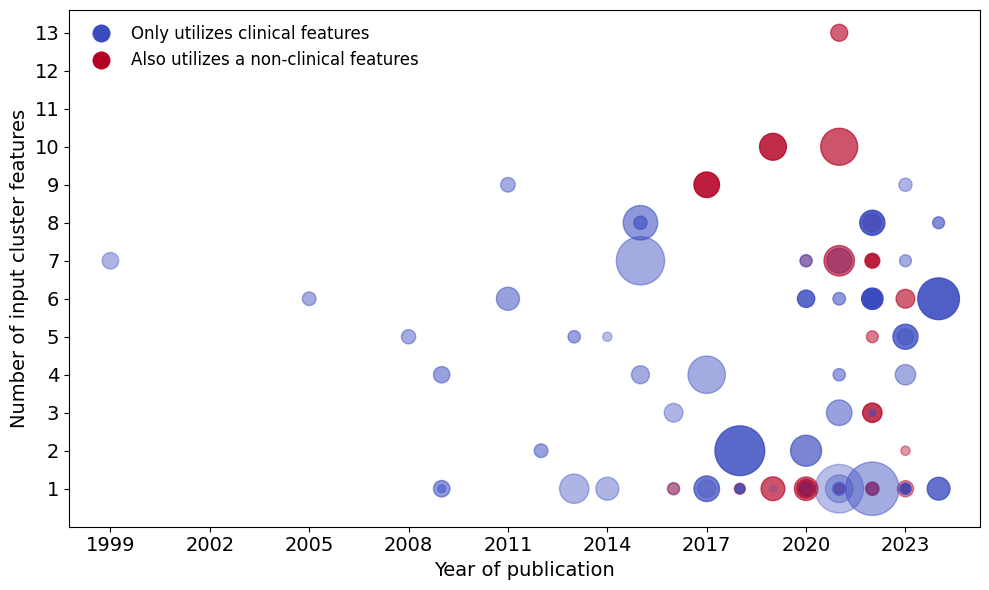

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

figurename = 'Bubble plot of number of features per year according to usage of non-clinical data and quality index'

plt.figure(figsize=(10, 6))

# Adjust transparency to range from 40% to 100%
transparency = 0.2 + 0.8 * (data['Quality_Index_Mestre'] / 15)

# Using the original color palette but ensuring it's for binary data
cmap = plt.get_cmap('coolwarm', 2)  # 2 distinct colors for binary data

# Further reduced bubble size
size_scale = data['Number of PD patients utilized for clustering purposes for bubble'] * 0.8  # Reduced size scale

bubble = plt.scatter(
    data['Year of publication'],
    data['Clustering_Number_of_Specific_Domains'],
    s=size_scale,  # Bubble size scaling
    c=data['Clustering_Any_Non_Clinical'],  # Using the non-clinical feature for colors
    cmap=cmap,  # Updated color map for binary data
    alpha=transparency,  # Transparency determined by 'Quality_Index_Mestre'
)

# Adding titles and labels
plt.xlabel('Year of publication', fontsize=14)
plt.ylabel('Number of input cluster features', fontsize=14)

# Adjusting y-axis limits to avoid touching x-axis
plt.ylim(bottom=np.min(data['Clustering_Number_of_Specific_Domains']) - 1)

# Set y-ticks to cover from 1 to the max value of 'Clustering_Number_of_Specific_Domains', inclusive
yticks = np.arange(1, data['Clustering_Number_of_Specific_Domains'].max() + 1)
plt.yticks(yticks, fontsize=14)

# Modify x-axis to display ticks every four years
years = np.arange(data['Year of publication'].min(), data['Year of publication'].max() + 1, 3)
plt.xticks(years, fontsize=14)

# Manually set and enlarge the legend with accurate colors
colors = [cmap(0), cmap(1)]  # Extract colors from the colormap
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=14, label="Only utilizes clinical features"),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=14, label='Also utilizes a non-clinical features')]

legend = plt.legend(handles=handles, title="", frameon=False, loc='upper left', fontsize=12, title_fontsize=14)

plt.grid(False)
plt.tight_layout()

# Saving
plt.savefig('Plots/SVG/'+figurename+'.svg', format='svg', dpi=300)  # Export as SVG
plt.savefig('Plots/PNG/'+figurename+'.png', format='png', dpi=300)  # Export as PNG

plt.show()
